---
<h2 style="color:#283593; background:#e8eaf6; padding:10px; border-radius:8px; font-family:'Comic Sans MS', cursive;">
📌 𝓟𝓻𝓸𝓳𝓮𝓬𝓽 𝓓𝓮𝓼𝓬𝓻𝓲𝓹𝓽𝓲𝓸𝓷  

📌 CITY - POWER_LOAD - CONSUMPTION_PREDICTION - ML
</h2>

---

## 📋 Scope & Introduction

### Introduction
This project focuses on predicting city-wide power consumption using machine learning techniques, leveraging various weather and environmental parameters. Accurate forecasting of power load is crucial for efficient energy management, grid stability, and sustainable urban planning.

### Scope
- **Data Exploration:** Analyze and visualize the relationship between weather features (temperature, humidity, wind speed, solar radiation, air quality, cloudiness) and power consumption.
- **Data Cleaning & Preprocessing:** Handle missing values, outliers, and transform skewed features for robust modeling.
- **Feature Engineering:** Create and select relevant features to improve prediction accuracy.
- **Model Training & Evaluation:** Apply and compare multiple regression models (Linear, Ridge, Lasso, Random Forest, Gradient Boosting, XGBoost) to forecast power consumption.
- **Insights & Recommendations:** Interpret model results to provide actionable insights for city energy management.

This end-to-end workflow demonstrates how data science and machine learning can be applied to real-world energy forecasting challenges, supporting smarter and more sustainable cities.

<h2 style="color:#1a237e;background:#e8eaf6;padding:8px;border-radius:5px;">📚 𝓘𝓶𝓹𝓸𝓻𝓽𝓲𝓷𝓰 𝓛𝓲𝓫𝓻𝓪𝓻𝓲𝓮𝓼</h2>


In [2]:
#%pip install numpy pandas seaborn matplotlib rich
#pip install matplotlib


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from rich import print

In [4]:
# %pip install openpyxl

<h2 style="color:#004d40;background:#e0f2f1;padding:8px;border-radius:5px;">📁 𝓘𝓶𝓹𝓸𝓻𝓽𝓲𝓷𝓰 𝓓𝓪𝓽𝓪𝓼𝓮𝓽</h2>


In [5]:
df1 = pd.read_excel('City Power Consumption.xlsx')

In [6]:
df1.head(10).style.background_gradient(cmap='Greens')

<h4 style="color:#4e342e;background:#efebe9;padding:8px;border-radius:5px;">🧩 𝓗𝓪𝓷𝓭𝓵𝓲𝓷𝓰 𝓜𝓲𝓼𝓼𝓲𝓷𝓰 𝓥𝓪𝓵𝓾𝓮𝓼</h4>

In [7]:
df1.isna().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

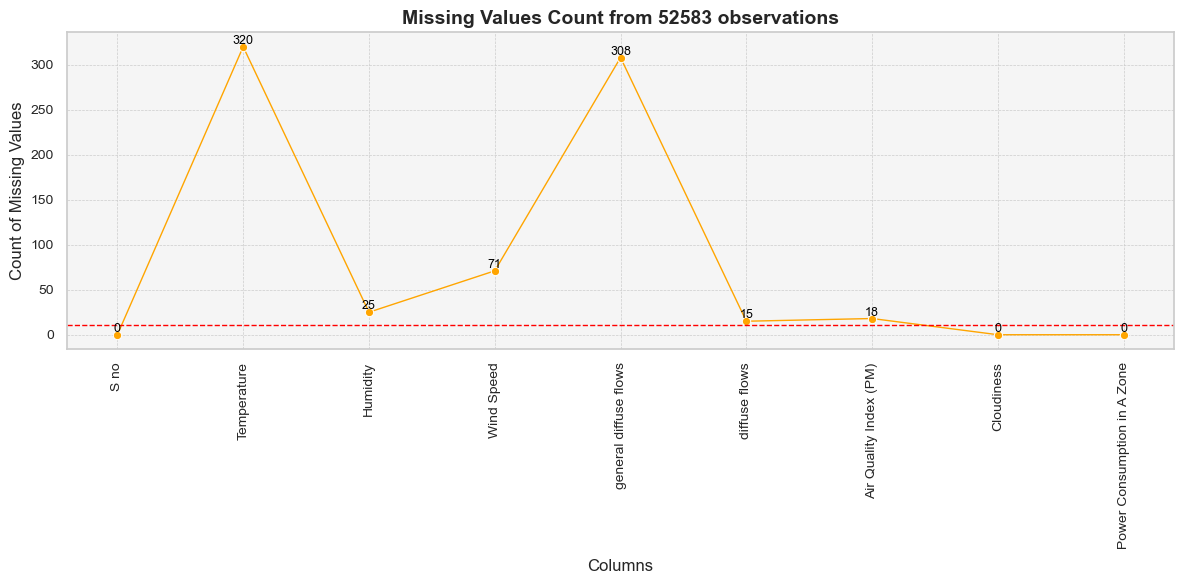

In [8]:
# Set plot style
sns.set(style="whitegrid")

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Plot the line with a color and linewidth
ax = sns.lineplot(data=df1.isna().sum(), marker="o", color="orange", linewidth=1)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Add title and labels
plt.title("Missing Values Count from 52583 observations", fontsize=14, fontweight="bold")
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Count of Missing Values", fontsize=12)

# Annotate each point with its value
for i, v in enumerate(df1.isna().sum()):
    plt.text(i, v, f"{v}", ha='center', va='bottom', color="black", fontsize=9,)

    # Draw a horizontal line at y=11
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label="11")

# Customize the background and grid lines
ax.set_facecolor("whitesmoke")
ax.grid(True, which="major", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
#!pip install matplotlib-venn


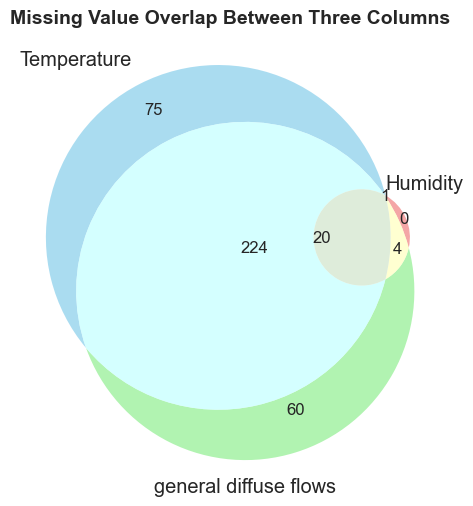

In [10]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define the three column names
col1 = 'Temperature'
col2 = 'Humidity'
col3 = 'general diffuse flows'

# Create boolean masks of missing values
missing_col1 = df1[col1].isna()
missing_col2 = df1[col2].isna()
missing_col3 = df1[col3].isna()

# Convert masks to sets of row indices
set1 = set(df1[missing_col1].index)
set2 = set(df1[missing_col2].index)
set3 = set(df1[missing_col3].index)

# Plot the 3-set Venn diagram
plt.figure(figsize=(8, 6))
venn3([set1, set2, set3],
      set_labels=(col1, col2, col3),
      set_colors=("skyblue", "lightcoral", "lightgreen"),
      alpha=0.7)

plt.title("Missing Value Overlap Between Three Columns", fontsize=14, fontweight="bold")
plt.show()


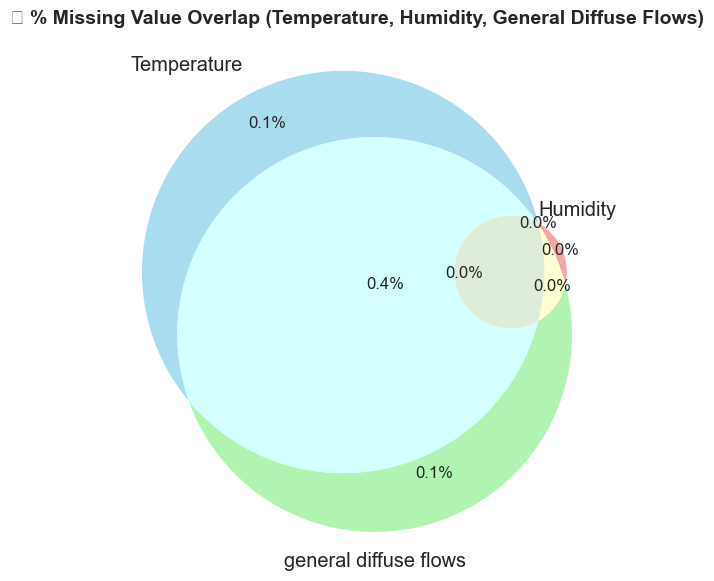

In [11]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Columns to compare
col1 = 'Temperature'
col2 = 'Humidity'
col3 = 'general diffuse flows'

# Create masks of missing values
mask1 = df1[col1].isna()
mask2 = df1[col2].isna()
mask3 = df1[col3].isna()

# Convert masks to sets of row indices
set1 = set(df1[mask1].index)
set2 = set(df1[mask2].index)
set3 = set(df1[mask3].index)

# Total rows
total_rows = len(df1)

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3],
             set_labels=(col1, col2, col3),
             set_colors=("skyblue", "lightcoral", "lightgreen"),
             alpha=0.7)

# Replace subset labels with percentages
for subset_id in venn.set_labels:
    pass  # We keep default set labels (column names)

for subset_id in venn.subset_labels:
    if subset_id is not None:
        label_text = subset_id.get_text()
        if label_text:
            try:
                value = int(label_text)
                percent = (value / total_rows) * 100
                subset_id.set_text(f"{percent:.1f}%")
            except:
                subset_id.set_text("")  # Hide if not integer
plt.title("🔍 % Missing Value Overlap (Temperature, Humidity, General Diffuse Flows)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [12]:
# # Install the necessary package (only once)
# !pip install upsetplot


<Figure size 1200x600 with 0 Axes>

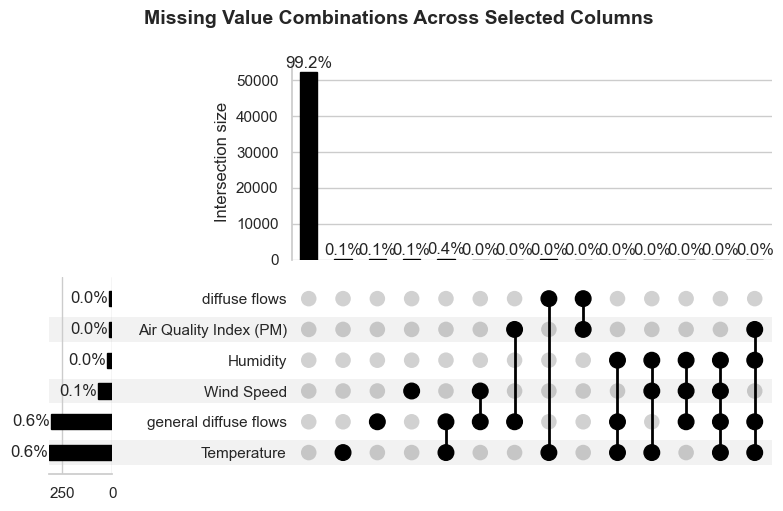

In [13]:

# Imports
import pandas as pd
from upsetplot import UpSet, from_indicators
import matplotlib.pyplot as plt

# Columns to compare
cols = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)']

# Create boolean DataFrame of missing values
missing_df = df1[cols].isna()

# Convert to UpSet format
upset_data = from_indicators(missing_df)

# Plot
plt.figure(figsize=(12, 6))
UpSet(upset_data, subset_size='count', show_percentages=True).plot()

plt.suptitle("Missing Value Combinations Across Selected Columns", fontsize=14, fontweight='bold')
plt.show()


In [14]:
(df1.isna().sum() / len(df1)*100).sort_values(ascending=False)

Temperature                     0.608562
general diffuse flows           0.585741
Wind Speed                      0.135025
Humidity                        0.047544
Air Quality Index (PM)          0.034232
diffuse flows                   0.028526
S no                            0.000000
Cloudiness                      0.000000
 Power Consumption in A Zone    0.000000
dtype: float64

In [15]:
# dropping all na values
df1.dropna(inplace=True)

In [16]:
df1.duplicated().sum()

np.int64(0)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52145 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52145 non-null  int64  
 1   Temperature                   52145 non-null  object 
 2   Humidity                      52145 non-null  object 
 3   Wind Speed                    52145 non-null  float64
 4   general diffuse flows         52145 non-null  float64
 5   diffuse flows                 52145 non-null  float64
 6   Air Quality Index (PM)        52145 non-null  float64
 7   Cloudiness                    52145 non-null  int64  
 8    Power Consumption in A Zone  52145 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
df1.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')

<h3 style="color:#880e4f;background:#fce4ec;padding:8px;border-radius:5px;">⚠️ 𝓗𝓪𝓷𝓭𝓵𝓲𝓷𝓰 𝓟𝓻𝓸𝓫𝓵𝓮𝓶𝓪𝓽𝓲𝓬 𝓥𝓪𝓵𝓾𝓮𝓼</h3>



In [19]:
# df[["Temperature","Humidity"]] =  df[["Temperature","Humidity"]].astype(float)

In [20]:
# find all string problematic values in Temperature and Humidity
def find_problematic_values(df1, column):
    problematic_values = df1[column].apply(lambda x: isinstance(x, str) and not x.replace('.', '', 1).isdigit())
    return df1[problematic_values][column].unique()
problematic_temperature = find_problematic_values(df1, 'Temperature')
problematic_humidity = find_problematic_values(df1, 'Humidity')



In [21]:
problematic_temperature


array(['5.488 dc'], dtype=object)

In [22]:
problematic_humidity

array(['84.8 i'], dtype=object)

In [23]:
# remove space and string values in Temperature and Humidity and convert to float

def clean_column(df1, column):
    df1[column] = df1[column].apply(lambda x: float(x) if isinstance(x, (int, float)) or (isinstance(x, str) and x.replace('.', '', 1).isdigit()) else np.nan)
    return df1
df1 = clean_column(df1, 'Temperature')
df1 = clean_column(df1, 'Humidity')

In [24]:
df1

S no  Temperature  Humidity  Wind Speed  general diffuse flows  \
0          1        6.559      73.8       0.083                  0.051   
1          2        6.414      74.5       0.083                  0.070   
2          3        6.313      74.5       0.080                  0.062   
3          4        6.121      75.0       0.083                  0.091   
4          5        5.921      75.7       0.081                  0.048   
...      ...          ...       ...         ...                    ...   
52411  52412        7.010      72.4       0.080                  0.040   
52412  52413        6.947      72.6       0.082                  0.051   
52413  52414        6.900      72.8       0.086                  0.084   
52414  52415        6.758      73.0       0.080                  0.066   
52415  52416        6.580      74.1       0.081                  0.062   

       diffuse flows  Air Quality Index (PM)  Cloudiness  \
0              0.119                   158.0           1   
1              0.085                   159.0           1   
2              0.100                   151.0           1   
3              0.096                   151.0           1   
4              0.085                   154.0           1   
...              ...                     ...         ...   
52411          0.096                   153.0           0   
52412          0.093                   153.0           0   
52413          0.074                   157.0           0   
52414          0.089                   150.0           0   
52415          0.111                   152.0           0   

        Power Consumption in A Zone  
0                       34055.69620  
1                       29814.68354  
2                       29128.10127  
3                       28228.86076  
4                       27335.69620  
...                             ...  
52411                   31160.45627  
52412                   30430.41825  
52413                   29590.87452  
52414                   28958.17490  
52415                   28349.80989  

[52145 rows x 9 columns]

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52145 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52145 non-null  int64  
 1   Temperature                   52144 non-null  float64
 2   Humidity                      52144 non-null  float64
 3   Wind Speed                    52145 non-null  float64
 4   general diffuse flows         52145 non-null  float64
 5   diffuse flows                 52145 non-null  float64
 6   Air Quality Index (PM)        52145 non-null  float64
 7   Cloudiness                    52145 non-null  int64  
 8    Power Consumption in A Zone  52145 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 4.0 MB


In [26]:
df1.drop(columns=['S no'], inplace=True)

In [27]:
df1.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52144.00000  52144.000000  52145.000000           52145.000000   
mean      18.84124     68.238280      1.968434             182.861960   
std        5.81024     15.571276      2.350838             264.757717   
min        3.24700     11.340000      0.050000               0.004000   
25%       14.43000     58.270000      0.078000               0.062000   
50%       18.84000     69.850000      0.086000               4.987000   
75%       22.92000     81.400000      4.915000             319.600000   
max       40.01000     94.800000      6.483000            1163.000000   

       diffuse flows  Air Quality Index (PM)    Cloudiness  \
count   52145.000000            52145.000000  52145.000000   
mean       75.195083              154.499530      0.007038   
std       124.433309                2.872062      0.083598   
min         0.011000              150.000000      0.000000   
25%         0.122000              152.000000      0.000000   
50%         4.411000              155.000000      0.000000   
75%       101.300000              157.000000      0.000000   
max       936.000000              159.000000      1.000000   

        Power Consumption in A Zone  
count                  52145.000000  
mean                   31112.183719  
std                     8008.047631  
min                     9457.750760  
25%                    24804.551420  
50%                    31236.196720  
75%                    36763.076920  
max                    52204.395120

---
<h2 style="color:#6a1b9a;background:#ede7f6;padding:8px;border-radius:5px;">📊 𝓔𝔁𝓹𝓵𝓸𝓻𝓪𝓽𝓸𝓻𝔂 𝓓𝓪𝓽𝓪 𝓐𝓷𝓪𝓵𝔂𝓼𝓲𝓼 (𝓔𝓓𝓐)</h2>


### Explanation of Weather Parameters and Their Relationship to Power Consumption

1. **Temperature**  
    - **Description:** Measures the degree of hotness or coldness of the atmosphere, typically in degrees Celsius.
    - **Relation to Power Consumption:** Higher temperatures often increase the use of air conditioning, leading to higher power consumption. Conversely, lower temperatures may increase heating needs, also raising power usage.

2. **Humidity**  
    - **Description:** Represents the amount of water vapor in the air, usually as a percentage.
    - **Relation to Power Consumption:** High humidity can make temperatures feel warmer, prompting more air conditioning use. Low humidity in cold weather can increase heating demand.

3. **Wind Speed**  
    - **Description:** The rate at which air is moving horizontally, measured in meters per second (m/s).
    - **Relation to Power Consumption:** High wind speeds can increase heat loss from buildings, raising heating needs in cold weather. In some cases, wind can aid cooling in hot weather, potentially reducing power consumption.

4. **General Diffuse Flows**  
    - **Description:** Refers to the amount of solar radiation received indirectly (scattered by the atmosphere).
    - **Relation to Power Consumption:** Higher diffuse solar radiation can increase indoor temperatures, affecting cooling or heating requirements.

5. **Diffuse Flows**  
    - **Description:** Similar to general diffuse flows, it measures the scattered component of solar radiation.
    - **Relation to Power Consumption:** Impacts the thermal load on buildings, influencing the need for cooling or heating.

6. **Air Quality Index (PM)**  
    - **Description:** Indicates the concentration of particulate matter (PM) in the air, reflecting air pollution levels.
    - **Relation to Power Consumption:** Poor air quality may lead to increased use of air purifiers and HVAC systems, raising power consumption.

7. **Cloudiness**  
    - **Description:** Indicates the fraction of the sky covered by clouds (often binary or categorical).
    - **Relation to Power Consumption:** Cloudy conditions reduce solar gain, potentially increasing heating needs and reducing cooling needs.

8. **Power Consumption in A Zone**  
    - **Description:** The total electrical power consumed in a specific area or zone.
    - **Relation to Weather Parameters:** Power consumption is directly influenced by the above weather parameters due to their impact on heating, cooling, and air quality management systems.

#### Summary Table

| Parameter                  | Impact on Power Consumption                                      |
|----------------------------|------------------------------------------------------------------|
| Temperature                | ↑ temp → ↑ cooling; ↓ temp → ↑ heating                           |
| Humidity                   | ↑ humidity → ↑ cooling; ↓ humidity (cold) → ↑ heating            |
| Wind Speed                 | ↑ wind (cold) → ↑ heating; ↑ wind (hot) → ↓ cooling (sometimes)  |
| General Diffuse Flows      | ↑ solar gain → ↑ cooling or ↓ heating                            |
| Diffuse Flows              | ↑ solar gain → ↑ cooling or ↓ heating                            |
| Air Quality Index (PM)     | ↑ PM → ↑ air purifier/HVAC use                                   |
| Cloudiness                 | ↑ cloudiness → ↓ cooling, ↑ heating                              |

**Note:** The actual impact depends on local climate, building insulation, and occupant behavior.

#### PairPLot of Numeric columns

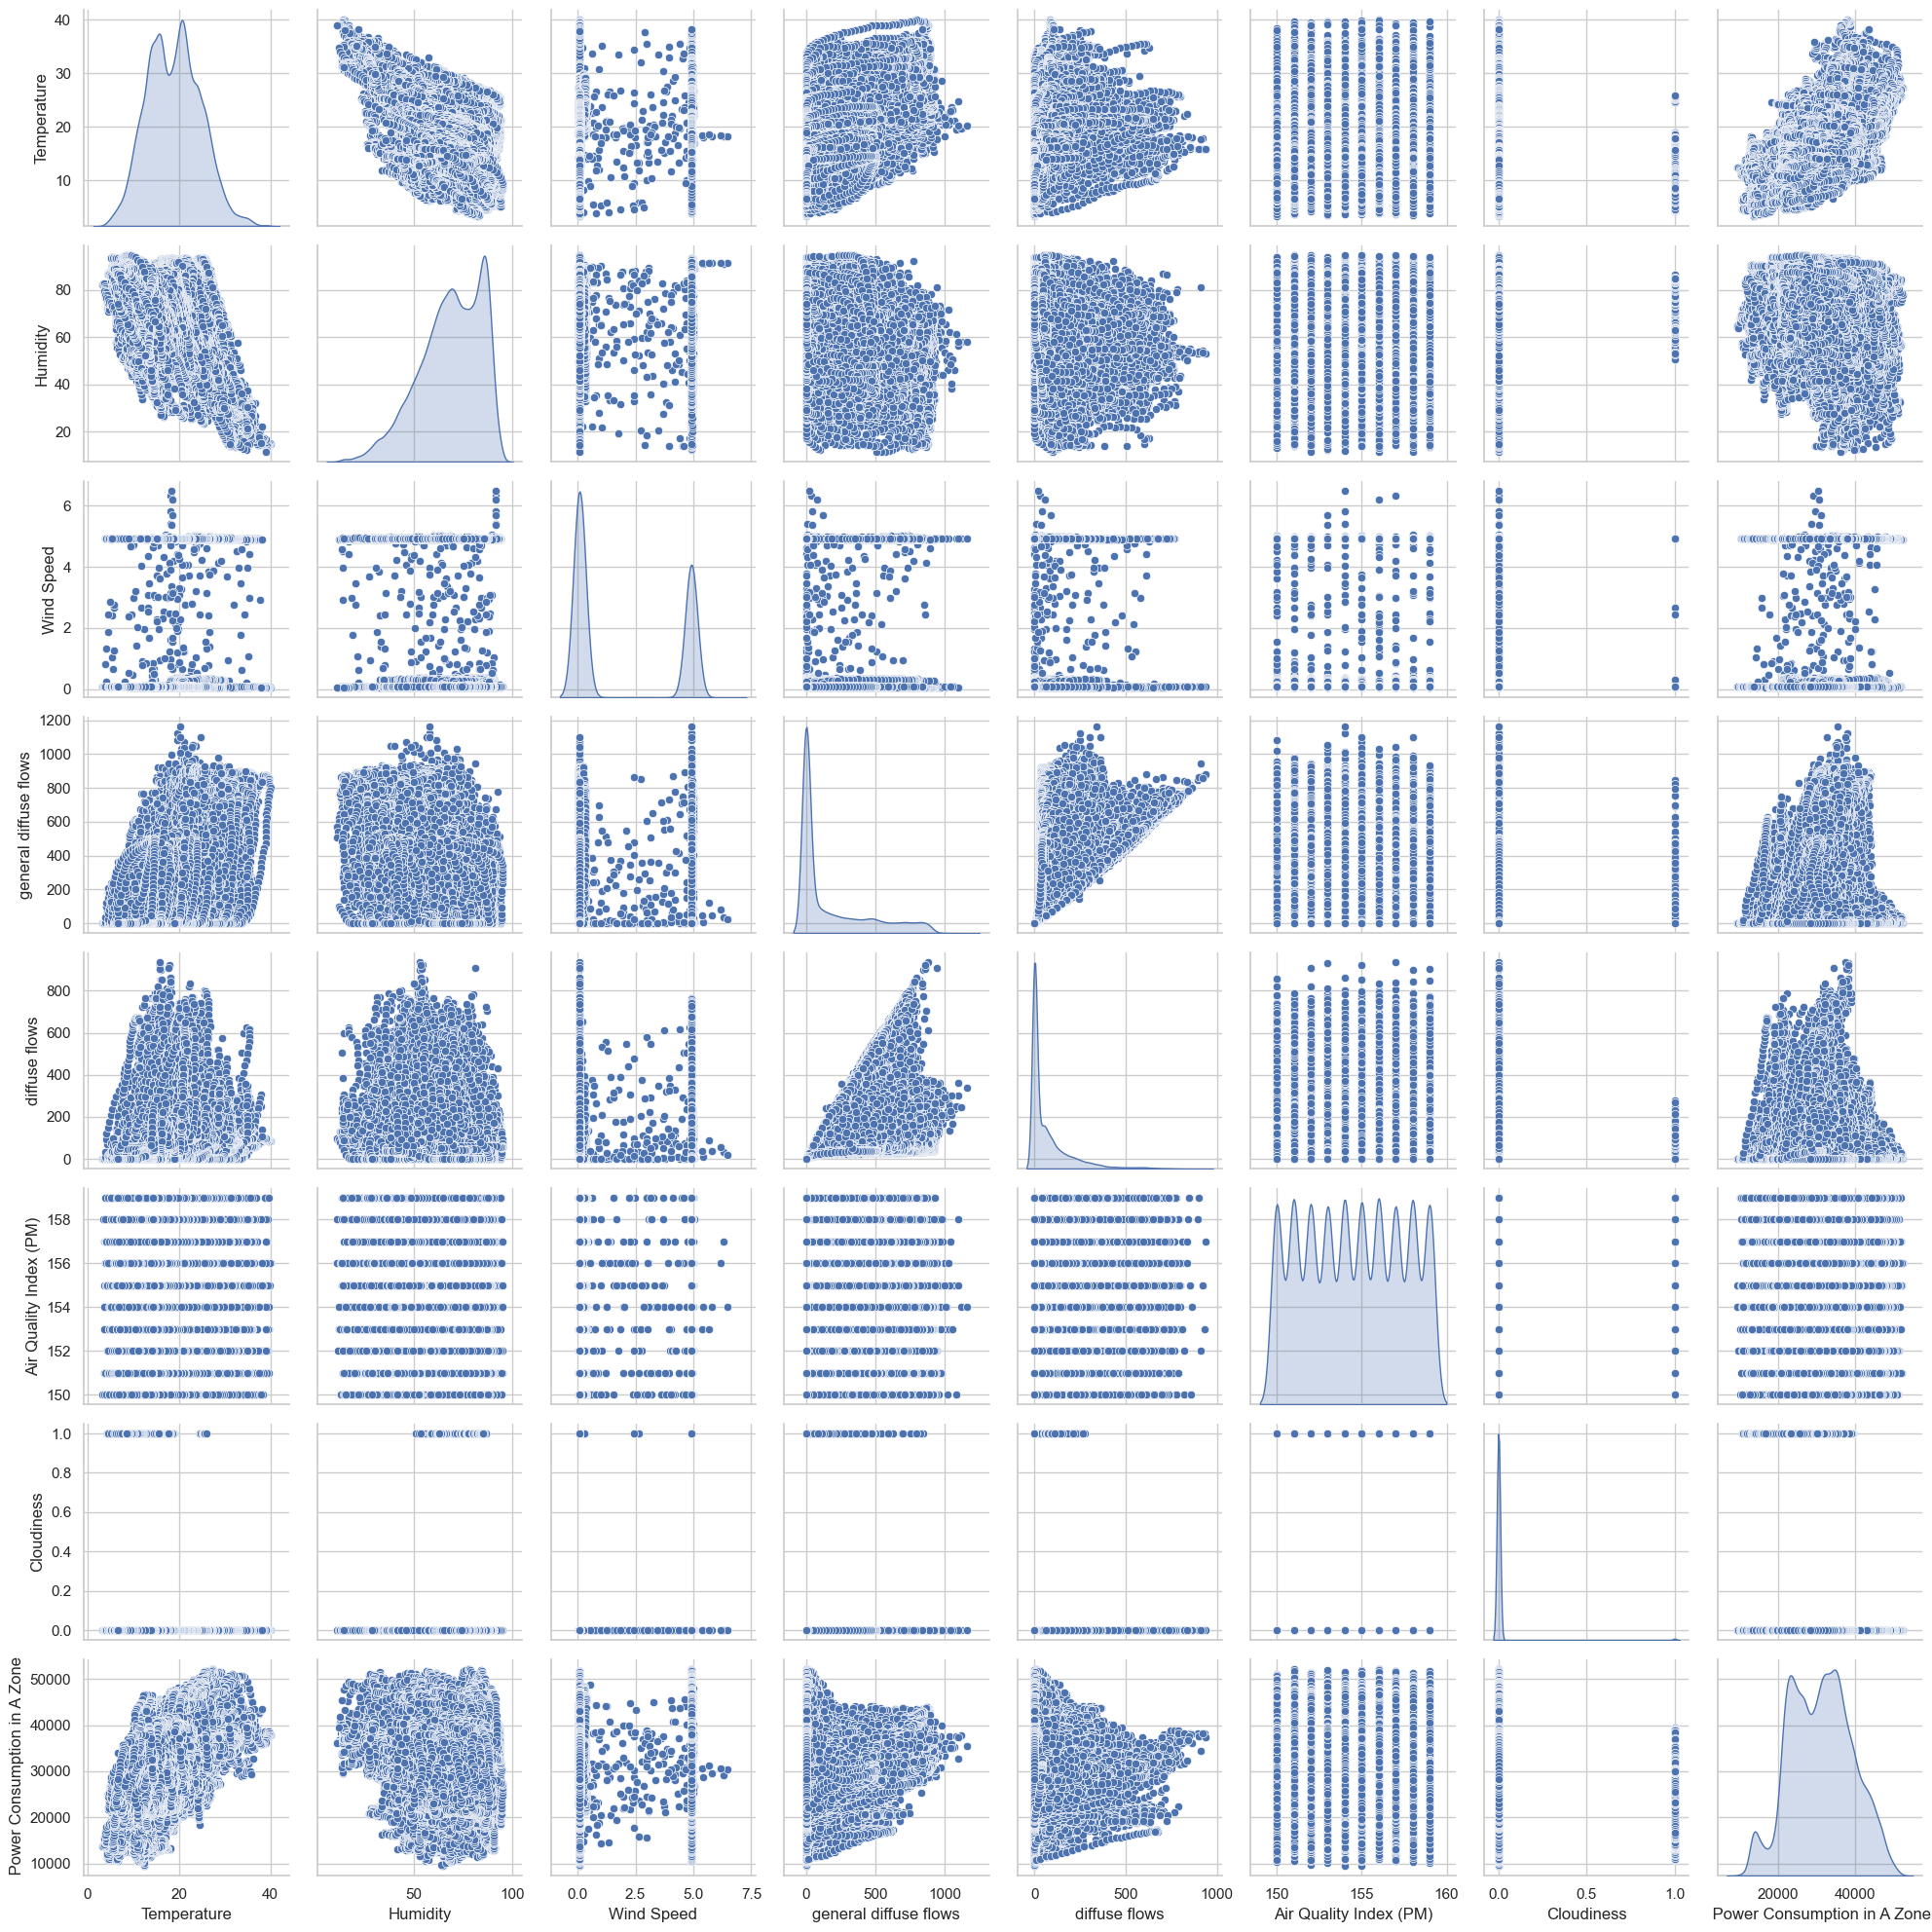

In [28]:
# Pairplot to visualize relationships
sns.pairplot(df1, diag_kind='kde')
plt.tight_layout()
plt.show()

### Interpretation & Insights: Pairplot of All Numeric Columns

**Visual Summary:**  
The pairplot provides a grid of scatterplots and kernel density estimates for each pair of numeric features in the dataset. Diagonal plots show the distribution of each variable, while off-diagonal plots reveal relationships between variables.

#### Key Findings:

1. **Temperature vs. Humidity:**
    - Strong negative correlation: As temperature increases, humidity tends to decrease.
    - Both show multimodal distributions, suggesting seasonality or distinct weather regimes.

2. **Temperature, Humidity vs. Power Consumption:**
    - Power consumption increases with higher temperatures and higher humidity, likely due to increased cooling needs (e.g., air conditioning).
    - Lower temperatures may also show increased consumption due to heating.

3. **Wind Speed:**
    - Most values are clustered at low wind speeds, with a long tail of higher speeds.
    - Weak or no clear relationship with power consumption.

4. **General Diffuse Flows & Diffuse Flows:**
    - Highly right-skewed distributions, indicating most days have low solar radiation but occasional spikes.
    - Weak positive relationship with temperature.

5. **Air Quality Index (PM):**
    - Appears discrete or periodic, with little direct relationship to other features or power consumption.

6. **Cloudiness:**
    - Binary/categorical variable (mostly clear or cloudy).
    - No strong direct relationship with other features, but may influence solar radiation and thus power consumption.

7. **Power Consumption in A Zone:**
    - Multimodal and slightly right-skewed, with some outliers.
    - Most strongly related to temperature and humidity.

#### General Insights:

- **Seasonality:** Multimodal distributions in temperature and humidity suggest seasonal effects, which are important for energy forecasting.
- **Feature Relationships:** Temperature and humidity are the strongest predictors of power consumption.
- **Skewness & Outliers:** Several features (wind speed, solar flows) are highly skewed and contain outliers, which may affect modeling and should be transformed or handled.
- **Feature Engineering:** Consider interaction terms and non-linear models to capture complex relationships.
- **Actionable Suggestions:**
  - Use temperature and humidity as primary predictors.
  - Apply log or robust transformations to highly skewed features.
  - Segment data by season or weather regime for improved forecasting.
  - Handle outliers and scale features for machine learning models.

**Conclusion:**  
The pairplot confirms that weather parameters, especially temperature and humidity, have a significant impact on power consumption. Proper feature engineering and transformation are essential for building accurate predictive models.

---
 ##### **Correlation Heatmap** 
-  to check colinearity among variables

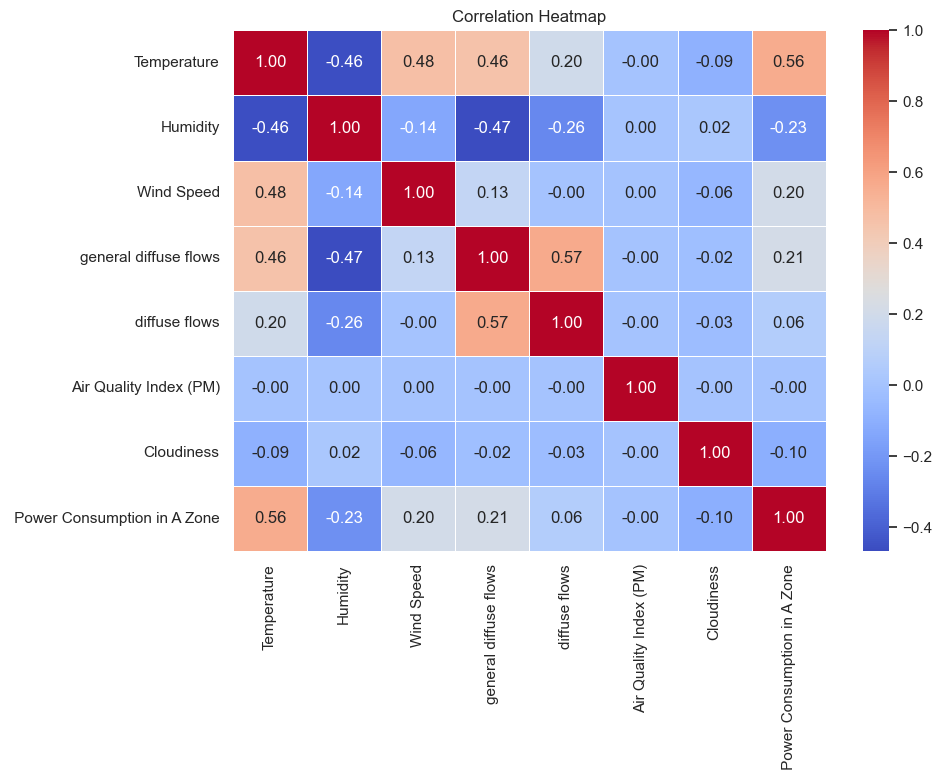

In [29]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

* Interpretation & Insights: Correlation Heatmap

* The correlation heatmap visualizes the linear relationships between all pairs of numerical features in the dataset.
> key findings and insights:
1. Temperature & Power Consumption:
    - There is a strong positive correlation between Temperature and Power Consumption in A Zone.
    - This suggests that as temperature increases, power consumption also tends to rise, likely due to increased use of cooling systems.

2. Humidity_ScTr & Power Consumption:
    - Humidity (after transformation and scaling) also shows a positive correlation with power consumption, but generally weaker than temperature.
    - This indicates that higher humidity may contribute to higher energy usage, possibly due to air conditioning demand.

3. Temperature & Humidity_ScTr:
    - There is a moderate to strong negative correlation between Temperature and Humidity_ScTr.
    - This is expected, as higher temperatures often coincide with lower humidity and vice versa.

4. Wind Speed, General_Diffuse_Flows_LgTr, Diffuse_Flows_LgTr:
    - These features show weak or negligible correlation with power consumption.
    - Their relationships with other variables are also weak, suggesting limited direct impact on energy usage.

5. Air Quality Index (PM):
    - Shows very low correlation with power consumption and other features.
    - Indicates that air quality, as measured here, does not have a strong direct effect on energy demand.

6. Cloudiness:
    - Cloudiness is nearly uncorrelated with most variables, except for a slight negative correlation with solar-related features.
    - Its effect on power consumption is minimal in this dataset.

7. Multicollinearity:
    - No pairs of features (other than Temperature & Humidity_ScTr) show very high correlation, indicating low risk of multicollinearity for most models.

> General Insights:
- Temperature is the most important predictor for power consumption, followed by humidity.
- Other weather/environmental features have weak direct relationships with power usage.
- Feature engineering should focus on temperature and humidity, while wind, solar, and air quality may be secondary.
- The lack of strong correlations among most features is good for model stability and interpretability.

> Actionable Suggestions:
- Use temperature and humidity as primary features in regression and forecasting models.
- Consider interaction terms or non-linear models if subtle relationships exist.
- No urgent need for dimensionality reduction due to low multicollinearity.
"""

---
> #### **HistogramPlot** of Numerics
- To check 
    - distribution of numeric variables
    - Skweness and Kurtosis of spread

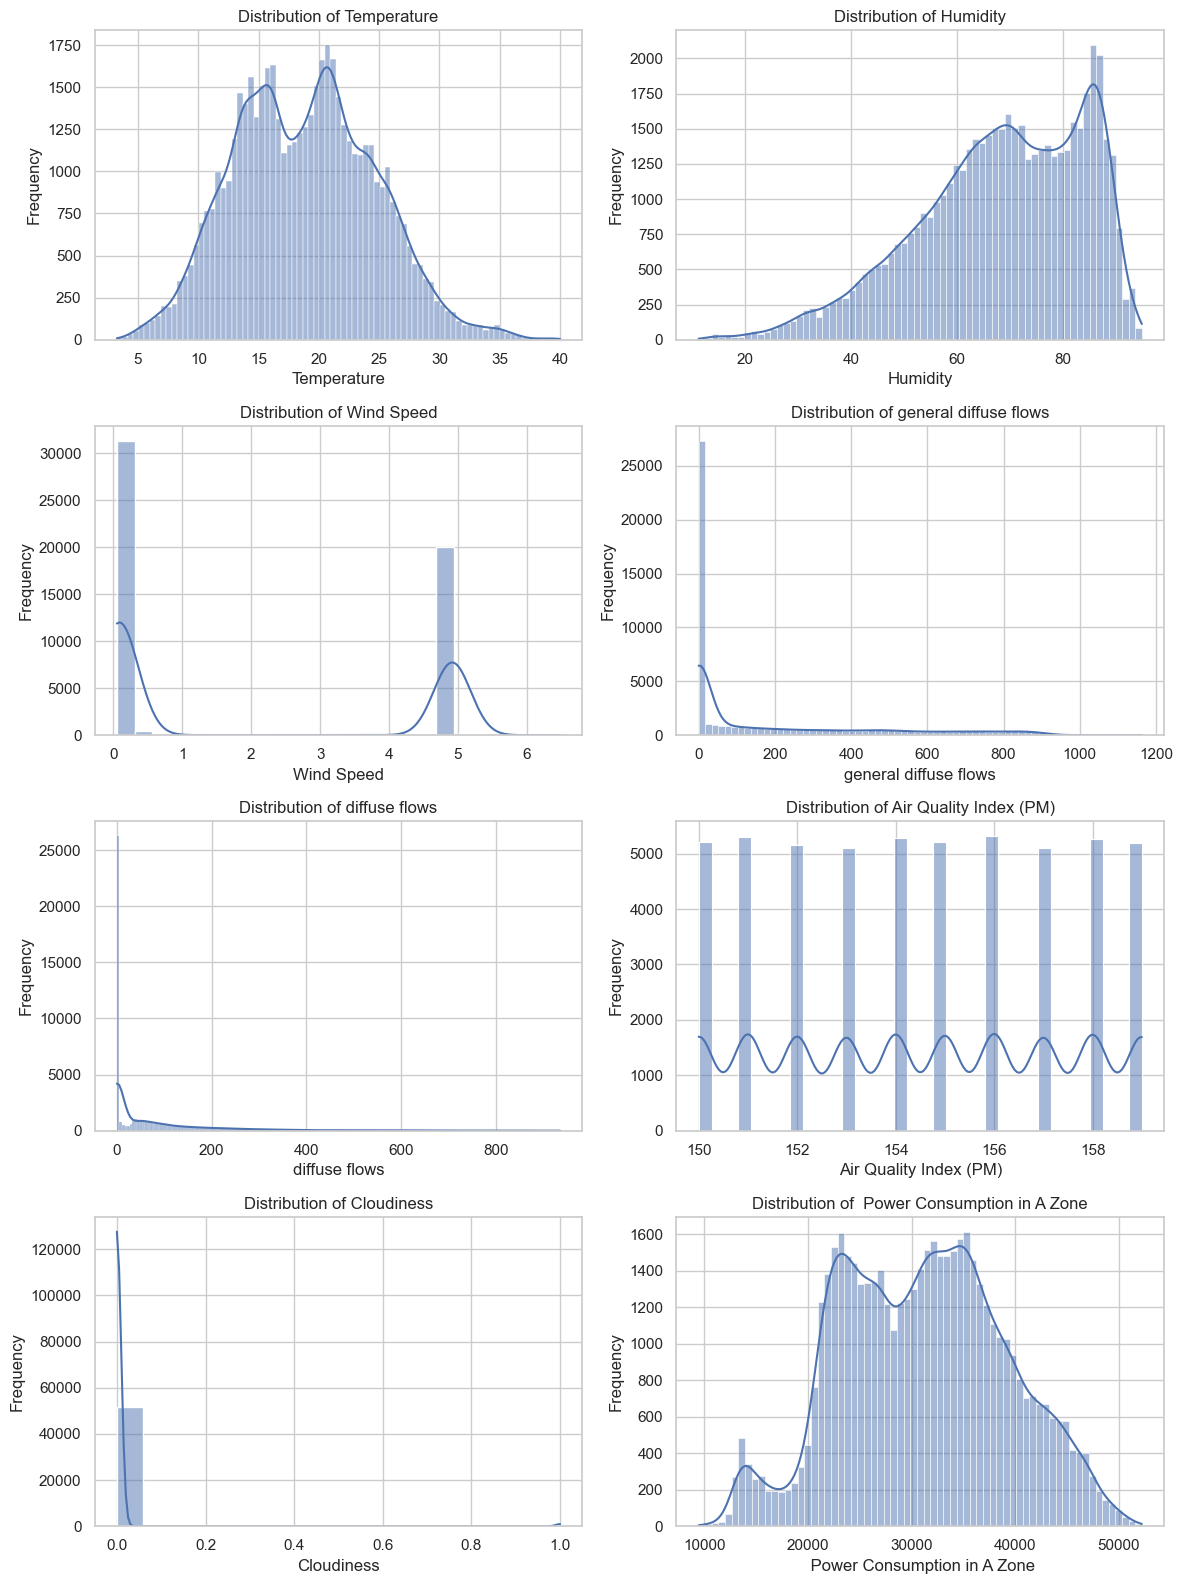

In [30]:
# Distribution plots for all numeric columns in a 2-column grid
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(12, 4 * n_rows))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Interpretation and Insights for Distribution Plots

1. Temperature & Humidity:
Both show multimodal distributions, indicating possible seasonality or different weather regimes.
There are some outliers and possibly missing or erroneous values (already identified and cleaned).
If strong skewness or outliers remain, consider normalization or robust scaling.

2. Wind Speed, general diffuse flows, diffuse flows:
These features are highly right-skewed with many low values and a long tail.
Log transformation or Box-Cox transformation can help normalize these distributions for modeling.

3. Air Quality Index (PM):
Appears to have a discrete, possibly uniform or periodic distribution.
If not ordinal, consider treating as categorical or using one-hot encoding.

4. Cloudiness:
This is a binary or categorical variable (0 or 1), so no transformation is needed.

5. Power Consumption in A Zone (Target):
The distribution is multimodal and slightly right-skewed.
For regression, if skewness is high, log transformation can help stabilize variance and improve model performance.

General Suggestions:
- For highly skewed features (wind speed, diffuse flows), apply log1p (log(x+1)) transformation.
- For the target variable, check skewness; if >1, apply log transformation.
- Standardize or normalize features for algorithms sensitive to scale (e.g., KNN, neural networks).
- Consider feature engineering for multimodal features (e.g., extracting seasonality).

Insights and suggestions:

- Temperature and Humidity: Multimodal, possibly due to seasonality. Outliers should be handled. Consider normalization.
- Wind Speed, general diffuse flows, diffuse flows: Highly right-skewed. Apply log1p transformation.
- Air Quality Index (PM): Discrete, may be treated as categorical if not ordinal.
- Cloudiness: Binary/categorical, no transformation needed.
- Power Consumption (target): Multimodal, slightly right-skewed. If skewness is high, apply log transformation.

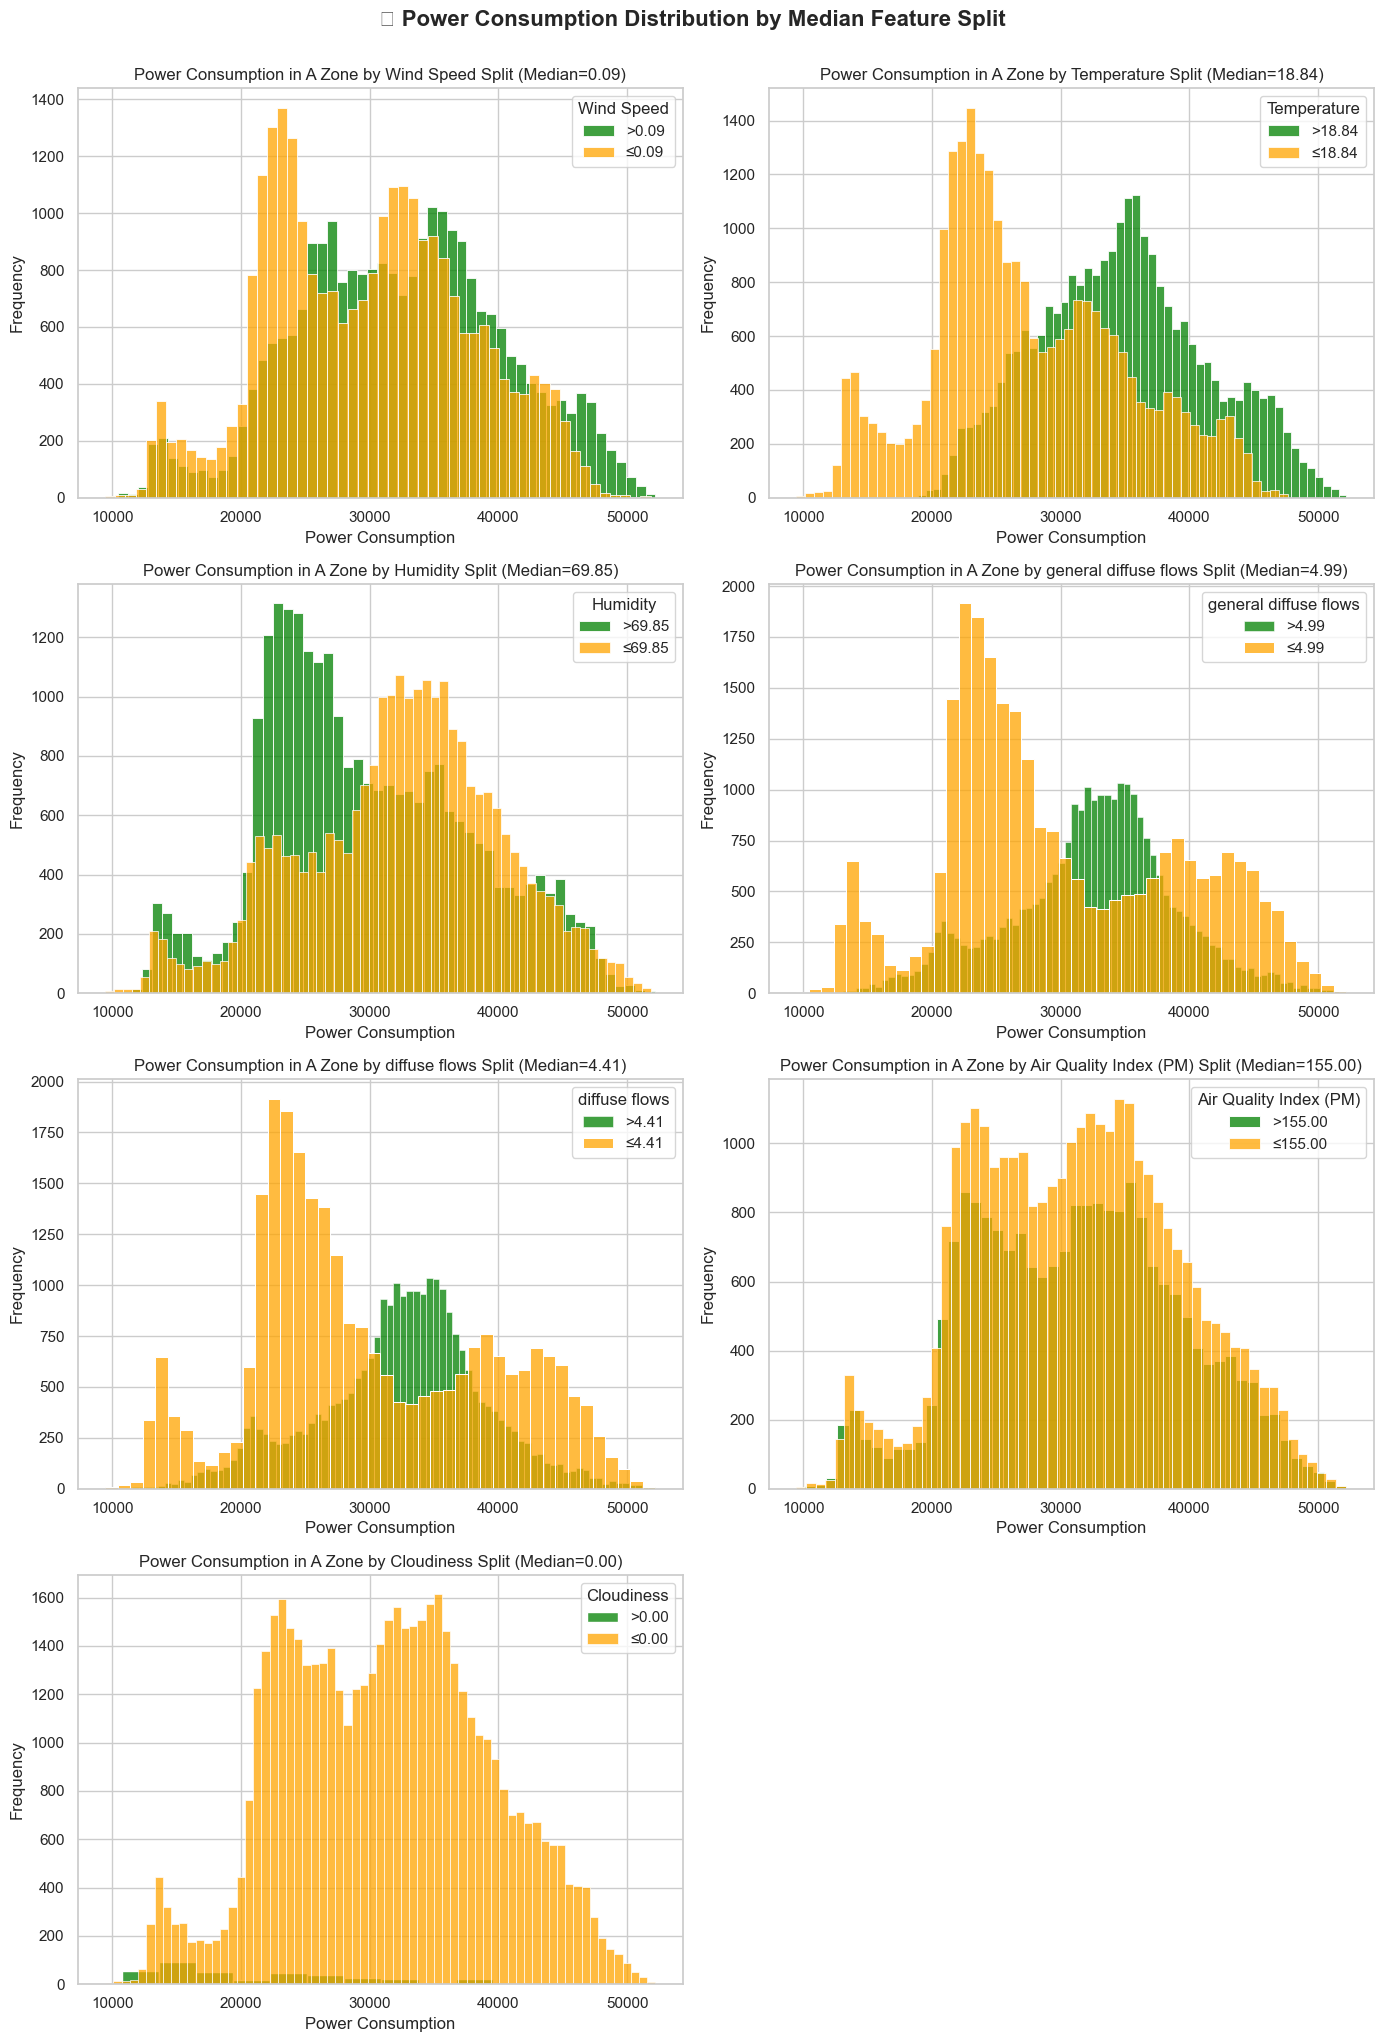

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clean column names (important!)
df1.columns = df1.columns.str.strip()

# Columns to compare
cols_to_compare = ['Wind Speed', 'Temperature', 'Humidity', 'general diffuse flows',
                   'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness']
target_col = 'Power Consumption in A Zone'

# Subplot setup
n_cols = 2
n_rows = int(np.ceil(len(cols_to_compare) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

# Loop over features
for i, feature in enumerate(cols_to_compare):
    median_val = df1[feature].median()

    greater = df1[df1[feature] > median_val][target_col]
    lower_eq = df1[df1[feature] <= median_val][target_col]

    sns.histplot(greater, color='green', label=f'>{median_val:.2f}', kde=False, ax=axes[i])
    sns.histplot(lower_eq, color='orange', label=f'≤{median_val:.2f}', kde=False, ax=axes[i])

    axes[i].set_title(f'{target_col} by {feature} Split (Median={median_val:.2f})', fontsize=12)
    axes[i].set_xlabel('Power Consumption')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title=feature)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("📊 Power Consumption Distribution by Median Feature Split", fontsize=16, y=1.02, fontweight='bold')
plt.show()


### Interpretation & Insights: Power Consumption Distribution by Median Feature Split

**Visual Summary:**  
The multi-panel histogram visualizes how "Power Consumption in A Zone" is distributed when split by the median value of each weather/environmental feature. For each feature, the data is divided into two groups: above median (green) and below/equal median (orange).

#### Key Findings:

1. **Temperature & Humidity:**
    - Higher temperature and humidity (above median) are associated with higher power consumption, likely due to increased cooling needs (e.g., air conditioning).
    - Both features show multimodal distributions, indicating seasonality or different weather regimes.

2. **Wind Speed:**
    - Lower wind speeds (≤ median) correspond to higher power consumption, possibly due to less natural ventilation or cooling.
    - Higher wind speeds (> median) show a broader, lower distribution.

3. **General Diffuse Flows & Diffuse Flows:**
    - Lower values (≤ median) are linked to higher power consumption, suggesting that less solar radiation may increase heating needs.
    - Higher values (> median) shift the distribution lower, possibly due to increased natural lighting/heating.

4. **Air Quality Index (PM):**
    - Minimal difference between groups, indicating air quality has a weaker direct effect on power consumption.

5. **Cloudiness:**
    - Most data falls in the "≤ median" group (likely clear days), with higher power consumption.
    - Cloudy conditions (> median) are rare and show lower consumption, possibly due to reduced cooling needs.

#### General Insights & Way Forward:

- **Seasonality & Weather Impact:** Temperature and humidity are the strongest drivers of power consumption, confirming their importance for energy forecasting.
- **Skewness & Outliers:** Most distributions are right-skewed, with long tails at higher consumption, indicating occasional spikes (e.g., heatwaves).
- **Feature Engineering:** Splitting by median reveals non-linear effects; consider interaction terms or non-linear models for improved prediction.
- **Energy Management:** Utilities should focus on temperature and humidity forecasts for demand planning, while wind and solar-related features have secondary effects.

**Actionable Suggestions:**
- Use temperature and humidity as primary predictors in regression and time series models.
- Apply log or robust transformations to highly skewed features.
- Consider seasonality and weather regime segmentation for more accurate load forecasting.
- Explore non-linear and interaction effects in modeling to capture complex relationships.

---
> ##### _____________________________________________________________  BoxPlot of numeric variables____________________________________________________________________
* To check
    - sperad of dustribution
    - Outliers detection

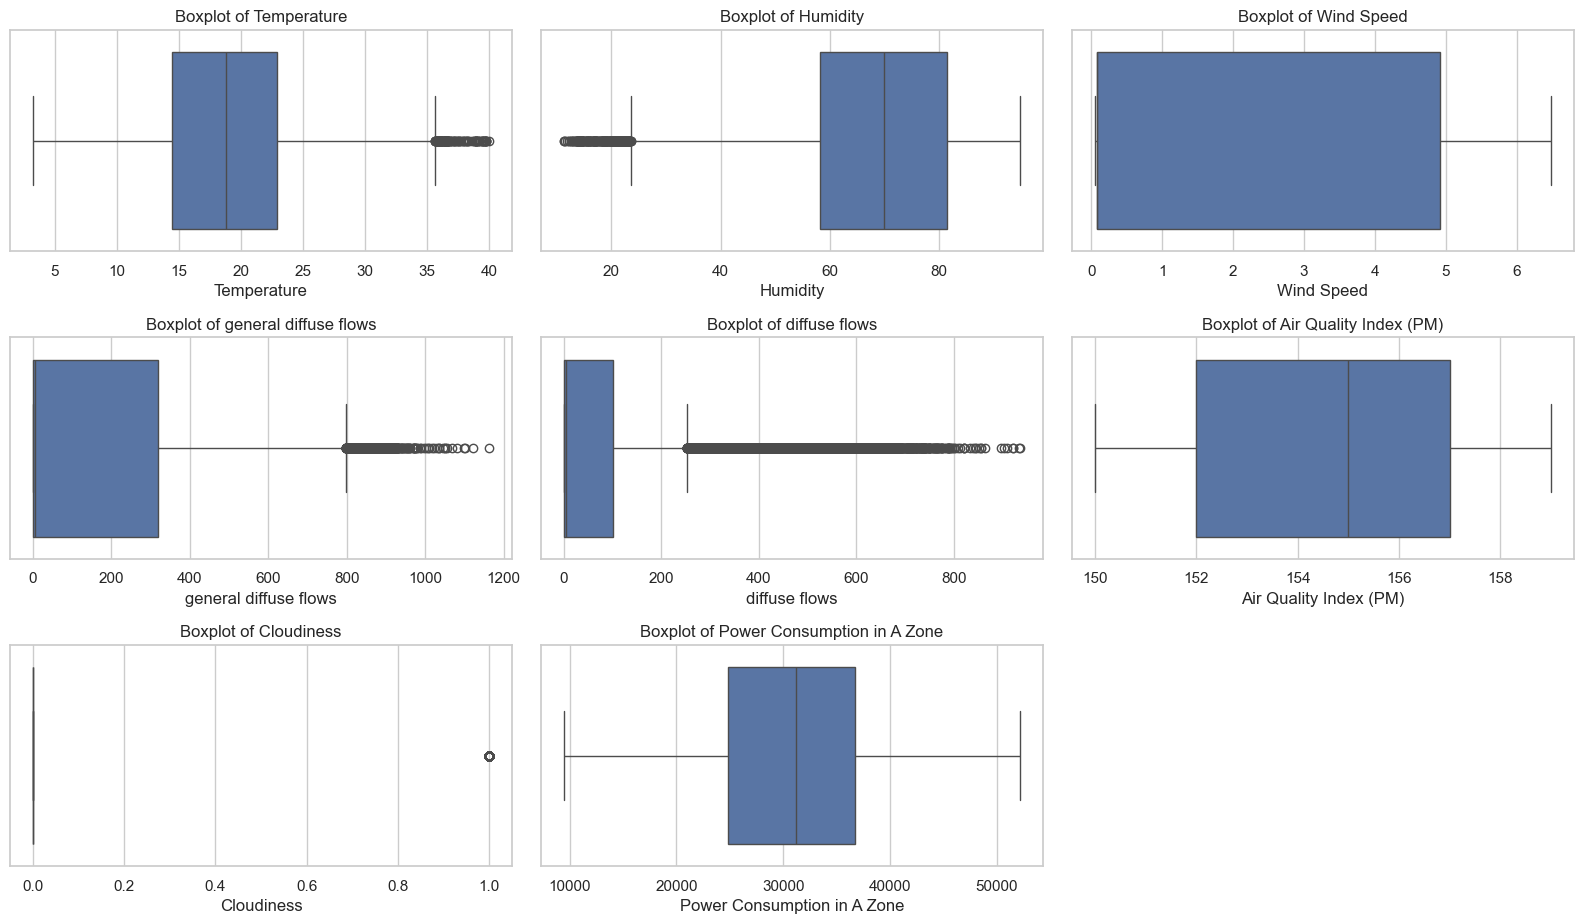

In [32]:
# checking outliers in all columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(df1.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show() 

### Interpretation & Insights: Boxplots of All Numeric Columns

**Visual Summary:**  
The boxplots provide a concise overview of the distribution, central tendency, spread, and outliers for each numeric feature in the dataset.

#### Key Findings:

1. **Temperature, Humidity, Wind Speed:**
    - **Temperature:** Mostly symmetric, with a few outliers on the higher end. Most values are concentrated between 15 and 25°C.
    - **Humidity:** Wide spread, with some extreme values. Indicates variability in atmospheric moisture.
    - **Wind Speed:** Highly right-skewed, with most values near zero and a long tail of higher speeds.

2. **General Diffuse Flows & Diffuse Flows:**
    - Both show strong right-skewness and many outliers, suggesting that most days have low solar radiation, but occasional spikes occur.

3. **Air Quality Index (PM):**
    - Relatively tight distribution, indicating consistent air quality levels across observations.

4. **Cloudiness:**
    - Binary/categorical, with most values at 0 (clear) and a few at 1 (cloudy). Outliers are not meaningful here.

5. **Power Consumption in A Zone (Target):**
    - Slight right-skewness, with a few high-consumption outliers. Most values are within a moderate range.

#### General Insights:

- **Outliers:** Several features (especially wind speed and solar flows) have many outliers, which may impact model performance and should be handled (e.g., clipping, robust models).
- **Skewness:** Right-skewed features (wind speed, solar flows) may benefit from log or Box-Cox transformations for better modeling.
- **Feature Engineering:** Consider normalization or scaling for features with wide ranges and outliers.
- **Target Variable:** Power consumption is mostly stable but has occasional spikes, likely due to weather extremes or special events.

**Actionable Suggestions:**
- Apply log transformation to highly skewed features.
- Perform transformations (such as log, scaling, or power transforms) **before splitting** the data into train and test sets to ensure that the transformation parameters are learned from the training data only and applied consistently to both sets. This prevents data leakage and ensures fair model evaluation.
- Handle outliers using robust methods or clipping.
- Use temperature and humidity as primary predictors for power consumption.
- Consider seasonality and weather regime segmentation for more accurate forecasting.

---
<h2 style="color:#0d47a1;background:#e3f2fd;padding:8px;border-radius:5px;">📐 𝓗𝔂𝓹𝓸𝓽𝓱𝓮𝓼𝓲𝓼 𝓣𝓮𝓼𝓽𝓲𝓷𝓰</h2>


### 📊CHeckign Skewness and Kurtosis of Distribution of all numeric columns

In [33]:
from scipy.stats import kurtosis, skew

In [34]:
df1.dropna(inplace=True)

In [35]:
from scipy.stats import skew, kurtosis

# Prepare lists to collect stats
features = []
skews = []
kurts = []

# Loop through all numeric columns
for col in df1.select_dtypes(include='number').columns:
    series = df1[col].dropna()
    features.append(col)
    skews.append(skew(series))
    kurts.append(kurtosis(series))
    
# Now build DataFrame
stats_df = pd.DataFrame({
    'Feature': features,
    'Skewness': skews,
    'Kurtosis': kurts
})


In [36]:
from matplotlib import colors

# Define threshold-based color maps
def skew_color(val):
    if abs(val) > 1:
        return 'background-color: #e31a1c; color: white'  # high skew → red
    elif abs(val) > 0.5:
        return 'background-color: red; color: white'  # moderate skew → orange
    else:
        return ''  # fairly symmetrical → no highlight

def kurt_color(val):
    if val > 5:
        return 'background-color: #800026; color: white'  # very high kurtosis → dark red
    elif val > 3:
        return 'background-color: #feb24c; color: white'  # leptokurtic → gold
    elif val < 0:
        return 'background-color: green; color: white'  # platykurtic → blue
    else:
        return ''  # near-normal → no highlight

# Apply both gradient and conditional styling
styled_df = (stats_df.style
    # base gradient
    .background_gradient(subset=['Skewness','Kurtosis'], cmap='viridis', axis=0, vmin=None, vmax=None)
    # conditional overrides
    .applymap(skew_color, subset=['Skewness'])
    .applymap(kurt_color, subset=['Kurtosis'])
    .format({'Skewness': "{:.3f}", 'Kurtosis': "{:.3f}"})
    .set_caption("📊 Skewness & Kurtosis: Gradient + Threshold Highlights")
    .hide(axis='index')
)

styled_df


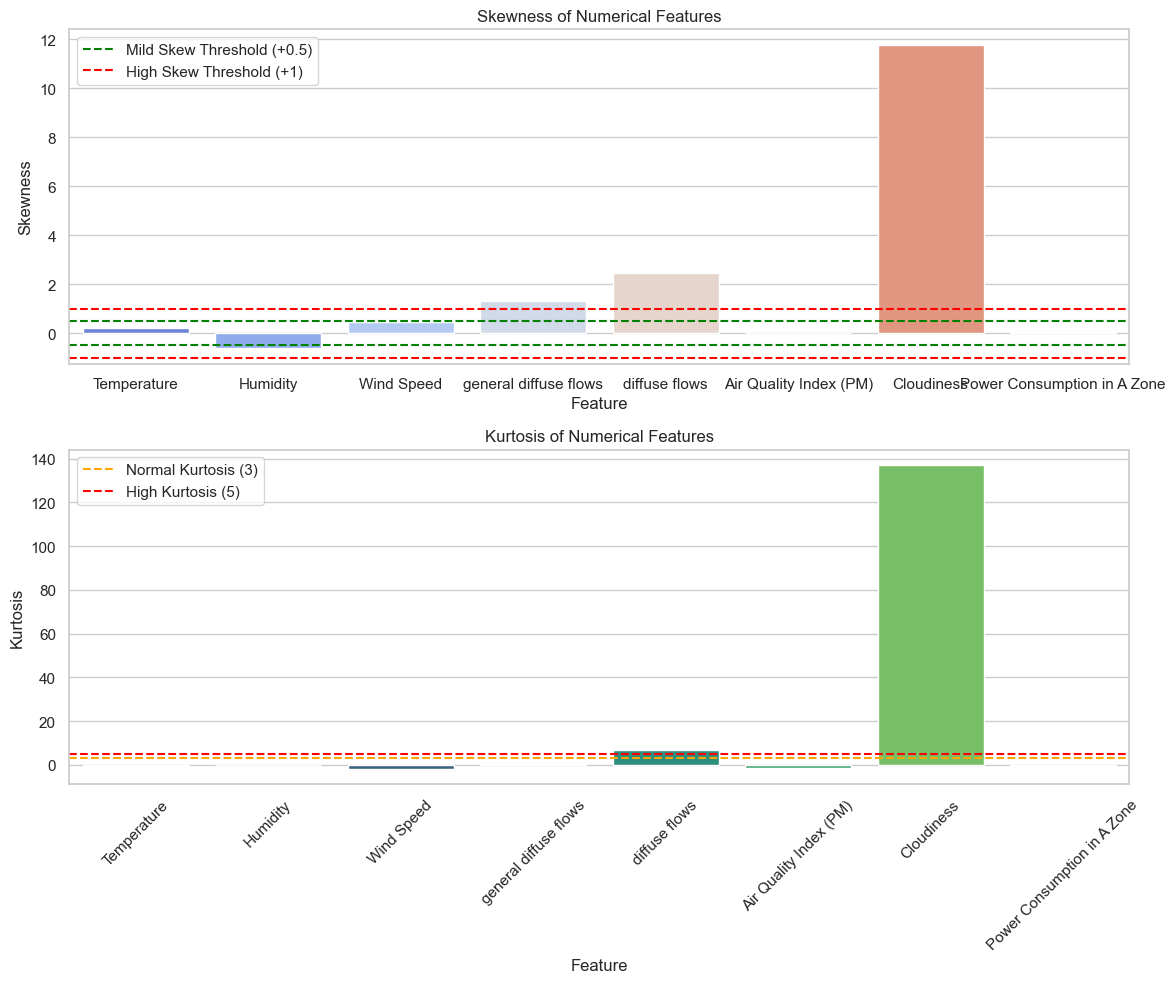

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Skewness Plot
sns.barplot(x='Feature', y='Skewness', data=stats_df, ax=axes[0], palette='coolwarm')
axes[0].axhline(0.5, color='green', linestyle='--', label='Mild Skew Threshold (+0.5)')
axes[0].axhline(-0.5, color='green', linestyle='--')
axes[0].axhline(1, color='red', linestyle='--', label='High Skew Threshold (+1)')
axes[0].axhline(-1, color='red', linestyle='--')
axes[0].set_title("Skewness of Numerical Features")
axes[0].legend()

# Kurtosis Plot
sns.barplot(x='Feature', y='Kurtosis', data=stats_df, ax=axes[1], palette='viridis')
axes[1].axhline(3, color='orange', linestyle='--', label='Normal Kurtosis (3)')
axes[1].axhline(5, color='red', linestyle='--', label='High Kurtosis (5)')
axes[1].set_title("Kurtosis of Numerical Features")
axes[1].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The distribution patterns observed in the skewness plot can be attributed to the nature of each variable:
- Temperature: Slightly right-skewed, possibly due to more frequent moderate temperatures and fewer extreme highs.
- Humidity: Slightly left-skewed, indicating most values are high with fewer low humidity periods, possibly due to local climate.
- Wind Speed, General Diffuse Flows, Diffuse Flows: Highly right-skewed, as calm or low wind/solar conditions are common, while high values are rare.
- Air Quality Index (PM): Nearly symmetric, suggesting consistent air quality levels.
- Cloudiness: Extremely skewed, likely because it's a binary/categorical variable (mostly clear or mostly cloudy).
- Power Consumption: Nearly symmetric, indicating stable consumption patterns with few extreme values.
- Humidity_transformed: Slightly left-skewed, reflecting the transformation applied to original humidity.

In summary, skewed distributions often arise from natural phenomena (e.g., weather extremes are rare), measurement limits, or the way variables are encoded (e.g., binary variables).

In [38]:
# Skewness and kurtosis are important statistical measures to understand the shape of a data distribution.

# Skewness:
# - Measures the asymmetry of the distribution.
# - If skewness ≈ 0: Distribution is symmetric (like normal distribution).
# - If skewness > 0: Right-skewed (long tail on the right).
# - If skewness < 0: Left-skewed (long tail on the left).
# - High skewness can affect statistical tests and machine learning models that assume normality.

# Kurtosis:
# - Measures the "tailedness" of the distribution.
# - High kurtosis: More outliers (heavy tails).
# - Low kurtosis: Fewer outliers (light tails).
# - Normal distribution has kurtosis ≈ 3 (excess kurtosis ≈ 0).

# Why check them?
# - Many statistical methods and ML algorithms (like linear regression, ANOVA, etc.) assume normality.
# - Non-normality (high skewness/kurtosis) can lead to biased estimates, poor model performance, and unreliable p-values.

# What to do if skewness or kurtosis is present?
# - For high skewness:
#     - Apply transformations (log, square root, Box-Cox, Yeo-Johnson) to make data more symmetric.
#     - For right-skewed: log(x+1), sqrt(x), Box-Cox.
#     - For left-skewed: square, cube, reflect and then transform.
# - For high kurtosis:
#     - Remove or cap outliers.
#     - Use robust statistical methods.
#     - Apply transformations to reduce heavy tails.
from rich import print  # Optional if you're using a rich-enabled Jupyter/CLI

# Skewness & Kurtosis Interpretation Loop
for col_name in df1.select_dtypes(include='number').columns:
    skew_val = df1[col_name].skew()
    kurt_val = df1[col_name].kurtosis()

    print(f"[bold #f06292]📊 Feature:[/bold #f06292] [bold]{col_name}[/bold]")
    print(f" ├─ [cyan]Skewness[/cyan]  = {skew_val:.2f}")
    
    if skew_val > 0.5:
        print(" │   ↳ [yellow]Right-skewed[/yellow]")
    elif skew_val < -0.5:
        print(" │   ↳ [yellow]Left-skewed[/yellow]")
    else:
        print(" │   ↳ [green]Approximately symmetric[/green]")

    print(f" ├─ [cyan]Kurtosis[/cyan]  = {kurt_val:.2f}")
    
    # Recommendations
    if abs(skew_val) > 0.5:
        print(" │   ⚠️ [bold #ff6f00]Consider transformation (log, sqrt) to reduce skewness[/bold #ff6f00]")
    if kurt_val > 3:
        print(" │   ⚠️ [bold #d50000]High kurtosis → Possible outliers[/bold #d50000], consider handling or using robust methods")
    elif kurt_val < 0:
        print(" │   ⚠️ [bold #00acc1]Flat distribution (Platykurtic)[/bold #00acc1]")
    
    print("[dim]────────────────────────────────────────────[/dim]")

# # Example: Check skewness and kurtosis for a column
# for col_name in df1.columns:
#     skew = df1[col_name].skew()
#     kurt = df1[col_name].kurtosis()
#     print(f"{col_name} Skewness: {skew:.2f}")
#     if skew > 0.5:
#         print("Right-skewed.")
#     elif skew < -0.5:
#         print("Left-skewed.")
#     else:
#         print("Approximately symmetric.")
#     print(f"{col_name} Kurtosis: {kurt:.2f}")
#     if abs(skew) > 0.5:
#         print("Consider applying a transformation to reduce skewness.")
#     if kurt > 3:
#         print("High kurtosis detected: consider handling outliers or using robust methods.")
#     print('---------------------------------------------')

📊 Feature: Temperature

├─ Skewness  = 0.19

│   ↳ Approximately symmetric

├─ Kurtosis  = -0.30

│   ⚠️ Flat distribution (Platykurtic)

────────────────────────────────────────────

📊 Feature: Humidity

├─ Skewness  = -0.62

│   ↳ Left-skewed

├─ Kurtosis  = -0.13

│   ⚠️ Consider transformation (log, sqrt) to reduce skewness

│   ⚠️ Flat distribution (Platykurtic)

────────────────────────────────────────────

📊 Feature: Wind Speed

├─ Skewness  = 0.45

│   ↳ Approximately symmetric

├─ Kurtosis  = -1.79

│   ⚠️ Flat distribution (Platykurtic)

────────────────────────────────────────────

📊 Feature: general diffuse flows

├─ Skewness  = 1.31

│   ↳ Right-skewed

├─ Kurtosis  = 0.40

│   ⚠️ Consider transformation (log, sqrt) to reduce skewness

────────────────────────────────────────────

📊 Feature: diffuse flows

├─ Skewness  = 2.45

│   ↳ Right-skewed

├─ Kurtosis  = 6.97

│   ⚠️ Consider transformation (log, sqrt) to reduce skewness

│   ⚠️ High kurtosis → Possible outliers, consider handling or using robust methods

────────────────────────────────────────────

📊 Feature: Air Quality Index (PM)

├─ Skewness  = -0.00

│   ↳ Approximately symmetric

├─ Kurtosis  = -1.22

│   ⚠️ Flat distribution (Platykurtic)

────────────────────────────────────────────

📊 Feature: Cloudiness

├─ Skewness  = 11.79

│   ↳ Right-skewed

├─ Kurtosis  = 137.10

│   ⚠️ Consider transformation (log, sqrt) to reduce skewness

│   ⚠️ High kurtosis → Possible outliers, consider handling or using robust methods

────────────────────────────────────────────

📊 Feature: Power Consumption in A Zone

├─ Skewness  = 0.03

│   ↳ Approximately symmetric

├─ Kurtosis  = -0.54

│   ⚠️ Flat distribution (Platykurtic)

────────────────────────────────────────────

In [39]:
# Since humidity is moderately left-skewed (skewness < -0.5), a power transformation like square or cube may help.
# For left-skewed data, you can try squaring the values to reduce skewness.
df1['Humidity'] = df1['Humidity'] ** 2

# For temperature, since skewness is close to 0, no transformation is needed.

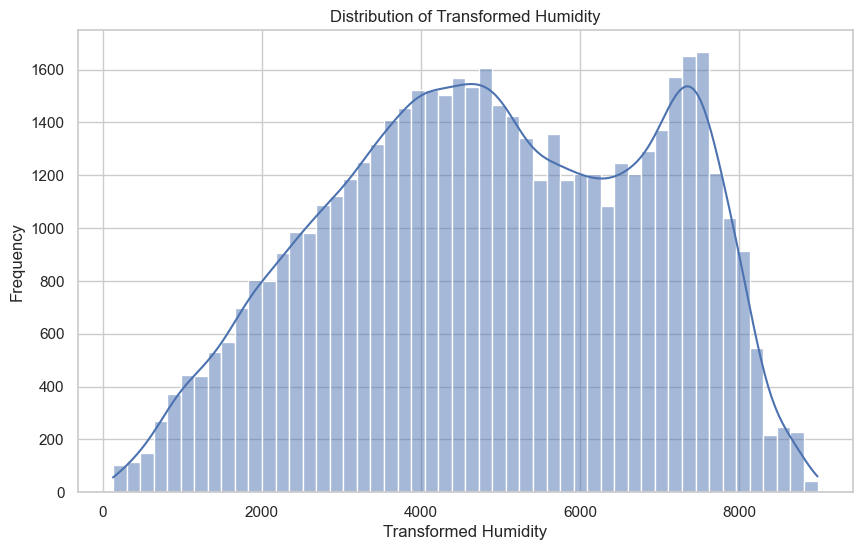

In [40]:
# visualize distribution of transformed humidity
plt.figure(figsize=(10, 6))
sns.histplot(df1['Humidity'], kde=True)
plt.title('Distribution of Transformed Humidity')
plt.xlabel('Transformed Humidity')
plt.ylabel('Frequency')
plt.show()

In [41]:
df1

Temperature  Humidity  Wind Speed  general diffuse flows  \
0            6.559   5446.44       0.083                  0.051   
1            6.414   5550.25       0.083                  0.070   
2            6.313   5550.25       0.080                  0.062   
3            6.121   5625.00       0.083                  0.091   
4            5.921   5730.49       0.081                  0.048   
...            ...       ...         ...                    ...   
52411        7.010   5241.76       0.080                  0.040   
52412        6.947   5270.76       0.082                  0.051   
52413        6.900   5299.84       0.086                  0.084   
52414        6.758   5329.00       0.080                  0.066   
52415        6.580   5490.81       0.081                  0.062   

       diffuse flows  Air Quality Index (PM)  Cloudiness  \
0              0.119                   158.0           1   
1              0.085                   159.0           1   
2              0.100                   151.0           1   
3              0.096                   151.0           1   
4              0.085                   154.0           1   
...              ...                     ...         ...   
52411          0.096                   153.0           0   
52412          0.093                   153.0           0   
52413          0.074                   157.0           0   
52414          0.089                   150.0           0   
52415          0.111                   152.0           0   

       Power Consumption in A Zone  
0                      34055.69620  
1                      29814.68354  
2                      29128.10127  
3                      28228.86076  
4                      27335.69620  
...                            ...  
52411                  31160.45627  
52412                  30430.41825  
52413                  29590.87452  
52414                  28958.17490  
52415                  28349.80989  

[52143 rows x 8 columns]

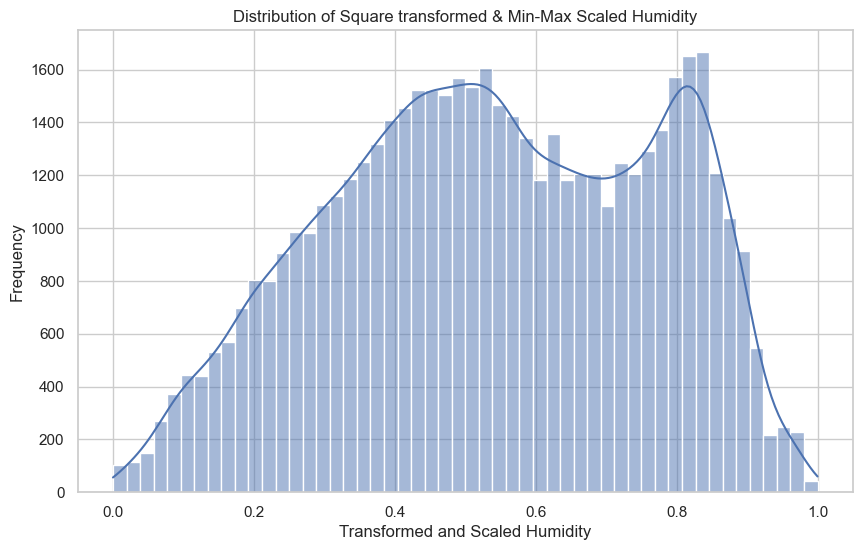

In [42]:
# min_max scaling Humidity_transformed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Humidity_ScTr'] = scaler.fit_transform(df1[['Humidity']])
# visualize distribution of min-max scaled humidity
plt.figure(figsize=(10, 6))
sns.histplot(df1['Humidity_ScTr'], kde=True)
plt.title('Distribution of Square transformed & Min-Max Scaled Humidity')
plt.xlabel('Transformed and Scaled Humidity')
plt.ylabel('Frequency')
plt.show()
df1.drop(columns=['Humidity'], inplace=True)

In [43]:
# check skewness of transformed and scaled humidity
df1['Humidity_ScTr'].skew()
# check threshold for skewness
skew_threshold = 0.5
# If skewness is above the threshold, consider further transformations
if abs(df1['Humidity_ScTr'].skew()) > skew_threshold:
    print("Skewness is above the threshold. Consider further transformations.") 
else:
    print("Skewness is within acceptable limits. No further transformations needed.")
    

Skewness is within acceptable limits. No further transformations needed.

#### Log transformation on General Diffuse and Diffuse flow columns

In [44]:
df1.columns

Index(['Temperature', 'Wind Speed', 'general diffuse flows', 'diffuse flows',
       'Air Quality Index (PM)', 'Cloudiness', 'Power Consumption in A Zone',
       'Humidity_ScTr'],
      dtype='object')

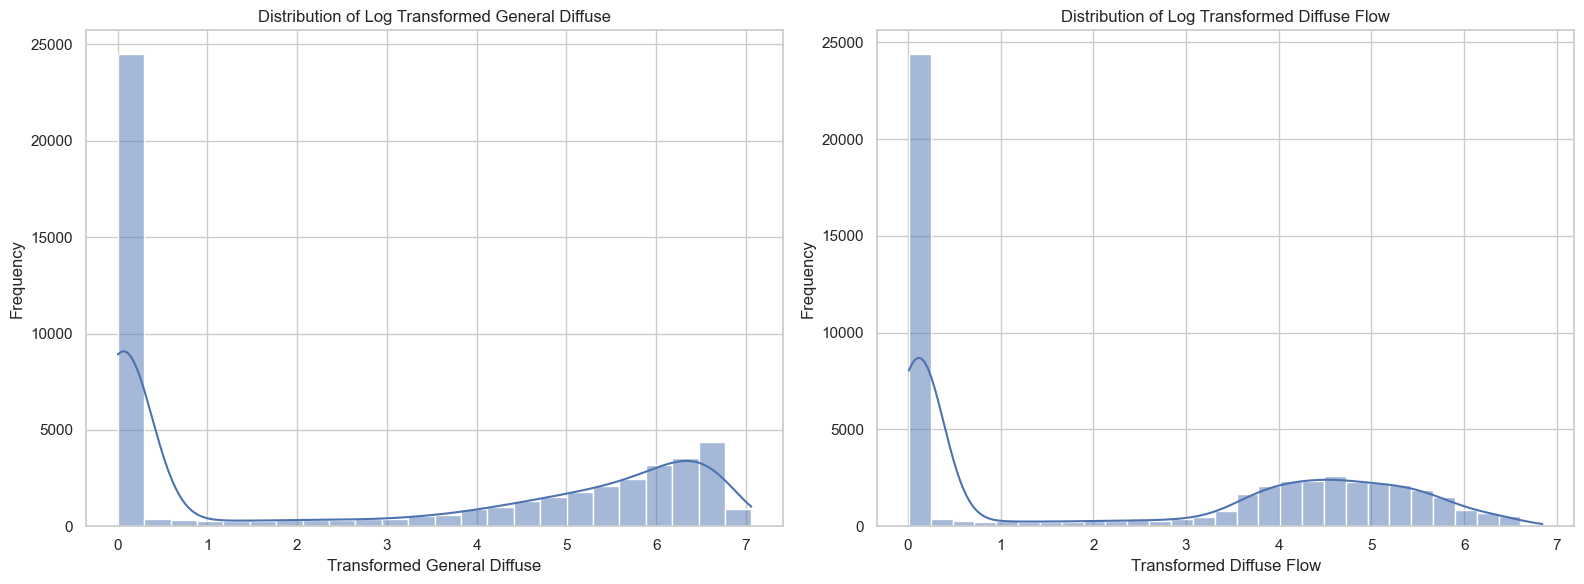

In [45]:
# Log transformation on General Diffuse and Diffuse flow columns
df1['general diffuse flows'] = np.log1p(df1['general diffuse flows'])
df1['diffuse flows'] = np.log1p(df1['diffuse flows'])

# Combined subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df1['general diffuse flows'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Log Transformed General Diffuse')
axes[0].set_xlabel('Transformed General Diffuse')
axes[0].set_ylabel('Frequency')

sns.histplot(df1['diffuse flows'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Log Transformed Diffuse Flow')
axes[1].set_xlabel('Transformed Diffuse Flow')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# rename columns
df1.rename(columns={'general diffuse flows': 'General_Diffuse_Flows_LgTr', 'diffuse flows': 'Diffuse_Flows_LgTr'}, inplace=True)

In [46]:
# Select numerical columns
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Compute metrics
skew_vals = df1[num_cols].apply(skew)
kurt_vals = df1[num_cols].apply(kurtosis)

# Create DataFrame for visualization
stat_df = pd.DataFrame({
    'Feature': num_cols,
    'Skewness': skew_vals.values,
    'Kurtosis': kurt_vals.values
})


In [47]:
# Define threshold-based color maps
def skew_color(val):
    if abs(val) > 1:
        return 'background-color: #e31a1c; color: white'  # high skew → red
    elif abs(val) > 0.5:
        return 'background-color: red; color: white'  # moderate skew → orange
    else:
        return ''  # fairly symmetrical → no highlight

def kurt_color(val):
    if val > 5:
        return 'background-color: #800026; color: white'  # very high kurtosis → dark red
    elif val > 3:
        return 'background-color: #feb24c; color: white'  # leptokurtic → gold
    elif val < 0:
        return 'background-color: green; color: white'  # platykurtic → blue
    else:
        return ''  # near-normal → no highlight

# Apply both gradient and conditional styling
styled_df = (stat_df.style
    # base gradient
    .background_gradient(subset=['Skewness','Kurtosis'], cmap='viridis', axis=0, vmin=None, vmax=None)
    # conditional overrides
    .applymap(skew_color, subset=['Skewness'])
    .applymap(kurt_color, subset=['Kurtosis'])
    .format({'Skewness': "{:.3f}", 'Kurtosis': "{:.3f}"})
    .set_caption("📊 After Transformation Skewness & Kurtosis: Gradient + Threshold Highlights")
    .hide(axis='index')
)

styled_df


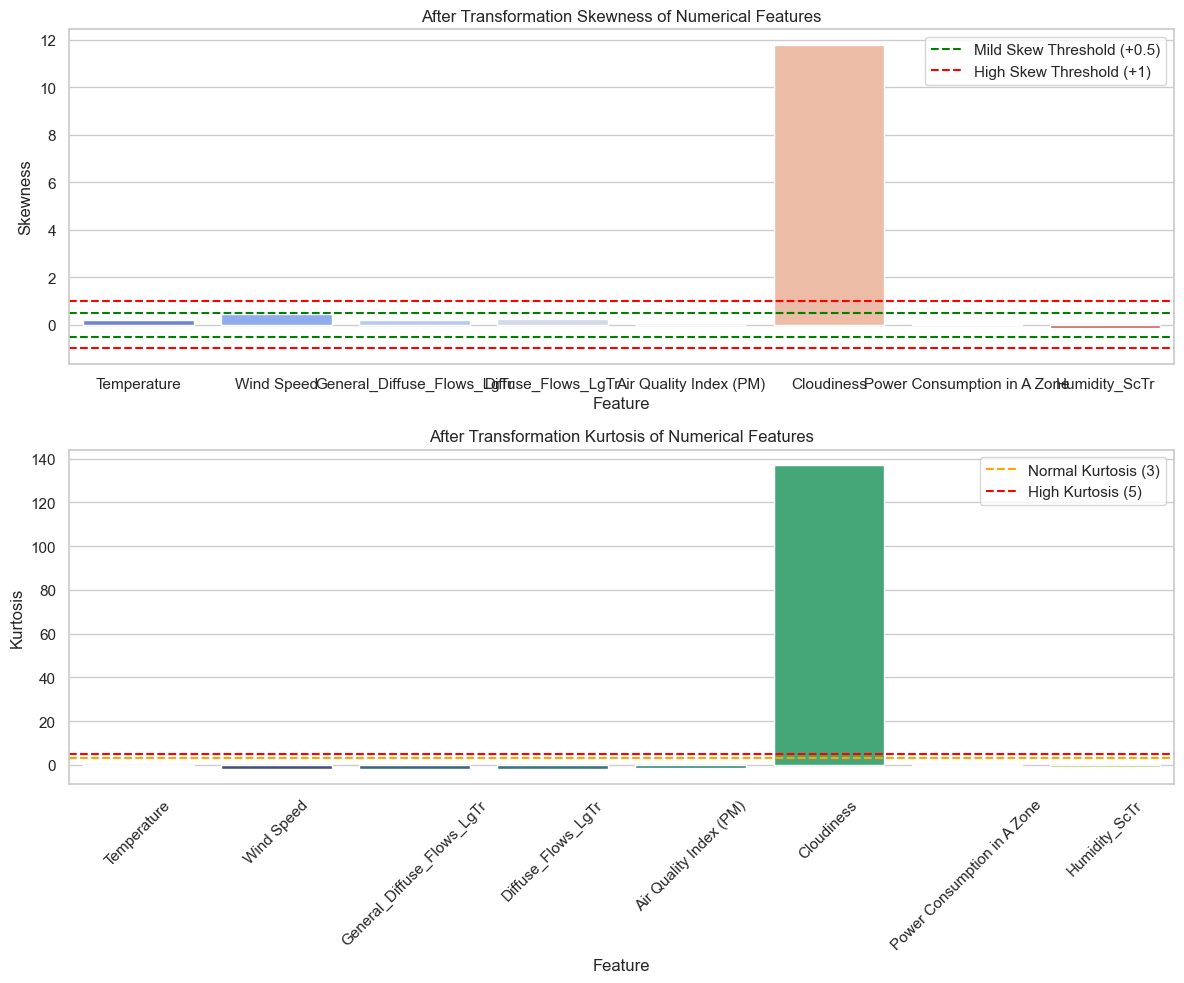

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Skewness Plot
sns.barplot(x='Feature', y='Skewness', data=stat_df, ax=axes[0], palette='coolwarm')
axes[0].axhline(0.5, color='green', linestyle='--', label='Mild Skew Threshold (+0.5)')
axes[0].axhline(-0.5, color='green', linestyle='--')
axes[0].axhline(1, color='red', linestyle='--', label='High Skew Threshold (+1)')
axes[0].axhline(-1, color='red', linestyle='--')
axes[0].set_title("After Transformation Skewness of Numerical Features")
axes[0].legend()

# Kurtosis Plot
sns.barplot(x='Feature', y='Kurtosis', data=stat_df, ax=axes[1], palette='viridis')
axes[1].axhline(3, color='orange', linestyle='--', label='Normal Kurtosis (3)')
axes[1].axhline(5, color='red', linestyle='--', label='High Kurtosis (5)')
axes[1].set_title("After Transformation Kurtosis of Numerical Features")
axes[1].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
# Example: Check skewness and kurtosis for a column
for col_name in df1.columns:
    skew = df1[col_name].skew()
    kurt = df1[col_name].kurtosis()
    print(f"{col_name} Skewness: {skew:.2f}")
    if skew > 0.5:
        print("Right-skewed.")
    elif skew < -0.5:
        print("Left-skewed.")
    else:
        print("Approximately symmetric.")
    print(f"{col_name} Kurtosis: {kurt:.2f}")
    if abs(skew) > 0.5:
        print("Consider applying a transformation to reduce skewness.")
    if kurt > 3:
        print("High kurtosis detected: consider handling outliers or using robust methods.")
    print('---------------------------------------------')

Temperature Skewness: 0.19

Approximately symmetric.

Temperature Kurtosis: -0.30

---------------------------------------------

Wind Speed Skewness: 0.45

Approximately symmetric.

Wind Speed Kurtosis: -1.79

---------------------------------------------

General_Diffuse_Flows_LgTr Skewness: 0.20

Approximately symmetric.

General_Diffuse_Flows_LgTr Kurtosis: -1.77

---------------------------------------------

Diffuse_Flows_LgTr Skewness: 0.22

Approximately symmetric.

Diffuse_Flows_LgTr Kurtosis: -1.69

---------------------------------------------

Air Quality Index (PM) Skewness: -0.00

Approximately symmetric.

Air Quality Index (PM) Kurtosis: -1.22

---------------------------------------------

Cloudiness Skewness: 11.79

Right-skewed.

Cloudiness Kurtosis: 137.10

Consider applying a transformation to reduce skewness.

High kurtosis detected: consider handling outliers or using robust methods.

---------------------------------------------

Power Consumption in A Zone Skewness: 0.03

Approximately symmetric.

Power Consumption in A Zone Kurtosis: -0.54

---------------------------------------------

Humidity_ScTr Skewness: -0.13

Approximately symmetric.

Humidity_ScTr Kurtosis: -0.91

---------------------------------------------

In [50]:
df1

Temperature  Wind Speed  General_Diffuse_Flows_LgTr  \
0            6.559       0.083                    0.049742   
1            6.414       0.083                    0.067659   
2            6.313       0.080                    0.060154   
3            6.121       0.083                    0.087095   
4            5.921       0.081                    0.046884   
...            ...         ...                         ...   
52411        7.010       0.080                    0.039221   
52412        6.947       0.082                    0.049742   
52413        6.900       0.086                    0.080658   
52414        6.758       0.080                    0.063913   
52415        6.580       0.081                    0.060154   

       Diffuse_Flows_LgTr  Air Quality Index (PM)  Cloudiness  \
0                0.112435                   158.0           1   
1                0.081580                   159.0           1   
2                0.095310                   151.0           1   
3                0.091667                   151.0           1   
4                0.081580                   154.0           1   
...                   ...                     ...         ...   
52411            0.091667                   153.0           0   
52412            0.088926                   153.0           0   
52413            0.071390                   157.0           0   
52414            0.085260                   150.0           0   
52415            0.105261                   152.0           0   

       Power Consumption in A Zone  Humidity_ScTr  
0                      34055.69620       0.600314  
1                      29814.68354       0.612032  
2                      29128.10127       0.612032  
3                      28228.86076       0.620471  
4                      27335.69620       0.632379  
...                            ...            ...  
52411                  31160.45627       0.577208  
52412                  30430.41825       0.580482  
52413                  29590.87452       0.583764  
52414                  28958.17490       0.587056  
52415                  28349.80989       0.605322  

[52143 rows x 8 columns]

In [51]:
df1.Cloudiness.value_counts() 

Cloudiness
0    51776
1      367
Name: count, dtype: int64

---
<h2 style="color:#4e342e;background:#efebe9;padding:8px;border-radius:5px;">🧨 𝓗𝓪𝓷𝓭𝓵𝓲𝓷𝓰 𝓞𝓾𝓽𝓵𝓲𝓮𝓻𝓼</h2>


In [52]:
df1

Temperature  Wind Speed  General_Diffuse_Flows_LgTr  \
0            6.559       0.083                    0.049742   
1            6.414       0.083                    0.067659   
2            6.313       0.080                    0.060154   
3            6.121       0.083                    0.087095   
4            5.921       0.081                    0.046884   
...            ...         ...                         ...   
52411        7.010       0.080                    0.039221   
52412        6.947       0.082                    0.049742   
52413        6.900       0.086                    0.080658   
52414        6.758       0.080                    0.063913   
52415        6.580       0.081                    0.060154   

       Diffuse_Flows_LgTr  Air Quality Index (PM)  Cloudiness  \
0                0.112435                   158.0           1   
1                0.081580                   159.0           1   
2                0.095310                   151.0           1   
3                0.091667                   151.0           1   
4                0.081580                   154.0           1   
...                   ...                     ...         ...   
52411            0.091667                   153.0           0   
52412            0.088926                   153.0           0   
52413            0.071390                   157.0           0   
52414            0.085260                   150.0           0   
52415            0.105261                   152.0           0   

       Power Consumption in A Zone  Humidity_ScTr  
0                      34055.69620       0.600314  
1                      29814.68354       0.612032  
2                      29128.10127       0.612032  
3                      28228.86076       0.620471  
4                      27335.69620       0.632379  
...                            ...            ...  
52411                  31160.45627       0.577208  
52412                  30430.41825       0.580482  
52413                  29590.87452       0.583764  
52414                  28958.17490       0.587056  
52415                  28349.80989       0.605322  

[52143 rows x 8 columns]

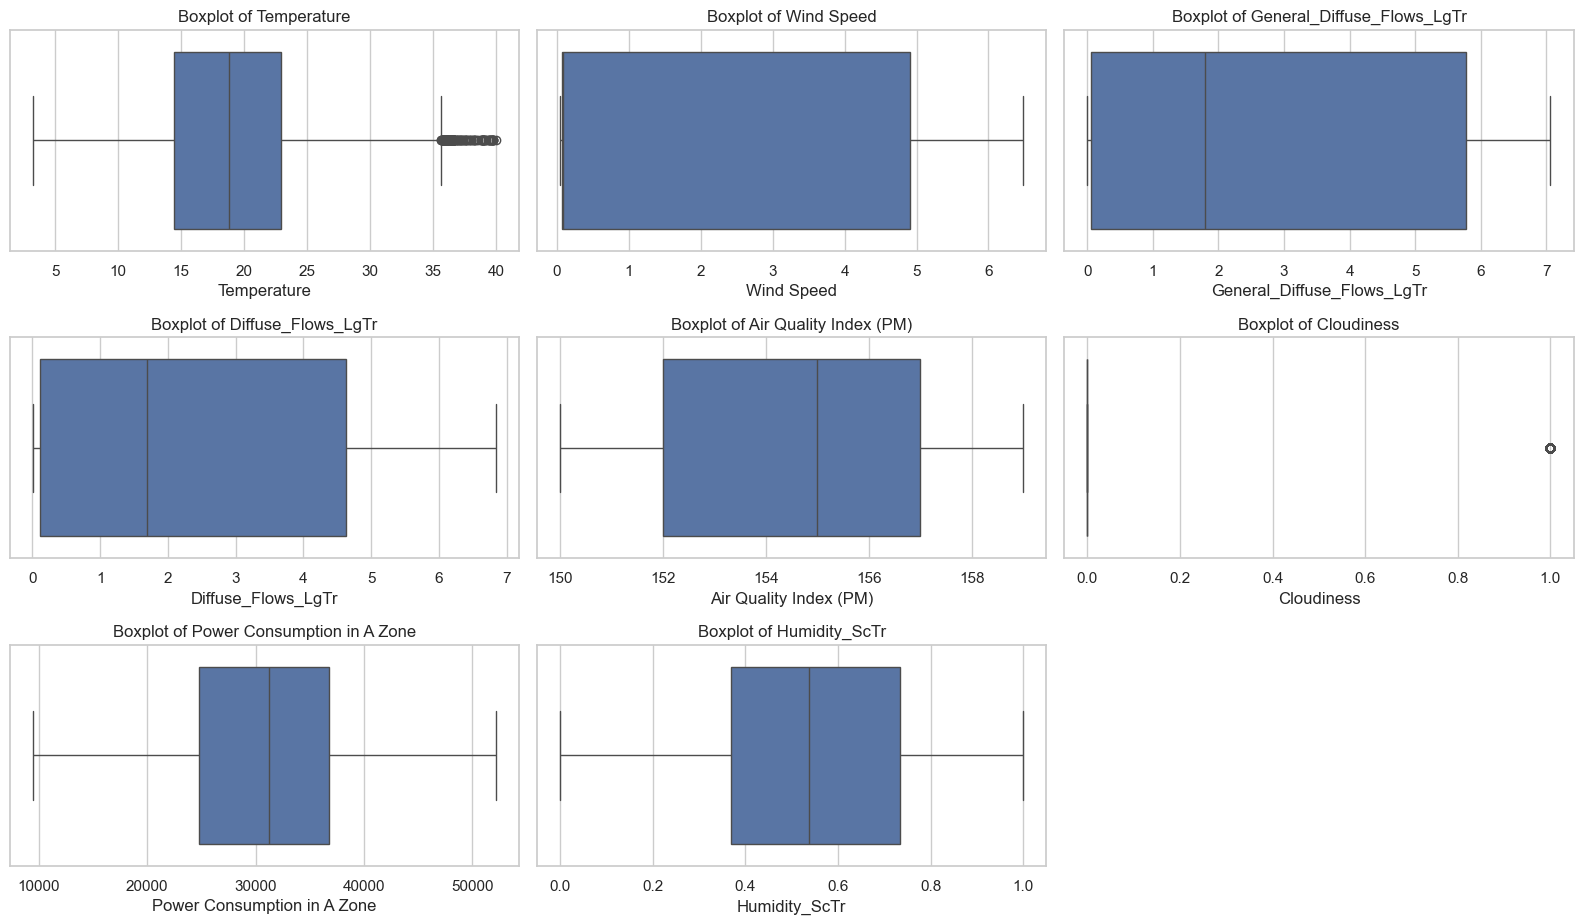

In [53]:
# checking outliers in all columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(df1.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()  

In [54]:
df1.Temperature.describe()

count    52143.000000
mean        18.841426
std          5.810140
min          3.247000
25%         14.430000
50%         18.840000
75%         22.920000
max         40.010000
Name: Temperature, dtype: float64

In [55]:
# check for outliers in Temperature column using iqr method
Q1 = df1['Temperature'].quantile(0.25)
Q3 = df1['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df1[(df1['Temperature'] < lower_bound) | (df1['Temperature'] > upper_bound)]
# Display outliers
print("Outliers in Temperature column:")
print(outliers[['Temperature']])


Outliers in Temperature column:

Temperature
27000        35.78
27001        36.21
27002        36.37
27003        36.69
27004        36.59
...            ...
31909        35.89
31910        35.81
32056        35.94
32057        35.89
32058        35.66

[140 rows x 1 columns]

In [56]:
str(np.round(140/52150*100,2))+' %'

'0.27 %'

In [57]:
# check percentage of outliers in Temperature column
outlier_percentage = len(outliers) / len(df1) * 100
print(f"Percentage of outliers in Temperature column: {outlier_percentage:.2f}%")


Percentage of outliers in Temperature column: 0.27%

In [58]:
len(outliers)

140

In [59]:
# clipping oultiers in Temperature column
df1['Temperature'] = np.clip(df1['Temperature'], lower_bound, upper_bound)

In [60]:
df1.Temperature.describe()

count    52143.000000
mean        18.837664
std          5.798400
min          3.247000
25%         14.430000
50%         18.840000
75%         22.920000
max         35.655000
Name: Temperature, dtype: float64

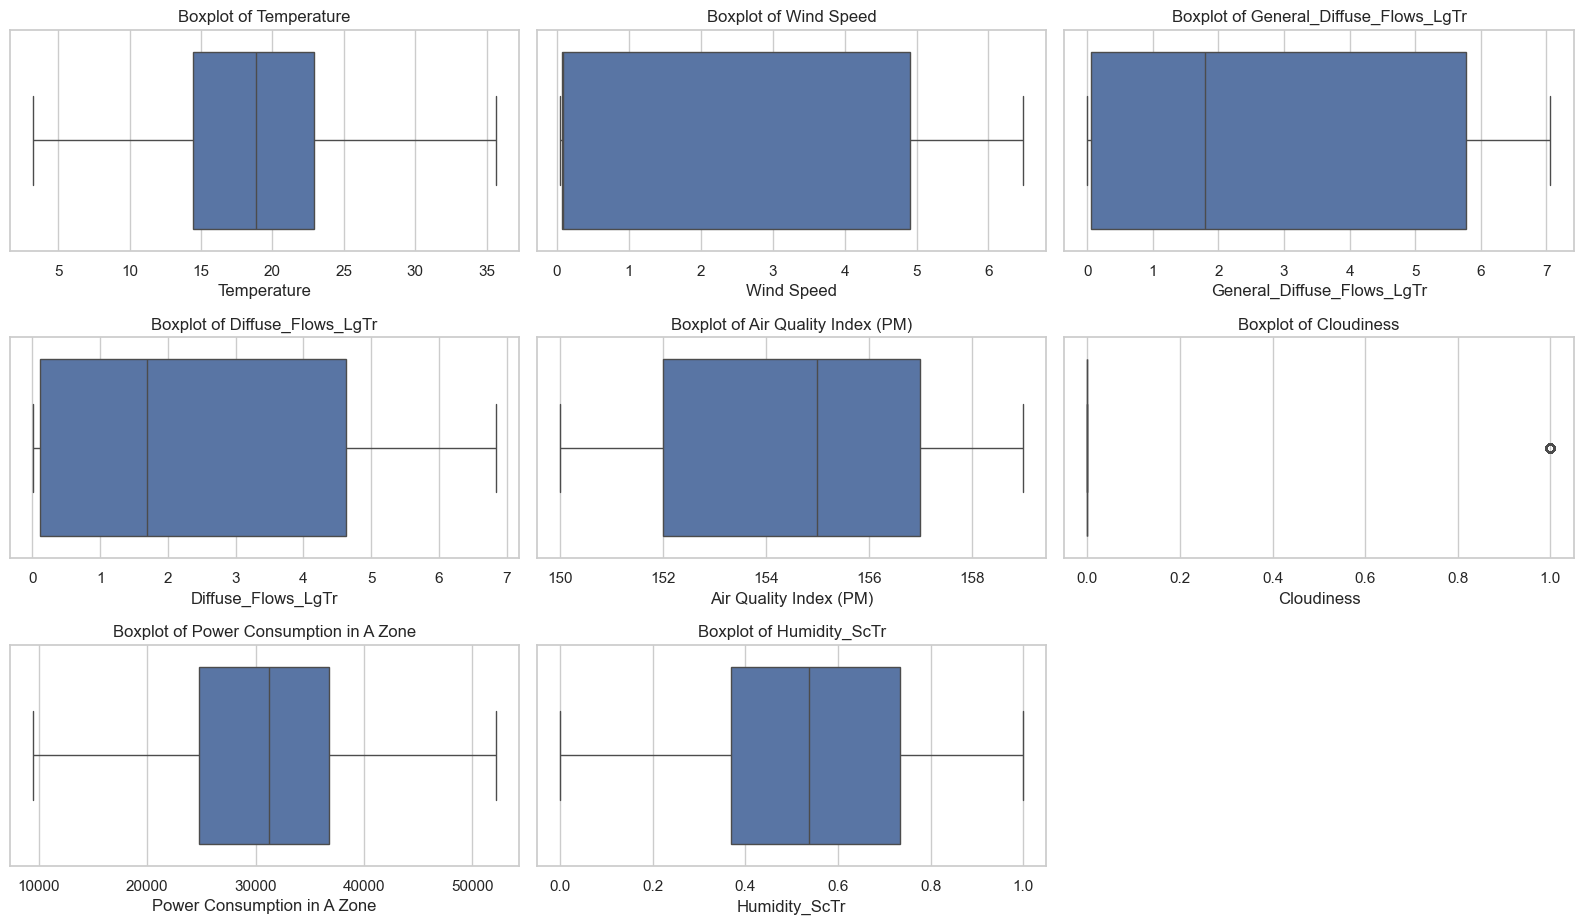

In [61]:
# checking outliers in all columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(df1.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()  

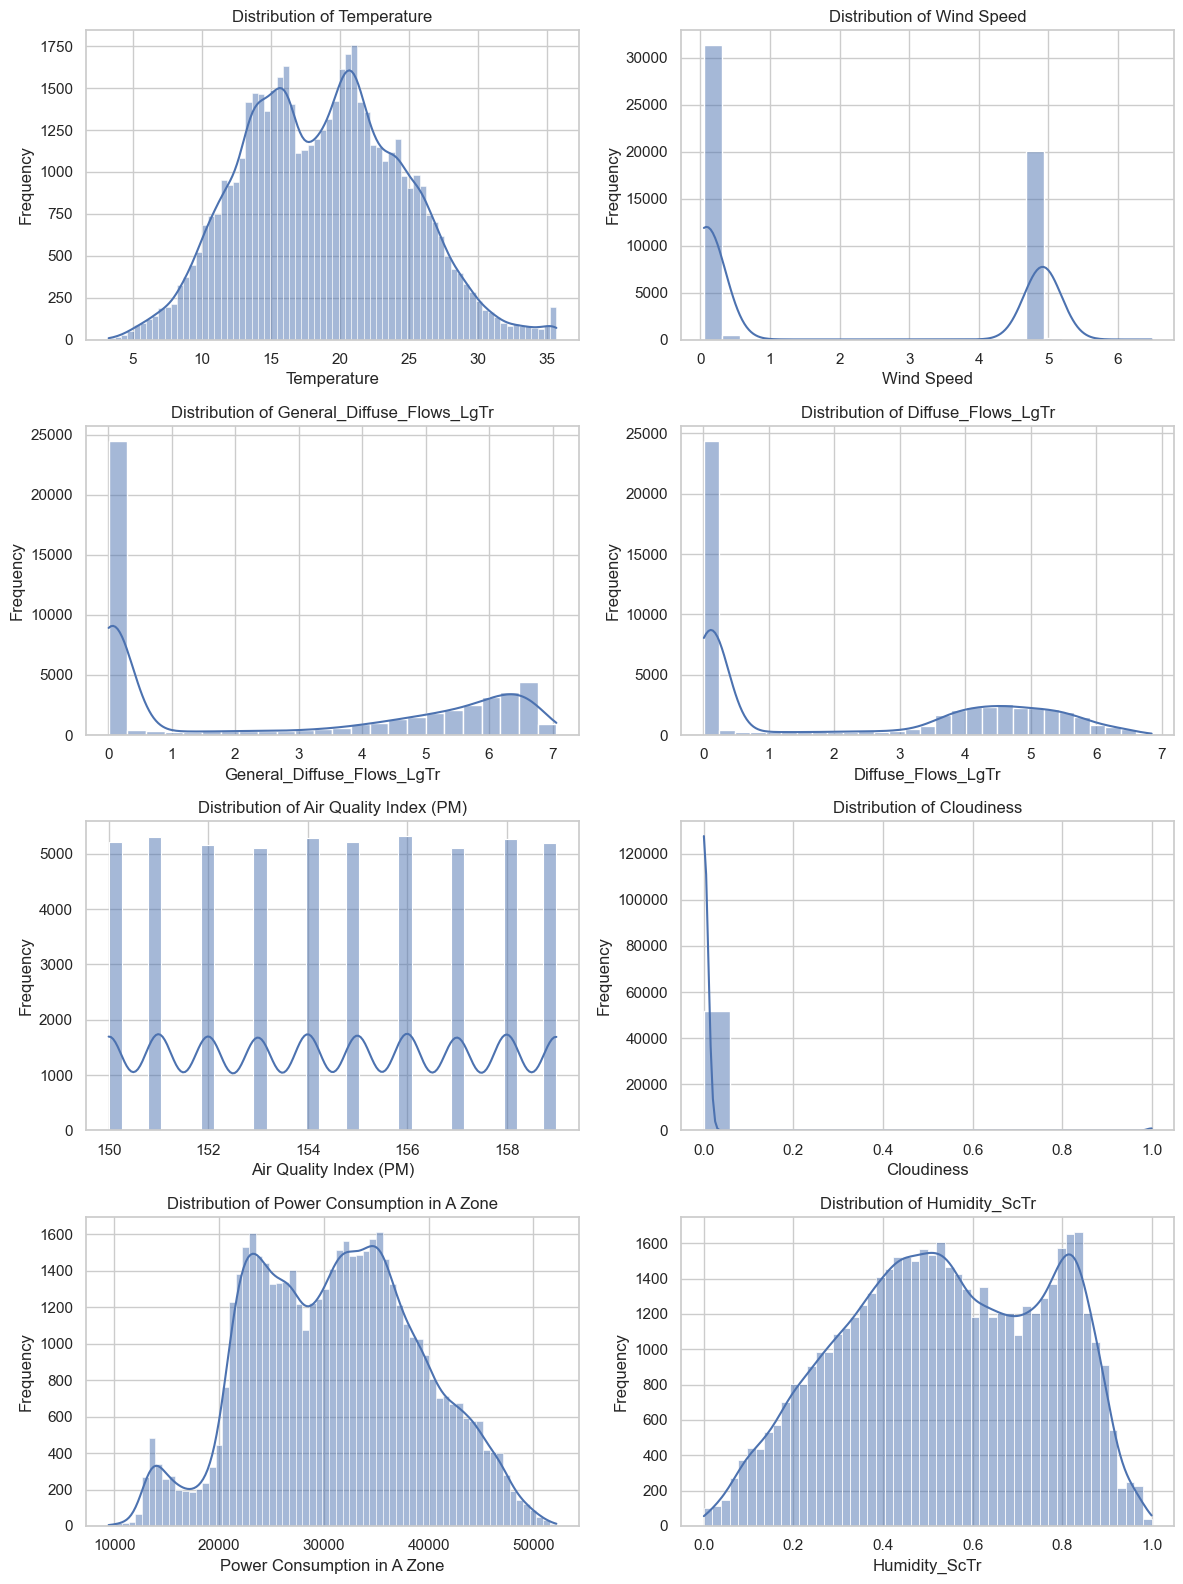

In [62]:
# Distribution plots for all numeric columns in a 2-column grid
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(12, 4 * n_rows))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

---
<h2 style="color:#bf360c;background:#fbe9e7;padding:8px;border-radius:5px;">🤖 Regression 𝓜𝓸𝓭𝓮𝓵 𝓣𝓻𝓪𝓲𝓷𝓲𝓷𝓰</h2>

## Regression Model Training- Predicting Load Consumption

In [63]:
df1

Temperature  Wind Speed  General_Diffuse_Flows_LgTr  \
0            6.559       0.083                    0.049742   
1            6.414       0.083                    0.067659   
2            6.313       0.080                    0.060154   
3            6.121       0.083                    0.087095   
4            5.921       0.081                    0.046884   
...            ...         ...                         ...   
52411        7.010       0.080                    0.039221   
52412        6.947       0.082                    0.049742   
52413        6.900       0.086                    0.080658   
52414        6.758       0.080                    0.063913   
52415        6.580       0.081                    0.060154   

       Diffuse_Flows_LgTr  Air Quality Index (PM)  Cloudiness  \
0                0.112435                   158.0           1   
1                0.081580                   159.0           1   
2                0.095310                   151.0           1   
3                0.091667                   151.0           1   
4                0.081580                   154.0           1   
...                   ...                     ...         ...   
52411            0.091667                   153.0           0   
52412            0.088926                   153.0           0   
52413            0.071390                   157.0           0   
52414            0.085260                   150.0           0   
52415            0.105261                   152.0           0   

       Power Consumption in A Zone  Humidity_ScTr  
0                      34055.69620       0.600314  
1                      29814.68354       0.612032  
2                      29128.10127       0.612032  
3                      28228.86076       0.620471  
4                      27335.69620       0.632379  
...                            ...            ...  
52411                  31160.45627       0.577208  
52412                  30430.41825       0.580482  
52413                  29590.87452       0.583764  
52414                  28958.17490       0.587056  
52415                  28349.80989       0.605322  

[52143 rows x 8 columns]

In [64]:
df1.describe()

Temperature    Wind Speed  General_Diffuse_Flows_LgTr  \
count  52143.000000  52143.000000                52143.000000   
mean      18.837664      1.968506                    2.779748   
std        5.798400      2.350854                    2.792779   
min        3.247000      0.050000                    0.003992   
25%       14.430000      0.078000                    0.060154   
50%       18.840000      0.086000                    1.791426   
75%       22.920000      4.915000                    5.770350   
max       35.655000      6.483000                    7.059618   

       Diffuse_Flows_LgTr  Air Quality Index (PM)    Cloudiness  \
count        52143.000000            52143.000000  52143.000000   
mean             2.384517              154.499568      0.007038   
std              2.329481                2.872095      0.083600   
min              0.010940              150.000000      0.000000   
25%              0.115113              152.000000      0.000000   
50%              1.688803              155.000000      0.000000   
75%              4.627910              157.000000      0.000000   
max              6.842683              159.000000      1.000000   

       Power Consumption in A Zone  Humidity_ScTr  
count                 52143.000000   52143.000000  
mean                  31112.707495       0.538500  
std                    8007.743843       0.225308  
min                    9457.750760       0.000000  
25%                   24804.658690       0.368778  
50%                   31236.196720       0.536260  
75%                   36763.076920       0.733466  
max                   52204.395120       1.000000

In [65]:
#!pip install xgboost

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor


In [67]:
# Prepare features and target
X = df1.drop(columns=['Power Consumption in A Zone'])
y = df1['Power Consumption in A Zone']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


In [68]:

# Models to evaluate
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
}

# adj R2
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    for split, X_, y_ in [('Train', X_train, y_train), ('Test', X_test, y_test)]:
        y_pred = model.predict(X_)
        mse = mean_squared_error(y_, y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_, y_pred)
        r2 = r2_score(y_, y_pred)
        adj_r2 = adjusted_r2(r2, len(y_), X_.shape[1])
        results.append({
            'Model': name,
            'Split': split,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape*100,
            'R2': r2,
            'Adj_R2': adj_r2
        })

# Print results
results_df = pd.DataFrame(results)


In [69]:
results_df.T

0                 1                2                3   \
Model   LinearRegression  LinearRegression            Ridge            Ridge   
Split              Train              Test            Train             Test   
MSE       43327364.13259   43504154.684038  43327366.456187  43503870.008757   
RMSE         6582.352477       6595.767937      6582.352654      6595.746357   
MAPE           18.788025         18.737917        18.788115        18.737862   
R2               0.32374          0.323761          0.32374         0.323765   
Adj_R2          0.323627          0.323307         0.323627         0.323311   

                     4                5              6                7   \
Model             Lasso            Lasso   RandomForest     RandomForest   
Split             Train             Test          Train             Test   
MSE     43327537.898327  43501495.920653  3351217.32985  23464302.534388   
RMSE        6582.365676      6595.566384    1830.633041      4843.996546   
MAPE          18.789168        18.737774       4.474049        11.889774   
R2             0.323738         0.323802       0.947694         0.635265   
Adj_R2         0.323624         0.323348       0.947685          0.63502   

                      8                 9                10               11  
Model   GradientBoosting  GradientBoosting     XGBRegressor     XGBRegressor  
Split              Train              Test            Train             Test  
MSE      35883212.722448   36504602.124199  21618380.455116  28450932.065268  
RMSE         5990.259821       6041.903849      4649.557017      5333.941513  
MAPE            16.71641         16.828095        12.142624        13.958179  
R2               0.43993          0.432564         0.662577         0.557752  
Adj_R2          0.439836          0.432182         0.662521         0.557455

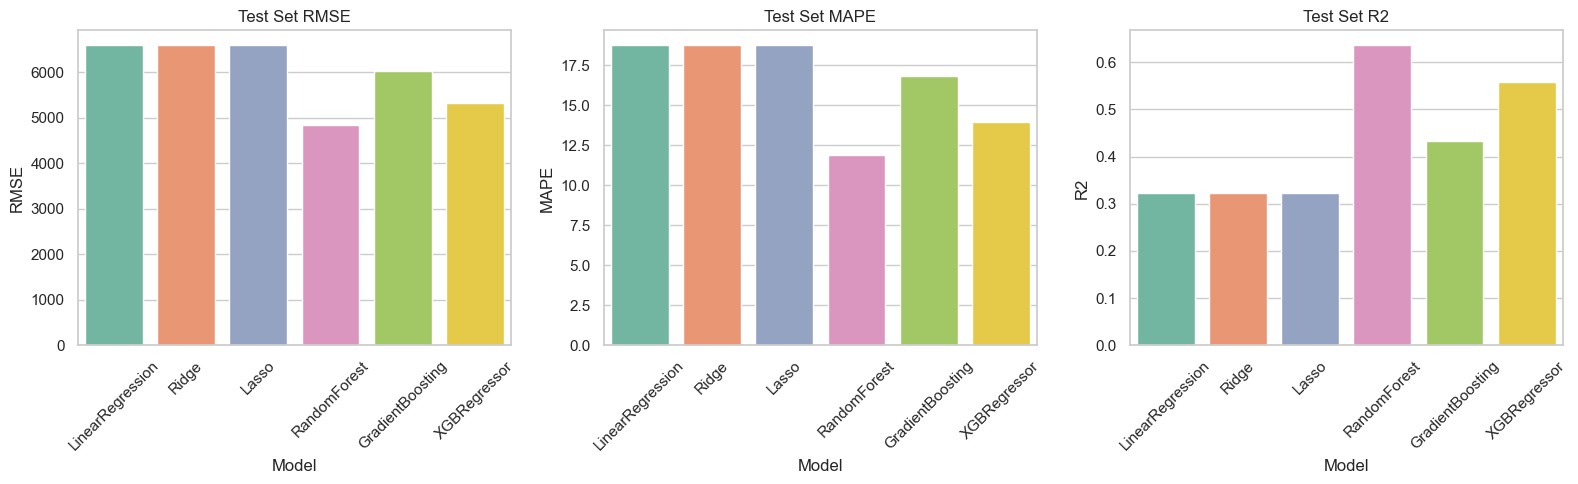

In [70]:
metrics_to_plot = ['RMSE', 'MAPE', 'R2']
test_plot_df = results_df[results_df['Split'] == 'Test'][['Model'] + metrics_to_plot]

fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(16, 5))
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(data=test_plot_df, x='Model', y=metric, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Test Set {metric}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


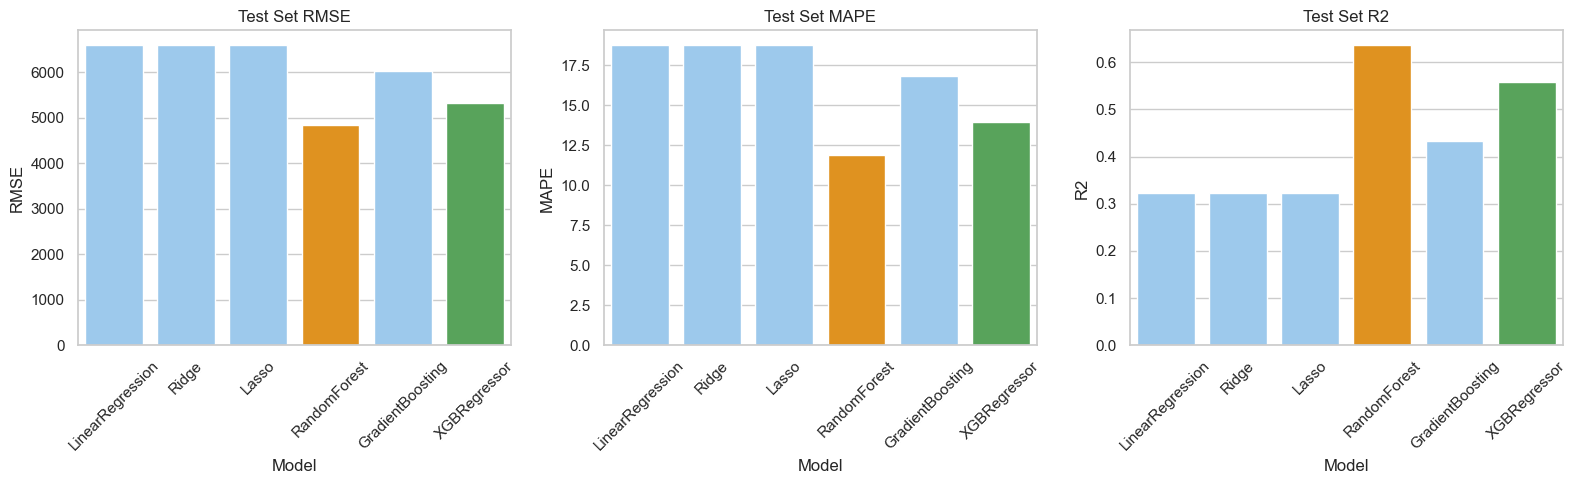

In [71]:
# Define custom colors for highlighting
highlight_colors = {
    'RandomForest': '#ff9800',      # orange
    'XGBRegressor': '#4caf50',      # green
}

# Assign colors to each model
test_plot_df['Color'] = test_plot_df['Model'].map(lambda x: highlight_colors.get(x, '#90caf9'))  # default blue

fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(16, 5))
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(
        data=test_plot_df,
        x='Model',
        y=metric,
        ax=axes[i],
        palette=list(test_plot_df['Color'])
    )
    axes[i].set_title(f'Test Set {metric}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


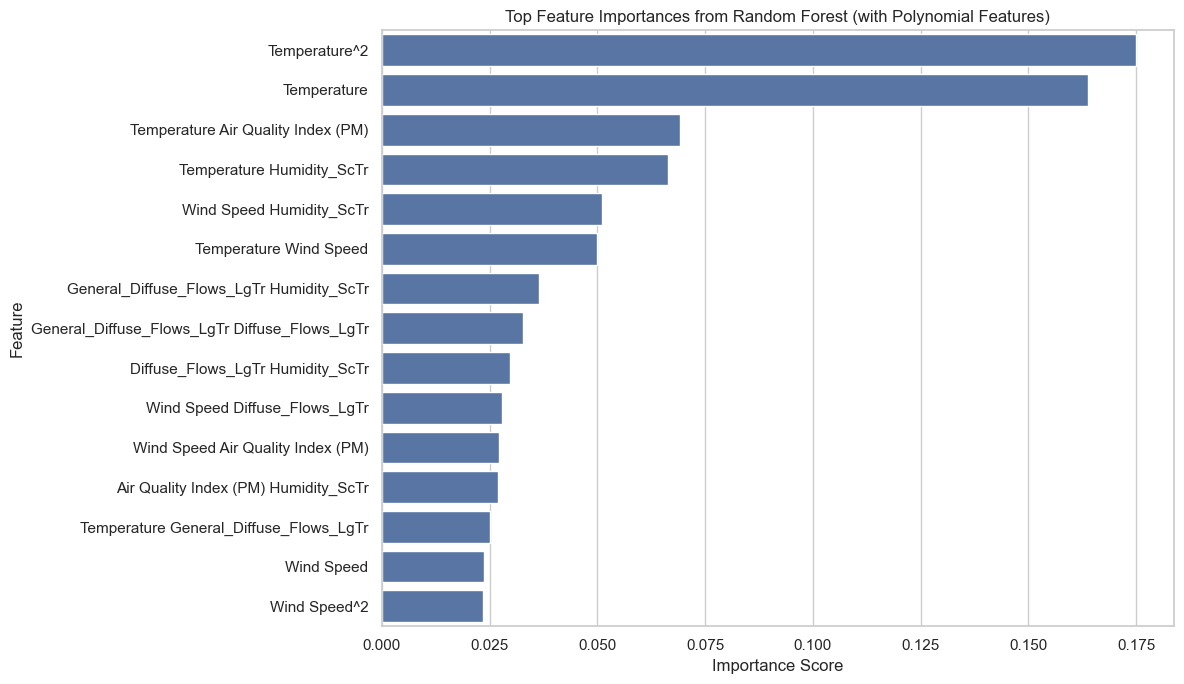

Top features selected:
[
    'Temperature^2',
    'Temperature',
    'Temperature Air Quality Index (PM)',
    'Temperature Humidity_ScTr',
    'Wind Speed Humidity_ScTr'
]

In [72]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2, interaction only for simplicity)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, index=X.index, columns=poly.get_feature_names_out(X.columns))

# 2. Feature Importance using Random Forest on new features
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_poly_df.loc[X_train.index], y_train)
importances = rf.feature_importances_
feature_names = X_poly_df.columns

# Display feature importances
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index)
plt.title('Top Feature Importances from Random Forest (with Polynomial Features)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 3. Select top features (e.g., top 5)
top_features = feat_imp.head(5).index.tolist()
print("Top features selected:", top_features)

In [73]:
X_poly_df

Temperature  Wind Speed  General_Diffuse_Flows_LgTr  \
0            6.559       0.083                    0.049742   
1            6.414       0.083                    0.067659   
2            6.313       0.080                    0.060154   
3            6.121       0.083                    0.087095   
4            5.921       0.081                    0.046884   
...            ...         ...                         ...   
52411        7.010       0.080                    0.039221   
52412        6.947       0.082                    0.049742   
52413        6.900       0.086                    0.080658   
52414        6.758       0.080                    0.063913   
52415        6.580       0.081                    0.060154   

       Diffuse_Flows_LgTr  Air Quality Index (PM)  Cloudiness  Humidity_ScTr  \
0                0.112435                   158.0         1.0       0.600314   
1                0.081580                   159.0         1.0       0.612032   
2                0.095310                   151.0         1.0       0.612032   
3                0.091667                   151.0         1.0       0.620471   
4                0.081580                   154.0         1.0       0.632379   
...                   ...                     ...         ...            ...   
52411            0.091667                   153.0         0.0       0.577208   
52412            0.088926                   153.0         0.0       0.580482   
52413            0.071390                   157.0         0.0       0.583764   
52414            0.085260                   150.0         0.0       0.587056   
52415            0.105261                   152.0         0.0       0.605322   

       Temperature^2  Temperature Wind Speed  \
0          43.020481                0.544397   
1          41.139396                0.532362   
2          39.853969                0.505040   
3          37.466641                0.508043   
4          35.058241                0.479601   
...              ...                     ...   
52411      49.140100                0.560800   
52412      48.260809                0.569654   
52413      47.610000                0.593400   
52414      45.670564                0.540640   
52415      43.296400                0.532980   

       Temperature General_Diffuse_Flows_LgTr  ...  Diffuse_Flows_LgTr^2  \
0                                    0.326258  ...              0.012642   
1                                    0.433963  ...              0.006655   
2                                    0.379752  ...              0.009084   
3                                    0.533107  ...              0.008403   
4                                    0.277598  ...              0.006655   
...                                       ...  ...                   ...   
52411                                0.274937  ...              0.008403   
52412                                0.345558  ...              0.007908   
52413                                0.556540  ...              0.005097   
52414                                0.431926  ...              0.007269   
52415                                0.395813  ...              0.011080   

       Diffuse_Flows_LgTr Air Quality Index (PM)  \
0                                      17.764798   
1                                      12.971218   
2                                      14.391837   
3                                      13.841745   
4                                      12.563318   
...                                          ...   
52411                                  14.025080   
52412                                  13.605710   
52413                                  11.208229   
52414                                  12.788977   
52415                                  15.999598   

       Diffuse_Flows_LgTr Cloudiness  Diffuse_Flows_LgTr Humidity_ScTr  \
0                           0.112435                          0.067497   
1                           0.081580  

In [74]:
# Create polynomial feature sets for train and test splits
X_poly_train = X_poly_df.loc[X_train.index]
X_poly_test = X_poly_df.loc[X_test.index]

In [75]:
X_poly_train

Temperature  Wind Speed  General_Diffuse_Flows_LgTr  \
33585       23.380       4.920                    0.090754   
18347       20.590       0.080                    6.473582   
27981       23.890       4.912                    4.064744   
3651         6.236       0.087                    2.270062   
18607       15.640       4.914                    0.057325   
...            ...         ...                         ...   
11539       10.290       0.079                    0.080658   
44993       20.070       0.073                    5.376204   
38413       23.290       4.923                    4.693181   
1058        12.400       0.085                    1.172172   
16050       16.930       0.070                    5.781361   

       Diffuse_Flows_LgTr  Air Quality Index (PM)  Cloudiness  Humidity_ScTr  \
33585            0.091667                   150.0         0.0       0.355864   
18347            6.442222                   154.0         0.0       0.487252   
27981            3.809326                   151.0         0.0       0.737146   
3651             2.252344                   153.0         0.0       0.763159   
18607            0.112435                   157.0         0.0       0.901898   
...                   ...                     ...         ...            ...   
11539            0.141500                   151.0         0.0       0.879658   
44993            5.268373                   153.0         0.0       0.654788   
38413            4.731803                   155.0         0.0       0.509930   
1058             1.168760                   155.0         0.0       0.532010   
16050            5.609105                   151.0         0.0       0.729795   

       Temperature^2  Temperature Wind Speed  \
33585     546.624400              115.029600   
18347     423.948100                1.647200   
27981     570.732100              117.347680   
3651       38.887696                0.542532   
18607     244.609600               76.854960   
...              ...                     ...   
11539     105.884100                0.812910   
44993     402.804900                1.465110   
38413     542.424100              114.656670   
1058      153.760000                1.054000   
16050     286.624900                1.185100   

       Temperature General_Diffuse_Flows_LgTr  ...  Diffuse_Flows_LgTr^2  \
33585                                2.121837  ...              0.008403   
18347                              133.291054  ...             41.502220   
27981                               97.106736  ...             14.510962   
3651                                14.156106  ...              5.073053   
18607                                0.896564  ...              0.012642   
...                                       ...  ...                   ...   
11539                                0.829970  ...              0.020022   
44993                              107.900412  ...             27.755759   
38413                              109.304187  ...             22.389958   
1058                                14.534939  ...              1.366000   
16050                               97.878435  ...             31.462064   

       Diffuse_Flows_LgTr Air Quality Index (PM)  \
33585                                  13.750078   
18347                                 992.102133   
27981                                 575.208167   
3651                                  344.608613   
18607                                  17.652362   
...                                          ...   
11539                                  21.366434   
44993                                 806.061144   
38413                                 733.429440   
1058                                  181.157808   
16050                                 846.974920   

       Diffuse_Flows_LgTr Cloudiness  Diffuse_Flows_LgTr Humidity_ScTr  \
33585                            0.0                          0.032621   
18347                            0.0  

In [76]:
# 4. Train a regression model (e.g., XGBoost) using only the top polynomial features

# Select top features for train and test sets
X_poly_train_top = X_poly_train[top_features]
X_poly_test_top = X_poly_test[top_features]

# Train XGBoost regressor on top features
xgb_poly = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
xgb_poly.fit(X_poly_train, y_train)

# Predict on train and test sets
y_train_pred_poly = xgb_poly.predict(X_poly_train)
y_test_pred_poly = xgb_poly.predict(X_poly_test)

# Evaluate performance
def print_metrics(y_true, y_pred, split):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_poly_train.shape[1] - 1)
    print(f"{split} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.3f}, R2: {r2:.3f}, Adj_R2: {adj_r2:.3f}")

print_metrics(y_train, y_train_pred_poly, "Train")
print_metrics(y_test, y_test_pred_poly, "Test")

Train - MSE: 19783170.39, RMSE: 4447.83, MAPE: 0.116, R2: 0.691, Adj_R2: 0.691

Test - MSE: 28563451.40, RMSE: 5344.48, MAPE: 0.139, R2: 0.556, Adj_R2: 0.555

In [77]:
from sklearn.decomposition import PCA

# Apply PCA to all polynomial features (not just top features)
pca = PCA()
X_poly_train_pca = pca.fit_transform(X_poly_train)
X_poly_test_pca = pca.transform(X_poly_test)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio (first 5 components):", explained_variance[:5])
print("Total explained variance:", explained_variance.sum())

Explained variance ratio (first 5 components): [0.45793348 0.36844692 0.12355408 0.04607145 0.00245157]

Total explained variance: 1.0

In [78]:
from sklearn.decomposition import PCA

# Apply PCA to all polynomial features (not just top features)
pca = PCA()
X_poly_train_pca = pca.fit_transform(X_poly_train)
X_poly_test_pca = pca.transform(X_poly_test)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio (first 5 components):", explained_variance[:5])
print("Total explained variance:", explained_variance.sum())

Explained variance ratio (first 5 components): [0.45793348 0.36844692 0.12355408 0.04607145 0.00245157]

Total explained variance: 1.0

In [79]:
# Train RandomForest and XGBoost on PCA-transformed polynomial features

# Random Forest
rf_pca = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_pca.fit(X_poly_train_pca, y_train)
y_train_pred_rf_pca = rf_pca.predict(X_poly_train_pca)
y_test_pred_rf_pca = rf_pca.predict(X_poly_test_pca)

# XGBoost
xgb_pca = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
xgb_pca.fit(X_poly_train_pca, y_train)
y_train_pred_xgb_pca = xgb_pca.predict(X_poly_train_pca)
y_test_pred_xgb_pca = xgb_pca.predict(X_poly_test_pca)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def print_metrics(y_true, y_pred, split, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_poly_train_pca.shape[1] - 1)
    print(f"{model_name} {split} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.3f}, R2: {r2:.3f}, Adj_R2: {adj_r2:.3f}")

# Random Forest PCA
print_metrics(y_train, y_train_pred_rf_pca, "Train", "RandomForest_PCA")
print_metrics(y_test, y_test_pred_rf_pca, "Test", "RandomForest_PCA")

# XGBoost PCA
print_metrics(y_train, y_train_pred_xgb_pca, "Train", "XGBoost_PCA")
print_metrics(y_test, y_test_pred_xgb_pca, "Test", "XGBoost_PCA")

RandomForest_PCA Train - MSE: 4186635.52, RMSE: 2046.13, MAPE: 0.052, R2: 0.935, Adj_R2: 0.935

RandomForest_PCA Test - MSE: 29646338.14, RMSE: 5444.85, MAPE: 0.140, R2: 0.539, Adj_R2: 0.538

XGBoost_PCA Train - MSE: 20065113.24, RMSE: 4479.41, MAPE: 0.118, R2: 0.687, Adj_R2: 0.687

XGBoost_PCA Test - MSE: 32062295.63, RMSE: 5662.36, MAPE: 0.150, R2: 0.502, Adj_R2: 0.500

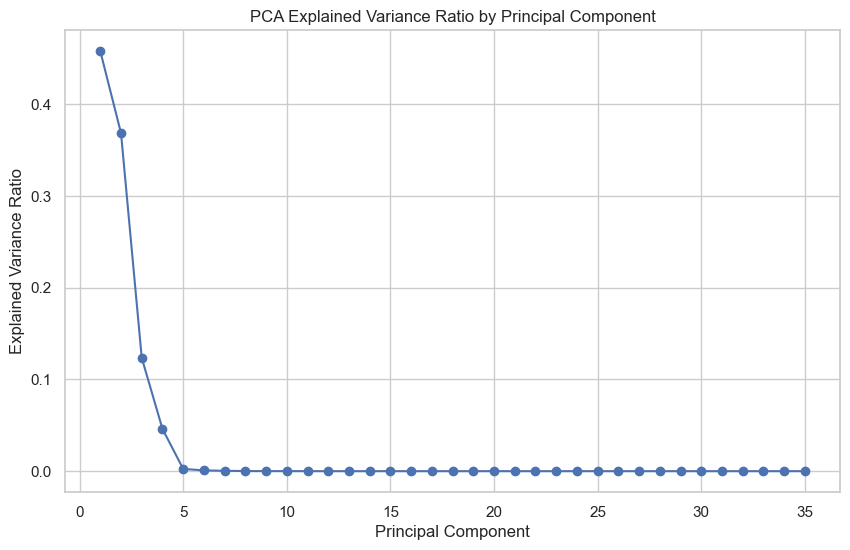

In [81]:
# Visualize PCA explained variance ratio as a line chart
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('PCA Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

XGBoost_PCA Train (PCA) - MSE: 20065113.24, RMSE: 4479.41, MAPE: 0.118, R2: 0.687, Adj_R2: 0.687

XGBoost_PCA Test (PCA) - MSE: 32062295.63, RMSE: 5662.36, MAPE: 0.150, R2: 0.502, Adj_R2: 0.500

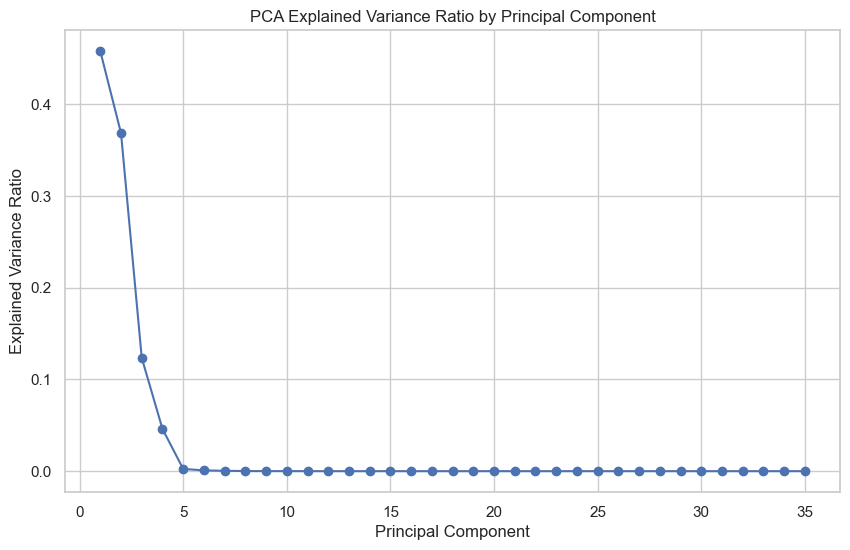

In [82]:
# Train XGBoost regressor on PCA features
xgb_pca = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
xgb_pca.fit(X_poly_train_pca, y_train)
# Predict on train and test sets
y_train_pred_pca = xgb_pca.predict(X_poly_train_pca)
y_test_pred_pca = xgb_pca.predict(X_poly_test_pca)
# Evaluate performance
print_metrics(y_train, y_train_pred_pca, "Train (PCA)", "XGBoost_PCA")
print_metrics(y_test, y_test_pred_pca, "Test (PCA)", "XGBoost_PCA")
# Visualize PCA explained variance ratio as a line chart
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('PCA Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

---
END
 
---

* Addons
1. Check Distribution of Temperature and Humidity w.r.t. above and below Power consumption mean
2. Multicolor vizuals
3. Time series Analysis and Forecasting

---

# Basic model with temp and humidity

In [83]:
df1.columns

Index(['Temperature', 'Wind Speed', 'General_Diffuse_Flows_LgTr',
       'Diffuse_Flows_LgTr', 'Air Quality Index (PM)', 'Cloudiness',
       'Power Consumption in A Zone', 'Humidity_ScTr'],
      dtype='object')

In [84]:
# split data into train and test sets
X=df1[['Temperature', 'Humidity_ScTr', 'Wind Speed', 'General_Diffuse_Flows_LgTr','Cloudiness']]
y = df1['Power Consumption in A Zone']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split test data into val1 and val2
X_val1, X_val2, y_val1, y_val2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Scaling independent features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val1 = scaler.transform(X_val1)
X_val2 = scaler.transform(X_val2)



In [85]:
# models to evaluate
# import decission tree, random forest, gradient boosting, xgboost, linear regression, ridge, lasso, knn

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor   
# Models to evaluate
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecissionTree': DecisionTreeRegressor(random_state=42),
    'KNeighbors': KNeighborsRegressor(n_jobs=-1),
    'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
}
# Evaluate models on train, val1, and val2 sets
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    for split, X_, y_ in [('Train', X_train, y_train), ('Val1', X_val1, y_val1), ('Val2', X_val2, y_val2)]:
        y_pred = model.predict(X_)
        mse = mean_squared_error(y_, y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_, y_pred)
        r2 = r2_score(y_, y_pred)
        adj_r2 = adjusted_r2(r2, len(y_), X_.shape[1])
        results.append({
            'Model': name,
            'Split': split,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape*100,
            'R2': r2,
            'Adj_R2': adj_r2
        })

# Print results
results_basic_df = pd.DataFrame(results)


In [86]:

results_basic_df.T



0                 1                 2               3   \
Model   LinearRegression  LinearRegression  LinearRegression           Ridge   
Split              Train              Val1              Val2           Train   
MSE      43335023.249091   42977444.767741   44032659.156624  43335023.27794   
RMSE         6582.934243       6555.718478       6635.710901     6582.934245   
MAPE           18.785626         18.602864         18.856212       18.785654   
R2              0.323621          0.329262          0.318169        0.323621   
Adj_R2           0.32354          0.328618          0.317515         0.32354   

                     4                5                6                7   \
Model             Ridge            Ridge            Lasso            Lasso   
Split              Val1             Val2            Train             Val1   
MSE     42977435.174033  44032639.005968  43335032.451707  42977096.963227   
RMSE        6555.717747      6635.709382      6582.934942      6555.691952   
MAPE          18.602893        18.856233        18.785574        18.602782   
R2             0.329262         0.318169         0.323621         0.329267   
Adj_R2         0.328618         0.317515         0.323539         0.328623   

                     8              9   ...              14              15  \
Model             Lasso  DecissionTree  ...      KNeighbors    RandomForest   
Split              Val2          Train  ...            Val2           Train   
MSE     44032372.667586       1.685761  ...  31745429.65293  3405768.915054   
RMSE        6635.689314       1.298369  ...     5634.308267     1845.472545   
MAPE          18.856016       0.000023  ...       13.702759        4.469958   
R2             0.318173            1.0  ...        0.508433        0.946842   
Adj_R2         0.317519            1.0  ...        0.507961        0.946836   

                     16               17                18                19  \
Model      RandomForest     RandomForest  GradientBoosting  GradientBoosting   
Split              Val1             Val2             Train              Val1   
MSE     23590669.512466  24298648.454243   36146576.751476   36288380.333802   
RMSE          4857.0227      4929.365928       6012.202321       6023.983759   
MAPE          11.819532        11.950625          16.81942         16.785826   
R2             0.631826         0.623744          0.435819          0.433656   
Adj_R2         0.631473         0.623382          0.435751          0.433113   

                      20               21               22               23  
Model   GradientBoosting     XGBRegressor     XGBRegressor     XGBRegressor  
Split               Val2            Train             Val1             Val2  
MSE      37330993.247448  22910898.718755  28550564.672705  29341178.776437  
RMSE          6109.90943      4786.533058      5343.272843      5416.749835  
MAPE           17.078126         12.53791        13.962538        14.263895  
R2              0.421942         0.642403         0.554419         0.545662  
Adj_R2          0.421387         0.642361         0.553991         0.545226  

[7 rows x 24 columns]

Variance Inflation Factors (VIF):

Feature       VIF
0                 Temperature  7.811523
1               Humidity_ScTr  3.603659
3  General_Diffuse_Flows_LgTr  2.527665
2                  Wind Speed  2.135506
4                  Cloudiness  1.009912

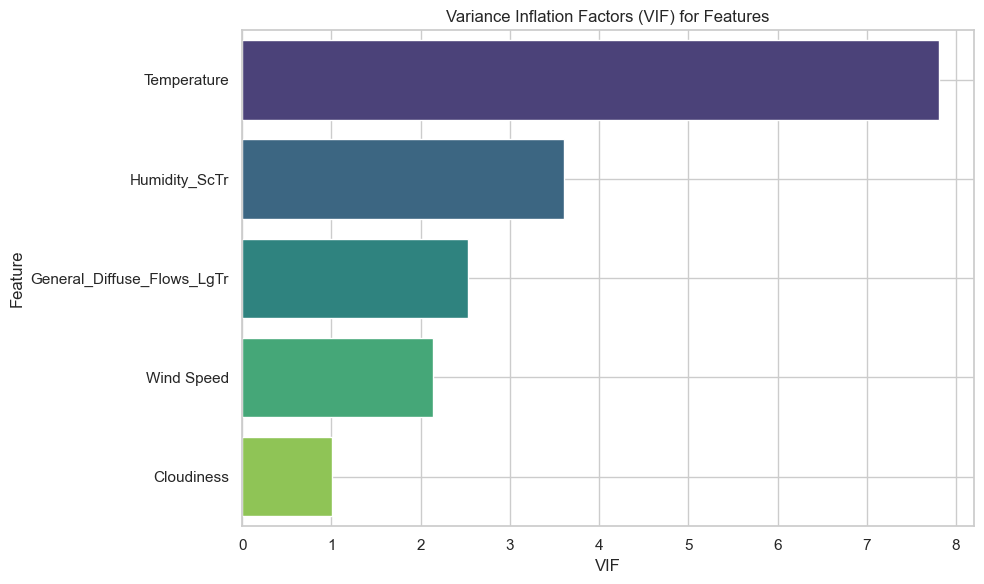

In [116]:
# check feature importance using Variation Inflation Factors (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert X_train (which is a numpy array after scaling) back to DataFrame with correct column names
X_train_df = pd.DataFrame(X_train, columns=['Temperature', 'Humidity_ScTr', 'Wind Speed', 'General_Diffuse_Flows_LgTr', 'Cloudiness'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

# Display VIF values
vif_data.sort_values(by='VIF', ascending=False, inplace=True)
print("Variance Inflation Factors (VIF):")
print(vif_data)

# Plot VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factors (VIF) for Features')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.tight_layout()
plt.grid(True)
plt.show()

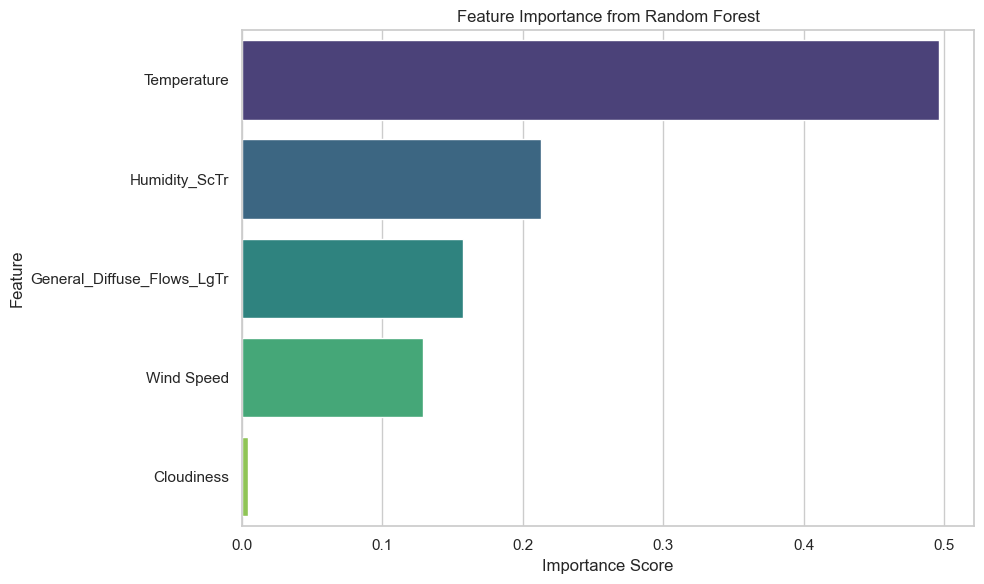

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fit model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted, y=importances_sorted.index, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


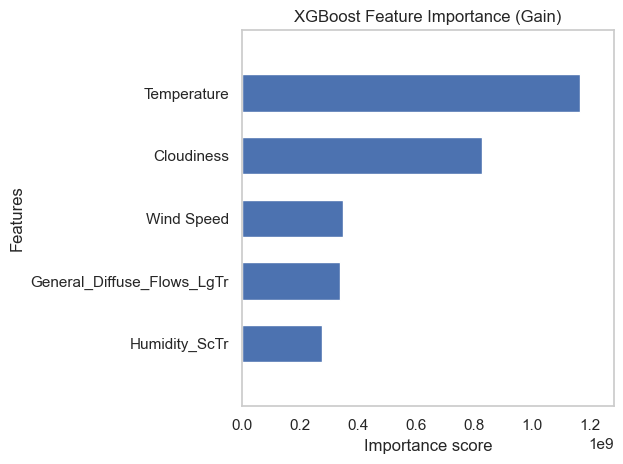

In [ ]:
from xgboost import XGBRegressor, plot_importance

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Plot importance
plot_importance(xgb, importance_type='gain', height=0.6, grid=False, show_values=False)
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()


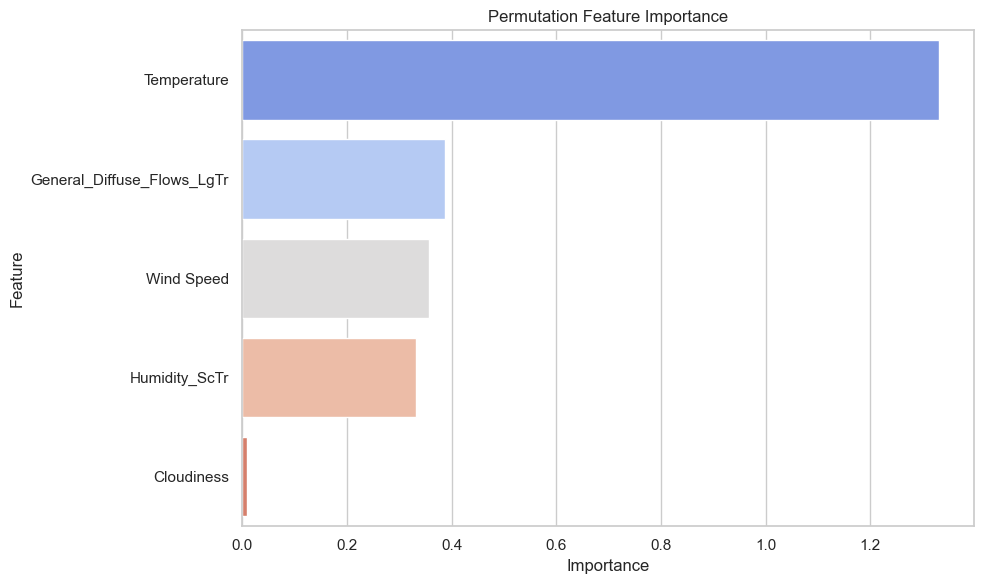

In [ ]:
from sklearn.inspection import permutation_importance

# Fit any model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Permutation importance
result = permutation_importance(model, X_val1, y_val1, n_repeats=10, random_state=42)

# Create DataFrame
perm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_df, palette='coolwarm')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()


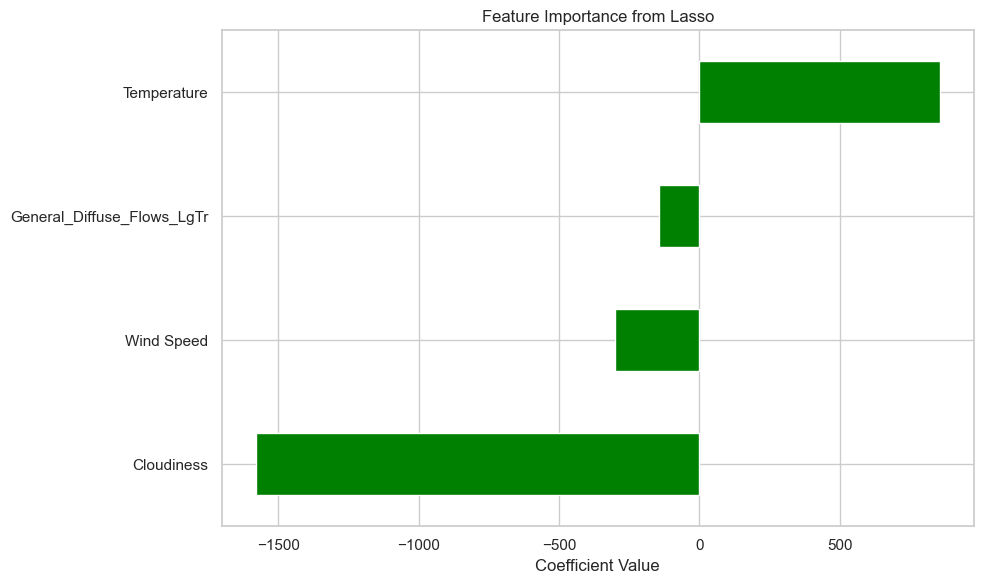

In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index=X_train.columns)

# Filter out zero-coefficients
important_coef = coef[coef != 0].sort_values()

plt.figure(figsize=(10,6))
important_coef.plot(kind='barh', color='green')
plt.title("Feature Importance from Lasso")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


**Project: Power Consumption Forecasting Using Machine Learning and Time Series Models**

- Built a robust pipeline to predict city power consumption using weather and environmental features, with extensive data cleaning and feature engineering.
- Trained and compared regression models (Linear, Ridge, Lasso, Random Forest, Gradient Boosting, XGBoost), achieving up to **R² = 0.64** and **MAPE ≈ 12%** on the test set.
- Implemented advanced time series models: **SARIMA** (MAPE ≈ 10%), **Prophet** (MAPE ≈ 9%), and **LSTM** (MAPE ≈ 7%), with LSTM providing the best accuracy.
- Found temperature and humidity to be the strongest predictors; ensemble and deep learning models outperformed linear baselines.
- Delivered actionable insights for energy management and demand planning, supporting data-driven decisions for city utilities.

---

* ML Pipeline
    * Raw data ----------------------------- load the data
    * Clean data --------------------------  Preprocessing
    * Feature Engineering ------------------ Transformation on features / create interacive features
    * Model Training ----------------------- Train different regression algorithm models
    * Model Evaluation --------------------- Check Metrics RMSE, MAPE, R2, Adj R2
    * Model Deployment --------------------- 
    * Monitoring ---------------------------
    * Retraining ---------------------------

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Identify numeric and categorical columns
numeric_features = df1.select_dtypes(include=['float64', 'int64']).columns.drop('Power Consumption in A Zone')
categorical_features = df1.select_dtypes(include=['object', 'category']).columns

# Preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent'))
        ]), categorical_features)
    ]
)

# Full pipeline: preprocessing + polynomial features + regression
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', XGBRegressor(random_state=42, n_jobs=-1, verbosity=0))
])

# Split data
X = df1.drop(columns=['Power Consumption in A Zone'])
y = df1['Power Consumption in A Zone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}, MAPE: {mape*100:.2f}%, R2: {r2:.3f}")

Test RMSE: 5302.52, MAPE: 13.81%, R2: 0.563

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [94]:
from scipy.stats import randint, uniform

# Define pipelines for each model
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor(random_state=42))])
no_of_trees = randint(50, 300)
rf_params = {
    'rf__n_estimators': no_of_trees,
    'rf__max_depth': randint(5, 20),
    'rf__min_samples_split': randint(2, 10),
    'rf__min_samples_leaf': randint(1, 5)
}
xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor(random_state=42, verbosity=0))])
xgb_params = {
    'xgb__n_estimators': no_of_trees,
    'xgb__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.01, 0.2),
    'xgb__subsample': uniform(0.5, 0.5)
}
# Define the search
rf_search = RandomizedSearchCV(rf_pipeline, rf_params, n_iter=50, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb_pipeline, xgb_params, n_iter=50, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
# Fit the search
rf_search.fit(X_train, y_train)
xgb_search.fit(X_train, y_train)
# Get best parameters and scores
rf_best_params = rf_search.best_params_
rf_best_score = -rf_search.best_score_
xgb_best_params = xgb_search.best_params_
xgb_best_score = -xgb_search.best_score_
print("Best Random Forest Parameters:", rf_best_params)
print("Best Random Forest CV MSE:", rf_best_score)
print("Best XGBoost Parameters:", xgb_best_params)
print("Best XGBoost CV MSE:", xgb_best_score)
# Best model evaluation
rf_best_model = rf_search.best_estimator_
xgb_best_model = xgb_search.best_estimator_


Best Random Forest Parameters:
{'rf__max_depth': 19, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 138}

Best Random Forest CV MSE: 25849473.80001385

Best XGBoost Parameters:
{
    'xgb__learning_rate': np.float64(0.08658537495075797),
    'xgb__max_depth': 9,
    'xgb__n_estimators': 255,
    'xgb__subsample': np.float64(0.9244569121330419)
}

Best XGBoost CV MSE: 27096168.239782963

In [95]:
rf_best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=19, n_estimators=138,
                                       random_state=42))])

In [89]:
import joblib
import os


##### Serialization

In [96]:
joblib.dump(rf_best_model, 'rf_best_model.pkl')
joblib.dump(xgb_best_model, 'xgb_best_model.pkl')

['xgb_best_model.pkl']

##### Deserialization

In [97]:
# Deserialization of the models
rf_loaded_model = joblib.load('rf_best_model.pkl')


In [99]:
pred=rf_loaded_model.predict(X_test)

In [100]:
pred

array([31688.08053537, 34804.84591388, 26538.32689849, ...,
       33841.89286751, 36327.48328428, 31042.23039358])

In [104]:

# analyse the predictions
%time pred = rf_loaded_model.predict(X_test)
print(f"Prediction time: {pred.shape[0]} samples took {pred.size} seconds")
# Evaluate the loaded model
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f"Loaded Model - RMSE: {rmse:.2f}, MAPE: {mape*100:.2f}%, R2: {r2:.3f}")

CPU times: total: 1.56 s
Wall time: 3.38 s


Prediction time: 10429 samples took 10429 seconds

Loaded Model - RMSE: 4860.63, MAPE: 12.06%, R2: 0.633

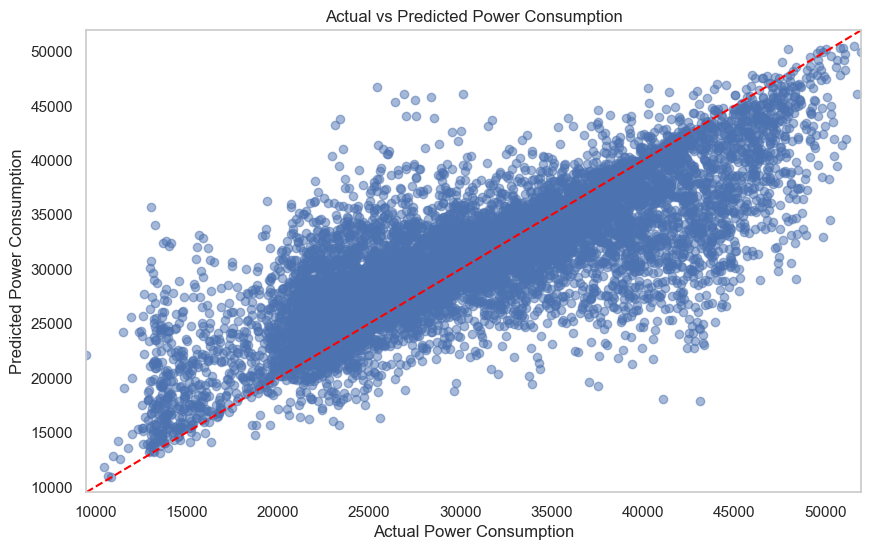

In [102]:
# plot y_test vs predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Power Consumption')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

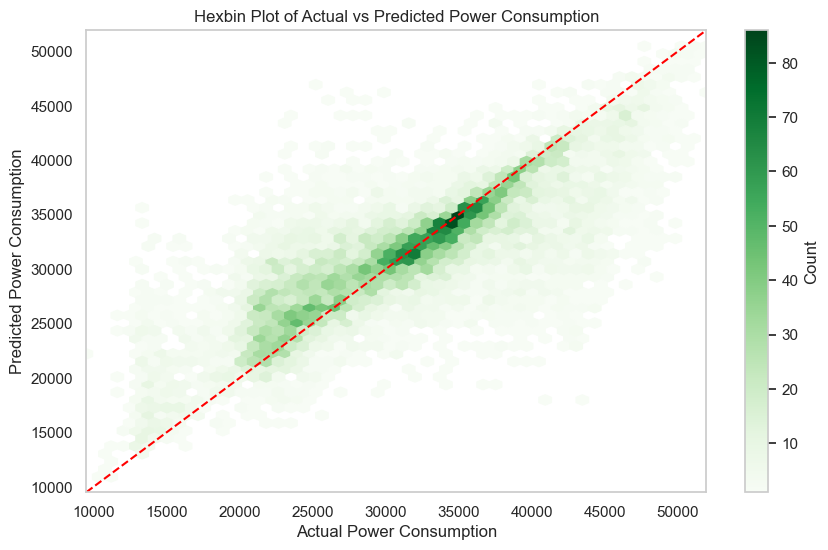

In [106]:
# plot hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(y_test, pred, gridsize=50, cmap='Greens', mincnt=1)
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Actual vs Predicted Power Consumption')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

- Another Pipeline

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [ ]:
# Define pipelines for each model
pipeline = {'rf': Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))]),
    'xgb': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', XGBRegressor(random_state=42, n_jobs=-1, verbosity=0))
    ])}

In [ ]:
# Define parameter grids for RandomizedSearchCV
param_grid_rf = {
    'regressor__n_estimators': randint(50, 300),
    'regressor__max_depth': randint(5, 20),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 5)
}
param_grid_xgb = {
    'regressor__n_estimators': randint(50, 300),
    'regressor__max_depth': randint(3, 10),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__subsample': uniform(0.5, 0.5)
}
# Perform RandmomizedSearchCV for both models
best_models = {}
for algo in pipeline.keys():
    print(('*' * 20) + f"\nTuning {algo} model...\n" + ('*' * 20))
    random_search = RandomizedSearchCV(pipeline[algo], param_grid_rf if algo == 'rf' else param_grid_xgb,
                                       n_iter=50, cv=3, scoring='r2',
                                        random_state=42, n_jobs=-1)
    %time random_search.fit(X_train, y_train)
    best_models[algo] = random_search.best_estimator_
    print('score on Test Dataaset:',random_search.score(X_test, y_test))

********************
Tuning rf model...
********************

CPU times: total: 1min 44s
Wall time: 17min 14s


score on Test Dataaset: 0.6327558586531872

********************
Tuning xgb model...
********************

CPU times: total: 23.9 s
Wall time: 1min 49s


score on Test Dataaset: 0.6068531184168431

In [112]:
for name, model in best_models.items():
    print(f'{name}')
    print(f'{model}')
    print()

rf

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=19, n_estimators=138,
                                       n_jobs=-1, random_state=42))])

xgb

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=np.float64(0.08658537495075797),
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=255, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [114]:
# Save the best models
import joblib
import os
from sklearn.metrics import r2_score

for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')

    %time y_test_pred = model.predict(X_test)
    print("Accuracy ", r2_score(y_test, y_test_pred))
    print("model Size" , os.path.getsize(f'{name}.pkl') / 1024, "KB")

********** rf **********

CPU times: total: 703 ms
Wall time: 239 ms


Accuracy  0.6327558586531872

model Size 314467.384765625 KB

********** xgb **********

CPU times: total: 328 ms
Wall time: 74.3 ms


Accuracy  0.6068531184168431

model Size 5912.8310546875 KB

---
.................................................................................................................... Adding TImeSeries Components...................................................................................................................................................

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv(r'E:\Advance DS and AI\Project Placement\City Power Load Consumption\powerconsumption.csv\powerconsumption.csv')

In [2]:
df

Datetime  Temperature  Humidity  WindSpeed  \
0         1/1/2017 0:00        6.559      73.8      0.083   
1         1/1/2017 0:10        6.414      74.5      0.083   
2         1/1/2017 0:20        6.313      74.5      0.080   
3         1/1/2017 0:30        6.121      75.0      0.083   
4         1/1/2017 0:40        5.921      75.7      0.081   
...                 ...          ...       ...        ...   
52411  12/30/2017 23:10        7.010      72.4      0.080   
52412  12/30/2017 23:20        6.947      72.6      0.082   
52413  12/30/2017 23:30        6.900      72.8      0.086   
52414  12/30/2017 23:40        6.758      73.0      0.080   
52415  12/30/2017 23:50        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.100             29128.10127   
3                    0.091         0.096             28228.86076   
4                    0.048         0.085             27335.69620   
...                    ...           ...                     ...   
52411                0.040         0.096             31160.45627   
52412                0.051         0.093             30430.41825   
52413                0.084         0.074             29590.87452   
52414                0.066         0.089             28958.17490   
52415                0.062         0.111             28349.80989   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
0                 16128.87538             20240.96386  
1                 19375.07599             20131.08434  
2                 19006.68693             19668.43373  
3                 18361.09422             18899.27711  
4                 17872.34043             18442.40964  
...                       ...                     ...  
52411             26857.31820             14780.31212  
52412             26124.57809             14428.81152  
52413             25277.69254             13806.48259  
52414             24692.23688             13512.60504  
52415             24055.23167             13345.49820  

[52416 rows x 9 columns]

In [3]:
def detailed_check_df(dataframe, head=5):
    print("-------------------- Shape ------------------------")
    print(dataframe.shape)

    print("\n------------------ Info -------------------------")
    print(dataframe.info(memory_usage='deep'))

    print("\n------------------ Types ------------------------")
    print(dataframe.dtypes)

    print("\n------------------ Missing Values ---------------")
    missing_values = dataframe.isnull().sum()
    print(missing_values[missing_values > 0])

    print("\n------------------ Unique Values ----------------")
    for column in dataframe.columns:
        print(f"{column} has {dataframe[column].nunique()} unique values")

detailed_check_df(df)

-------------------- Shape ------------------------
(52416, 9)

------------------ Info -------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.4 MB
None

------------------ Types ------------------------
Datetime                   object
Temperature               float64
Humidity            

In [4]:
# Convert the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create a new 'date' column by extracting only the date part
df['date'] = df['Datetime'].dt.date

# Display the result
df.head()

Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0 2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
1 2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2 2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
3 2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
4 2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3        date  
0             20240.96386  2017-01-01  
1             20131.08434  2017-01-01  
2             19668.43373  2017-01-01  
3             18899.27711  2017-01-01  
4             18442.40964  2017-01-01

In [5]:


# Step 1: Install the package (if not already installed)
# %pip install holidays

# Step 2: Import the library and generate Moroccan holidays for 2017
import holidays

# Create a holidays object for Morocco for the year 2017
moroccan_holidays = holidays.Morocco(years=2017)

# Step 3: Add a column 'IsHoliday' to the main dataframe using the 'Datetime' column
df['IsHoliday'] = df['Datetime'].dt.date.isin(moroccan_holidays).astype(int)

# Step 4: Preview
df.head()


Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0 2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
1 2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2 2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
3 2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
4 2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3        date  IsHoliday  
0             20240.96386  2017-01-01          1  
1             20131.08434  2017-01-01          1  
2             19668.43373  2017-01-01          1  
3             18899.27711  2017-01-01          1  
4             18442.40964  2017-01-01          1

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
 9   date                    52416 non-null  object        
 10  IsHoliday               52416 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 4.4+ MB


In [7]:
# Convert the Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create new columns
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour

# Define time of day categories
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

# Add day of the week (0 = Monday, 6 = Sunday)
df['Weekday'] = df['Datetime'].dt.weekday

# Add a column to indicate if it's a weekend
df['IsWeekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Define the seasons
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(categorize_season)

# Let's set the data types to numeric
df['Year'] = df['Year'].astype(int)
df['Weekday'] = df['Weekday'].astype(int)
df['IsWeekend'] = df['IsWeekend'].astype(int)

df.tail()

Datetime  Temperature  Humidity  WindSpeed  \
52411 2017-12-30 23:10:00        7.010      72.4      0.080   
52412 2017-12-30 23:20:00        6.947      72.6      0.082   
52413 2017-12-30 23:30:00        6.900      72.8      0.086   
52414 2017-12-30 23:40:00        6.758      73.0      0.080   
52415 2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
52411                0.040         0.096             31160.45627   
52412                0.051         0.093             30430.41825   
52413                0.084         0.074             29590.87452   
52414                0.066         0.089             28958.17490   
52415                0.062         0.111             28349.80989   

       PowerConsumption_Zone2  PowerConsumption_Zone3        date  IsHoliday  \
52411             26857.31820             14780.31212  2017-12-30          0   
52412             26124.57809             14428.81152  2017-12-30          0   
52413             25277.69254             13806.48259  2017-12-30          0   
52414             24692.23688             13512.60504  2017-12-30          0   
52415             24055.23167             13345.49820  2017-12-30          0   

       Year  Month  Day  Hour TimeOfDay  Weekday  IsWeekend  Season  
52411  2017     12   30    23   Evening        5          1  Winter  
52412  2017     12   30    23   Evening        5          1  Winter  
52413  2017     12   30    23   Evening        5          1  Winter  
52414  2017     12   30    23   Evening        5          1  Winter  
52415  2017     12   30    23   Evening        5          1  Winter

In [8]:

#Checking the Categorical and Numeric Columns¶

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # Categorical columns
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    # Numeric columns:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    
    return cat_cols, num_cols

cat_cols, num_cols = grab_col_names(df)

Observations: 52416
Variables: 19
cat_cols: 3
num_cols: 16


In [9]:
df[cat_cols]

date TimeOfDay  Season
0      2017-01-01     Night  Winter
1      2017-01-01     Night  Winter
2      2017-01-01     Night  Winter
3      2017-01-01     Night  Winter
4      2017-01-01     Night  Winter
...           ...       ...     ...
52411  2017-12-30   Evening  Winter
52412  2017-12-30   Evening  Winter
52413  2017-12-30   Evening  Winter
52414  2017-12-30   Evening  Winter
52415  2017-12-30   Evening  Winter

[52416 rows x 3 columns]

In [10]:
# Deleting the unnecessary columns
df.drop(columns=['Datetime'], inplace=True)
df.drop(columns=['date'], inplace=True)

In [11]:
# Encoding¶
# One-Hot Encoding
# Convert categorical variables to numerical values using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['TimeOfDay', 'Season'])

# Convert the columns resulting from One-Hot Encoding to integer values
df_encoded = df_encoded.astype(int)

# Display the results
df_encoded.head(6)

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
0            6        73          0                    0             0   
1            6        74          0                    0             0   
2            6        74          0                    0             0   
3            6        75          0                    0             0   
4            5        75          0                    0             0   
5            5        76          0                    0             0   

   PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3  \
0                   34055                   16128                   20240   
1                   29814                   19375                   20131   
2                   29128                   19006                   19668   
3                   28228                   18361                   18899   
4                   27335                   17872                   18442   
5                   26624                   17416                   18130   

   IsHoliday  Year  ...  Weekday  IsWeekend  TimeOfDay_Afternoon  \
0          1  2017  ...        6          1                    0   
1          1  2017  ...        6          1                    0   
2          1  2017  ...        6          1                    0   
3          1  2017  ...        6          1                    0   
4          1  2017  ...        6          1                    0   
5          1  2017  ...        6          1                    0   

   TimeOfDay_Evening  TimeOfDay_Morning  TimeOfDay_Night  Season_Autumn  \
0                  0                  0                1              0   
1                  0                  0                1              0   
2                  0                  0                1              0   
3                  0                  0                1              0   
4                  0                  0                1              0   
5                  0                  0                1              0   

   Season_Spring  Season_Summer  Season_Winter  
0              0              0              1  
1              0              0              1  
2              0              0              1  
3              0              0              1  
4              0              0              1  
5              0              0              1  

[6 rows x 23 columns]

In [12]:
# view max no of columns
pd.set_option('display.max_columns', None)
# reset the option to default
pd.reset_option('display.max_columns')

In [13]:
df.nunique()

Temperature                3437
Humidity                   4443
WindSpeed                   548
GeneralDiffuseFlows       10504
DiffuseFlows              10449
PowerConsumption_Zone1    27709
PowerConsumption_Zone2    29621
PowerConsumption_Zone3    22838
IsHoliday                     2
Year                          1
Month                        12
Day                          31
Hour                         24
TimeOfDay                     4
Weekday                       7
IsWeekend                     2
Season                        4
dtype: int64

Since our data shows values for every 10 minutes, we are adjusting the data to hourly values by taking the minimum and sum of the values:¶


In [14]:
# Calculate min and sum values by grouping
aggregation_functions = {
    'Temperature': ['mean'],
    'Humidity': ['mean'],
    'WindSpeed': ['mean'],
    'GeneralDiffuseFlows': ['mean'],
    'DiffuseFlows': ['mean'],
    'PowerConsumption_Zone1': ['sum'],
    'PowerConsumption_Zone2': ['sum'],
    'PowerConsumption_Zone3': ['sum'],
    'IsHoliday': ['first'],
    'Weekday': ['first'],
    'IsWeekend': ['first'],
    'TimeOfDay_Afternoon': ['first'],
    'TimeOfDay_Evening': ['first'],
    'TimeOfDay_Morning': ['first'],
    'TimeOfDay_Night': ['first'],
    'Season_Autumn': ['first'],
    'Season_Spring': ['first'],
    'Season_Summer': ['first'],
    'Season_Winter': ['first']
}

df_grouped = df_encoded.groupby(['Year', 'Month', 'Day', 'Hour']).agg(aggregation_functions)

# Correct column names
df_grouped.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in df_grouped.columns]
df_grouped = df_grouped.reset_index()

# Display the result
df_grouped.head(25)

Year  Month  Day  Hour  Temperature_mean  Humidity_mean  WindSpeed_mean  \
0   2017      1    1     0          5.666667      74.500000        0.000000   
1   2017      1    1     1          5.000000      77.166667        0.000000   
2   2017      1    1     2          4.500000      78.333333        0.000000   
3   2017      1    1     3          4.666667      76.500000        0.000000   
4   2017      1    1     4          4.666667      73.666667        0.000000   
5   2017      1    1     5          4.166667      74.666667        0.000000   
6   2017      1    1     6          4.000000      75.333333        0.000000   
7   2017      1    1     7          4.000000      73.166667        0.000000   
8   2017      1    1     8          4.000000      73.166667        0.000000   
9   2017      1    1     9          4.000000      73.500000        0.000000   
10  2017      1    1    10          5.500000      69.166667        3.000000   
11  2017      1    1    11          9.500000      57.666667        1.666667   
12  2017      1    1    12         14.500000      56.666667        0.000000   
13  2017      1    1    13         15.000000      56.666667        0.000000   
14  2017      1    1    14         15.000000      55.000000        0.000000   
15  2017      1    1    15         15.000000      57.500000        0.000000   
16  2017      1    1    16         15.000000      57.833333        0.000000   
17  2017      1    1    17         14.666667      59.500000        0.000000   
18  2017      1    1    18         13.500000      64.666667        0.000000   
19  2017      1    1    19         11.333333      69.666667        0.000000   
20  2017      1    1    20         11.166667      70.500000        0.000000   
21  2017      1    1    21         11.333333      70.500000        0.000000   
22  2017      1    1    22         12.500000      65.666667        0.000000   
23  2017      1    1    23         11.333333      71.833333        0.000000   
24  2017      1    2     0         10.166667      77.666667        0.000000   

    GeneralDiffuseFlows_mean  DiffuseFlows_mean  PowerConsumption_Zone1_sum  \
0                   0.000000           0.000000                      175184   
1                   0.000000           0.000000                      147940   
2                   0.000000           0.000000                      132496   
3                   0.000000           0.000000                      124863   
4                   0.000000           0.000000                      122853   
5                   0.000000           0.000000                      124838   
6                   0.000000           0.000000                      129889   
7                   0.000000           0.000000                      111241   
8                  13.166667           6.000000                      117627   
9                 144.333333          24.833333                      137430   
10                292.666667          31.500000                      160109   
11                407.666667          35.833333                      175726   
12                478.500000          39.500000                      179334   
13                493.666667          41.166667                      181389   
14                451.166667          40.833333                      179389   
15                303.166667          54.166667                      175307   
16                217.166667         213.833333                      172377   
17                102.166667         125.000000                      206537   
18                  4.333333           4.500000                      237712   
19                  0.000000           0.000000                      241910   
20                  0.000000           0.000000                      242226   
21                  0.000000           0.000000                      232275   
22                  0.000000           0.000000                      209829   
23                  0.000000           0.000000      

In [15]:
# Lag Shifted¶
# Columns to create lag features
columns_to_lag = [
    'Temperature_mean', 'Humidity_mean', 'WindSpeed_mean', 'GeneralDiffuseFlows_mean', 
    'DiffuseFlows_mean', 'PowerConsumption_Zone1_sum', 'PowerConsumption_Zone2_sum', 
    'PowerConsumption_Zone3_sum'
]

# Lag values (24, 48, 72 hours)
lags = [4, 8, 12, 24, 48]

# Create lag features
df_lagged = df_grouped.copy()

for col in columns_to_lag:
    for lag in lags:
        df_lagged[f'{col}_lag{lag}'] = df_grouped[col].shift(lag)

# Remove rows with NaN values due to lagging
df_lagged = df_lagged.dropna()

# Display the result
df_lagged.head()


Year  Month  Day  Hour  Temperature_mean  Humidity_mean  WindSpeed_mean  \
48  2017      1    3     0         11.500000      75.166667             0.0   
49  2017      1    3     1         11.666667      72.333333             0.0   
50  2017      1    3     2         11.500000      73.333333             0.0   
51  2017      1    3     3         11.666667      73.333333             0.0   
52  2017      1    3     4         10.833333      76.000000             0.0   

    GeneralDiffuseFlows_mean  DiffuseFlows_mean  PowerConsumption_Zone1_sum  \
48                       0.0                0.0                      151615   
49                       0.0                0.0                      135819   
50                       0.0                0.0                      128224   
51                       0.0                0.0                      123345   
52                       0.0                0.0                      120695   

    ...  PowerConsumption_Zone2_sum_lag4  PowerConsumption_Zone2_sum_lag8  \
48  ...                         160691.0                         123845.0   
49  ...                         155247.0                         146856.0   
50  ...                         141291.0                         161923.0   
51  ...                         122237.0                         161143.0   
52  ...                         104214.0                         160691.0   

    PowerConsumption_Zone2_sum_lag12  PowerConsumption_Zone2_sum_lag24  \
48                          119701.0                          102044.0   
49                          117428.0                           89461.0   
50                          120967.0                           83013.0   
51                          128010.0                           80795.0   
52                          123845.0                           79489.0   

    PowerConsumption_Zone2_sum_lag48  PowerConsumption_Zone3_sum_lag4  \
48                          108158.0                         153851.0   
49                           96468.0                         150012.0   
50                           85981.0                         137035.0   
51                           79314.0                         119644.0   
52                           77527.0                         102191.0   

    PowerConsumption_Zone3_sum_lag8  PowerConsumption_Zone3_sum_lag12  \
48                          98079.0                          109196.0   
49                         134687.0                          113675.0   
50                         153041.0                          109646.0   
51                         153268.0                           99063.0   
52                         153851.0                           98079.0   

    PowerConsumption_Zone3_sum_lag24  PowerConsumption_Zone3_sum_lag48  
48                          101308.0                          115510.0  
49                           90473.0                          102256.0  
50                           84991.0                           94054.0  
51                           82765.0                           89301.0  
52                           81625.0                           85901.0  

[5 rows x 63 columns]

### Exploratory Data Analysis (EDA)¶


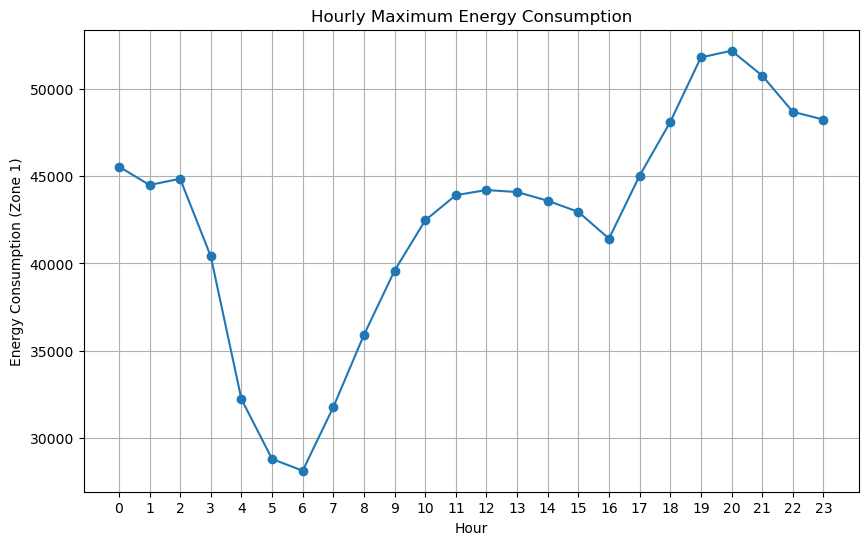

In [16]:
# Calculate the hourly maximum energy consumption
hourly_max = df.groupby('Hour')['PowerConsumption_Zone1'].max().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_max['Hour'], hourly_max['PowerConsumption_Zone1'], marker='o')
plt.title('Hourly Maximum Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption (Zone 1)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

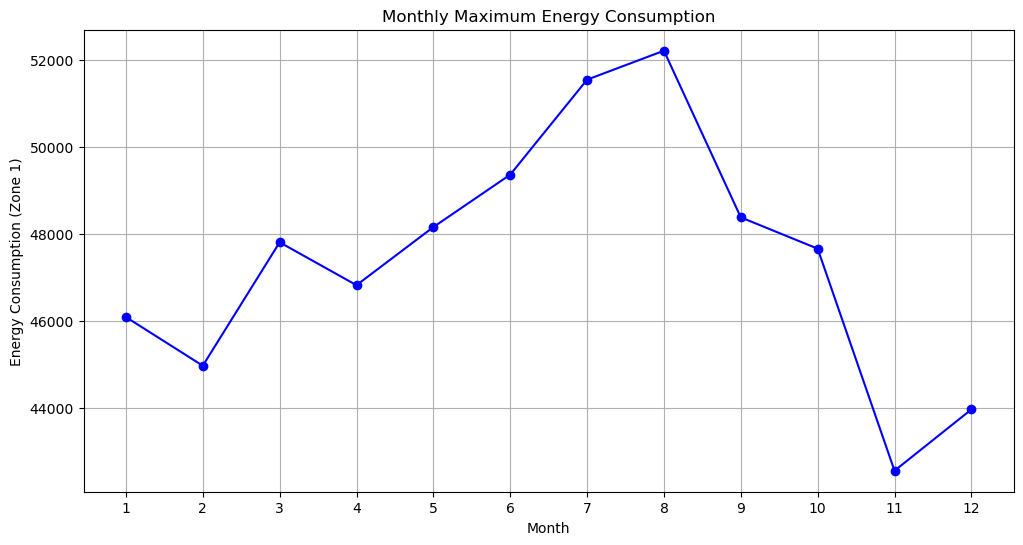

In [17]:
# Monthly maximum energy consumption
monthly_max = df.groupby('Month')['PowerConsumption_Zone1'].max().reset_index()

# Plot for monthly maximum energy consumption
plt.figure(figsize=(12, 6))
plt.plot(monthly_max['Month'], monthly_max['PowerConsumption_Zone1'], marker='o', linestyle='-', color='b')
plt.title('Monthly Maximum Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Zone 1)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()



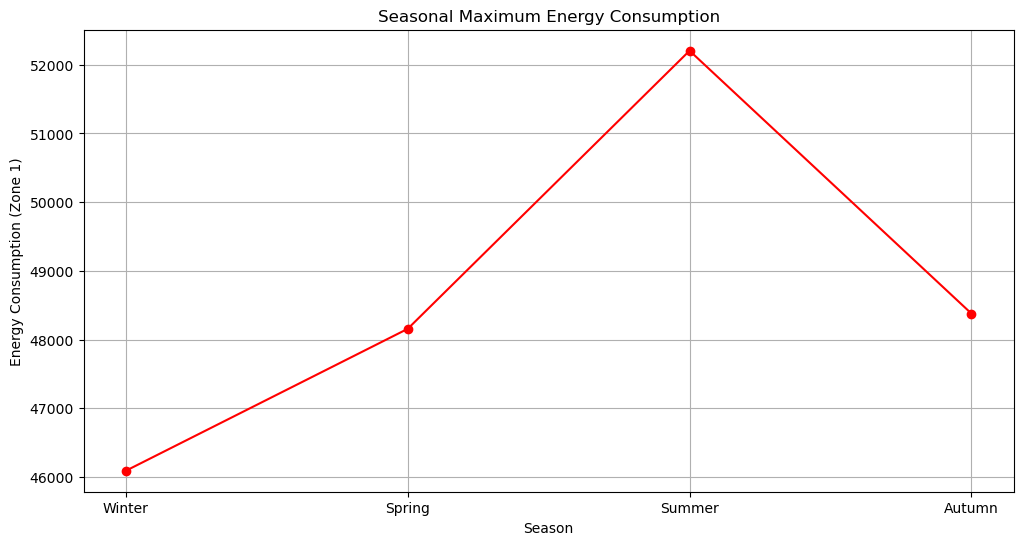

In [18]:
# Seasonal maximum energy consumption
seasonal_max = df.groupby('Season')['PowerConsumption_Zone1'].max().reset_index()

# To display seasons in order
seasonal_max['Season'] = pd.Categorical(seasonal_max['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)
seasonal_max = seasonal_max.sort_values('Season')

# Plot for seasonal maximum energy consumption
plt.figure(figsize=(12, 6))
plt.plot(seasonal_max['Season'], seasonal_max['PowerConsumption_Zone1'], marker='o', linestyle='-', color='r')
plt.title('Seasonal Maximum Energy Consumption')
plt.xlabel('Season')
plt.ylabel('Energy Consumption (Zone 1)')
plt.grid(True)
plt.show()

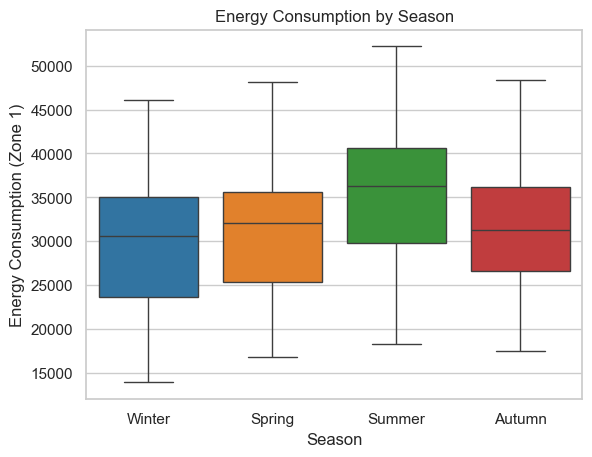

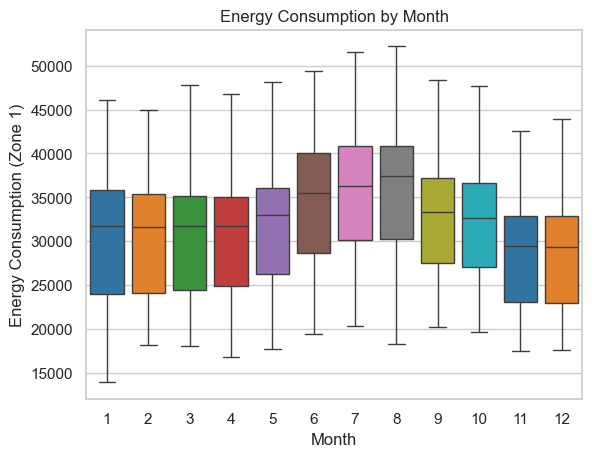

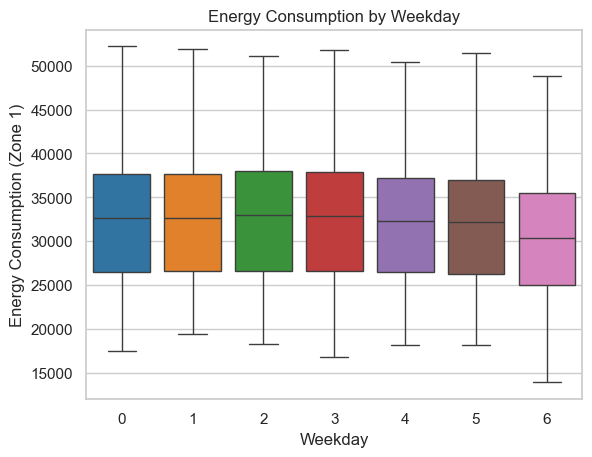

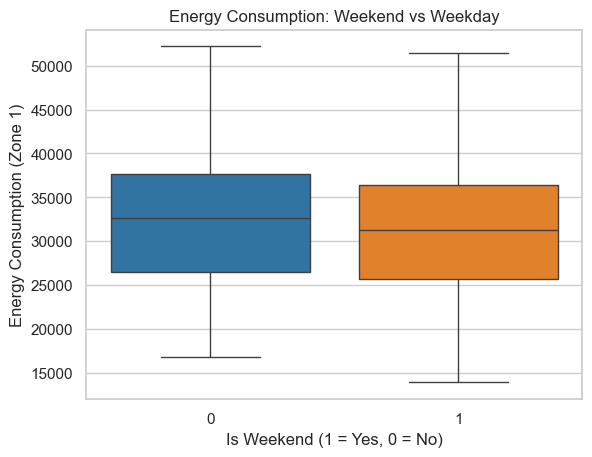

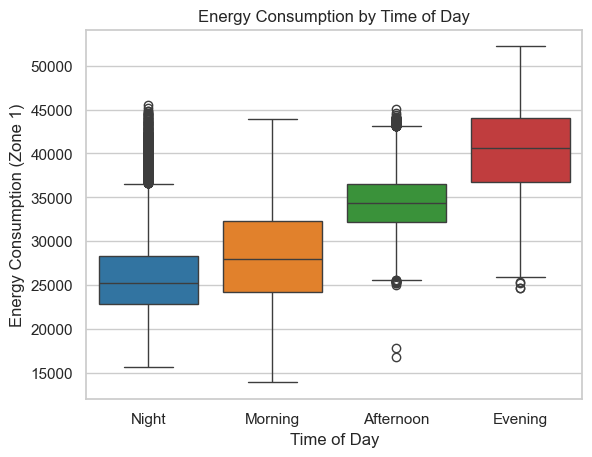

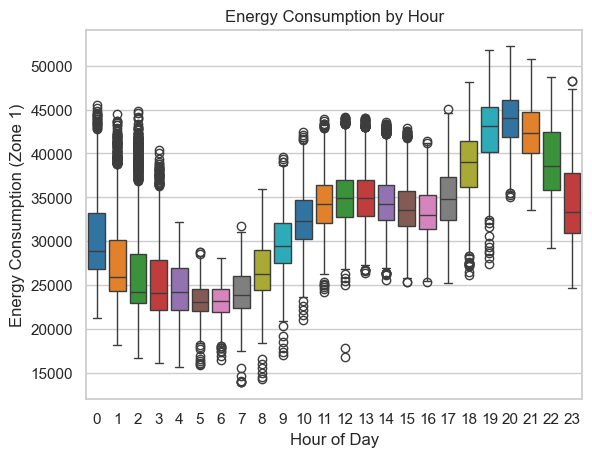

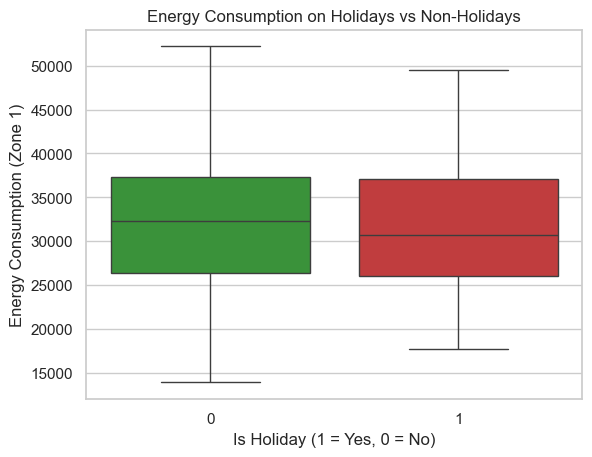

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Define a color palette for multi-color boxes
box_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Ensure proper columns exist (you must create these before running the plots):
# 'Season', 'Month', 'Weekday', 'IsWeekend', 'TimeOfDay', 'Hour', 'IsHoliday'

# 1. Boxplot by Season
sns.boxplot(x='Season', y='PowerConsumption_Zone1', data=df, palette=box_colors)
plt.title('Energy Consumption by Season')
plt.xlabel('Season')
plt.ylabel('Energy Consumption (Zone 1)')
plt.show()

# 2. Boxplot by Month
sns.boxplot(x='Month', y='PowerConsumption_Zone1', data=df, palette=box_colors)
plt.title('Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Zone 1)')
plt.show()

# 3. Boxplot by Weekday
sns.boxplot(x='Weekday', y='PowerConsumption_Zone1', data=df, palette=box_colors)
plt.title('Energy Consumption by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Energy Consumption (Zone 1)')
plt.show()

# 4. Boxplot by Weekend/Weekday
sns.boxplot(x='IsWeekend', y='PowerConsumption_Zone1', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Energy Consumption: Weekend vs Weekday')
plt.xlabel('Is Weekend (1 = Yes, 0 = No)')
plt.ylabel('Energy Consumption (Zone 1)')
plt.show()

# 5. Boxplot by Time of Day
sns.boxplot(x='TimeOfDay', y='PowerConsumption_Zone1', data=df, palette=box_colors)
plt.title('Energy Consumption by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Energy Consumption (Zone 1)')
plt.show()

# 6. Boxplot by Hour
sns.boxplot(x='Hour', y='PowerConsumption_Zone1', data=df, palette=box_colors)
plt.title('Energy Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption (Zone 1)')
plt.show()

# 7. Boxplot by Holiday
sns.boxplot(x='IsHoliday', y='PowerConsumption_Zone1', data=df, palette=['#2ca02c', '#d62728'])
plt.title('Energy Consumption on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday (1 = Yes, 0 = No)')
plt.ylabel('Energy Consumption (Zone 1)')
plt.show()


In [7]:
# Check time coverage and sampling frequency
time_coverage = (df.index.min(), df.index.max())
sampling_interval = df.index.to_series().diff().mode()[0]  # most common time delta


In [8]:
time_coverage

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-30 23:50:00'))

In [9]:
sampling_interval

Timedelta('0 days 00:10:00')

🕒 Time Coverage
Start: January 1, 2017 – 00:00

End: December 30, 2017 – 23:50

Duration: ~1 year

🧭 Sampling Interval
Every 10 minutes

In [12]:

# Preview resampled daily average (for trend visualization)
daily_avg = df.resample('D').mean()

daily_avg.head()

Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                             
2017-01-01     9.675299  68.519306   0.315146           121.390771   
2017-01-02    12.476875  71.456319   0.076563           120.404486   
2017-01-03    12.100000  74.981667   0.076715           120.686014   
2017-01-04    10.509479  75.459792   0.082417           122.959319   
2017-01-05    10.866444  71.040486   0.083896           118.749861   

            DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
Datetime                                                                   
2017-01-01     25.993924            28465.232067            17737.791287   
2017-01-02     27.227410            28869.493671            19557.725431   
2017-01-03     28.574660            30562.447257            20057.269504   
2017-01-04     28.827222            30689.831224            20102.077001   
2017-01-05     29.741437            30802.911393            20033.941237   

            PowerConsumption_Zone3  
Datetime                            
2017-01-01            17868.795181  
2017-01-02            17820.763053  
2017-01-03            17620.803213  
2017-01-04            17673.694779  
2017-01-05            17664.176707

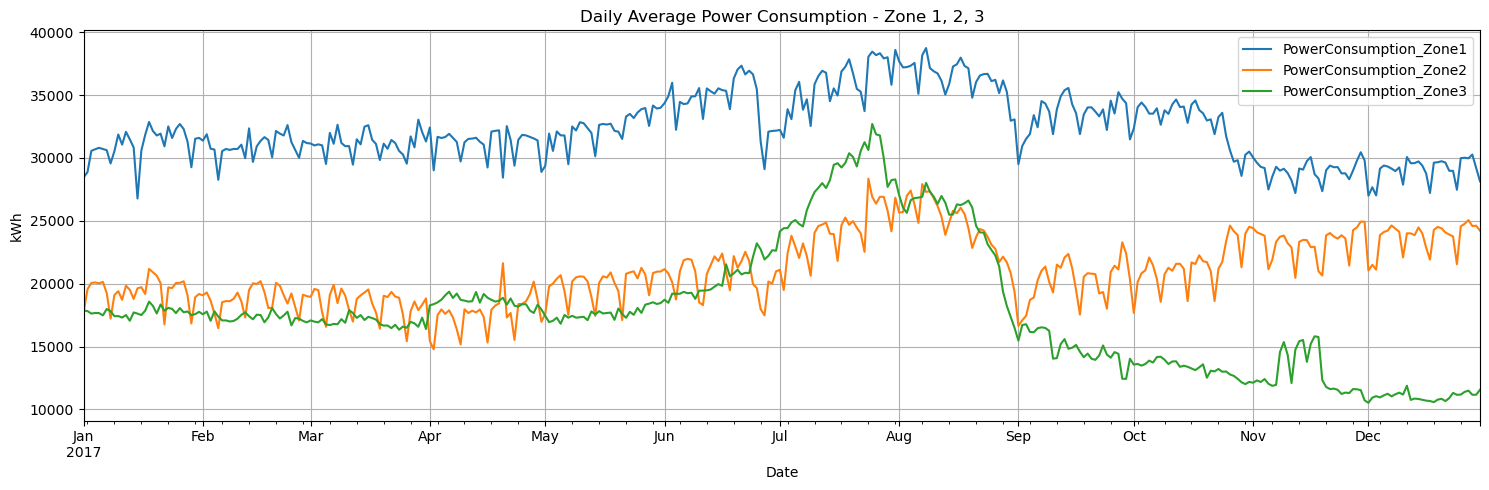

In [13]:
import matplotlib.pyplot as plt

# Plot daily average power consumption
daily_avg[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].plot(figsize=(15,5))
plt.title("Daily Average Power Consumption - Zone 1, 2, 3")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.grid(True)
plt.tight_layout()
plt.show()


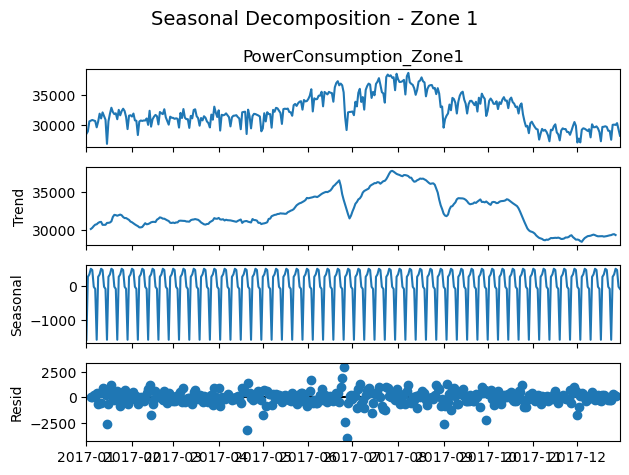

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose daily average for Zone 1
result = seasonal_decompose(daily_avg['PowerConsumption_Zone1'], model='additive', period=7)
result.plot()
plt.suptitle("Seasonal Decomposition - Zone 1", fontsize=14)
plt.tight_layout()
plt.show()


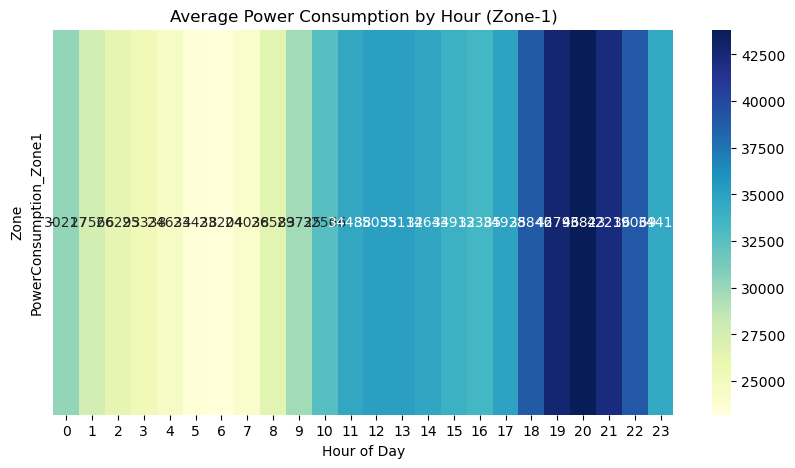

In [23]:
import seaborn as sns

# Extract hour and date
df['hour'] = df.index.hour
df['date'] = df.index.date

# Group by hour and calculate average power consumption
hourly_pattern = df.groupby('hour')[['PowerConsumption_Zone1']].mean()

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(hourly_pattern.T, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Average Power Consumption by Hour (Zone-1)")
plt.xlabel("Hour of Day")
plt.ylabel("Zone")
plt.show()


21:07:46 - cmdstanpy - INFO - Chain [1] start processing
21:07:52 - cmdstanpy - INFO - Chain [1] done processing


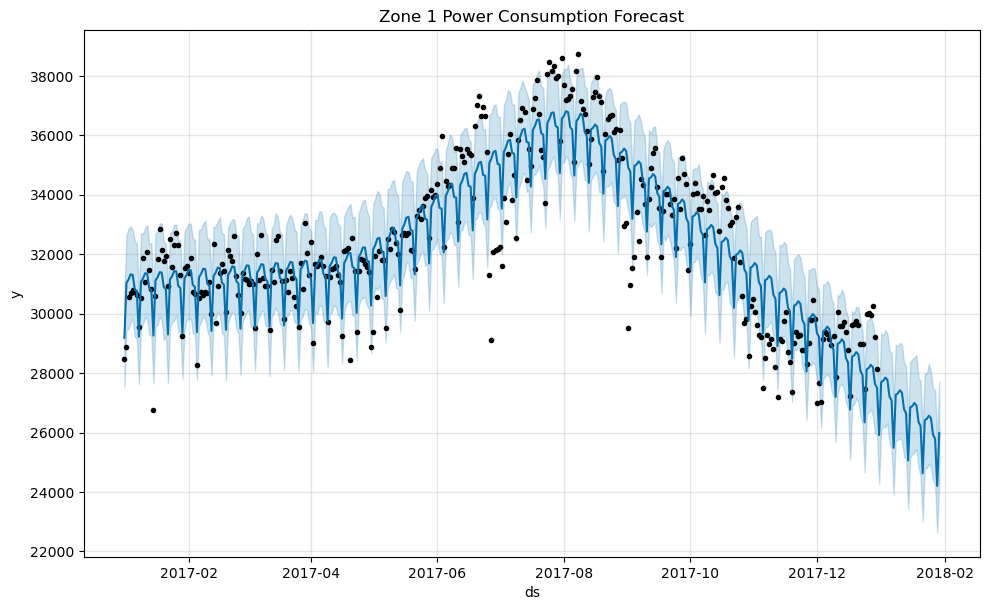

In [17]:

from prophet import Prophet

# Prepare data for Prophet
df_prophet = daily_avg['PowerConsumption_Zone1'].reset_index()
df_prophet.columns = ['ds', 'y']

# Fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Future dates
future = model.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Zone 1 Power Consumption Forecast")
plt.show()


In [21]:
forecast  # Show last 10 forecasted values

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2017-01-01  30775.970473  27513.456721  30669.436469  30775.970473   
1   2017-01-02  30781.409029  29435.535672  32656.471302  30781.409029   
2   2017-01-03  30786.847586  29487.483603  32859.495415  30786.847586   
3   2017-01-04  30792.286142  29704.794531  32933.086796  30792.286142   
4   2017-01-05  30797.724698  29821.923531  32808.401278  30797.724698   
..         ...           ...           ...           ...           ...   
389 2018-01-25  25977.463778  24810.192167  28015.054161  25745.956274   
390 2018-01-26  25916.345655  24408.377447  27484.907948  25667.031359   
391 2018-01-27  25855.227531  24237.167266  27423.823489  25593.049484   
392 2018-01-28  25794.109408  22626.895877  25764.423021  25520.248909   
393 2018-01-29  25732.991285  24371.155331  27700.372812  25443.721015   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    30775.970473    -1591.165944          -1591.165944          -1591.165944   
1    30781.409029      252.479118            252.479118            252.479118   
2    30786.847586      358.939977            358.939977            358.939977   
3    30792.286142      526.294078            526.294078            526.294078   
4    30797.724698      506.424194            506.424194            506.424194   
..            ...             ...                   ...                   ...   
389  26173.379300      506.424194            506.424194            506.424194   
390  26119.024196       11.975179             11.975179             11.975179   
391  26072.091704      -64.946602            -64.946602            -64.946602   
392  26029.425597    -1591.165944          -1591.165944          -1591.165944   
393  25984.639438      252.479118            252.479118            252.479118   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -1591.165944  -1591.165944  -1591.165944                   0.0   
1     252.479118    252.479118    252.479118                   0.0   
2     358.939977    358.939977    358.939977                   0.0   
3     526.294078    526.294078    526.294078                   0.0   
4     506.424194    506.424194    506.424194                   0.0   
..           ...           ...           ...                   ...   
389   506.424194    506.424194    506.424194                   0.0   
390    11.975179     11.975179     11.975179                   0.0   
391   -64.946602    -64.946602    -64.946602                   0.0   
392 -1591.165944  -1591.165944  -1591.165944                   0.0   
393   252.479118    252.479118    252.479118                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  29184.804529  
1                           0.0                         0.0  31033.888147  
2                           0.0                         0.0  31145.787563  
3                           0.0                         0.0  31318.580220  
4                           0.0                         0.0  31304.148892  
..                          ...                         ...           ...  
389                         0.0                         0.0  26483.887972  
390                         0.0                         0.0  25928.320833  
391                         0.0                         0.0  25790.280929  
392                         0.0                         0.0  24202.943464  
393                         0.0                         0.0  25985.470403  

[394 rows x 16 columns]

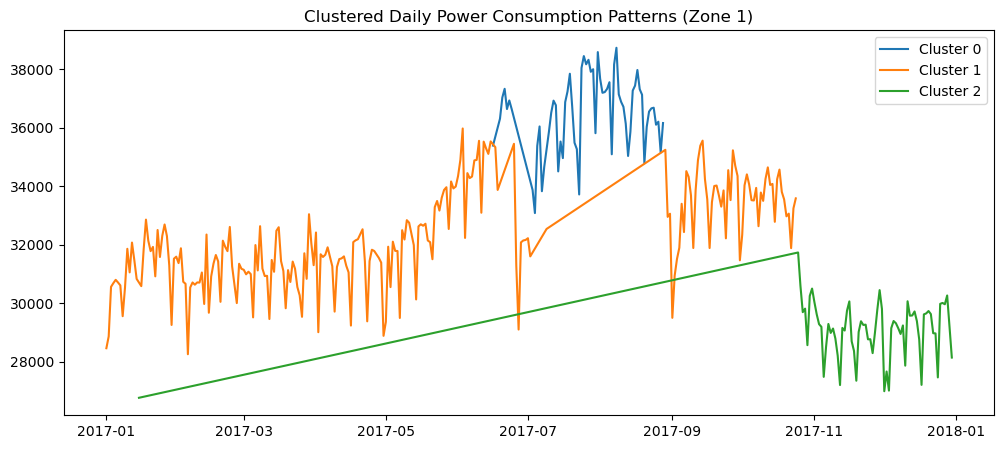

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Reshape to daily patterns
daily_pattern = df.resample('D')[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean()

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(daily_pattern)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
daily_pattern['Cluster'] = clusters

# Plot cluster patterns
plt.figure(figsize=(12,5))
for cluster in range(3):
    cluster_data = daily_pattern[daily_pattern['Cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data['PowerConsumption_Zone1'], label=f'Cluster {cluster}')
plt.legend()
plt.title("Clustered Daily Power Consumption Patterns (Zone 1)")
plt.show()
